<a href="https://colab.research.google.com/github/sosarodrigox/coderhouse_emprendedores_it/blob/main/DataWrangling_EDA_SosaRodrigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ✅ Proyecto Final (Pre-entrega)

### Análisis de Datos de Emprendedores en la Provincia de Entre Ríos (2016-2019).

### CoderHouse: Data Science II Machine Learning para ciencia de datos.

###  Rodrigo Sosa - Cohorte 2024
**LinkedIn: https://www.linkedin.com/in/sosarodrigo/**

![Portada](https://github.com/sosarodrigox/coderhouse_emprendedores_it/blob/main/DataBanner.png?raw=1)

### 📚 Introducción:
El dataset que utilizaré proviene de un archivo de Google Sheets asociado a un Google Form 📊 (Ver archivo). Este formulario fue diseñado para recopilar datos de emprendedores que participaron en la **Línea de Acción "Incorporación de Tecnología"**, un programa gestionado por el Ministerio de Desarrollo Social de Entre Ríos entre marzo de 2016 y agosto de 2019.

### 🚀 Objetivo:
El objetivo principal de este proyecto es **agilizar los tiempos de selección de proyectos mediante un modelo predictivo que pueda preseleccionar automáticamente los proyectos más prometedores**. Esto permitirá a las autoridades concentrarse en los casos con mayor probabilidad de éxito, reduciendo los tiempos de evaluación y mejorando la eficiencia del programa.

Además, este proyecto tiene como propósito identificar patrones y tendencias en la información proporcionada por los emprendedores registrados durante este periodo. A través de este análisis, espero obtener información valiosa que pueda ser utilizada para mejorar la eficacia de los programas de apoyo a los emprendedores en la provincia de Entre Ríos, específicamente mediante la provisión de maquinaria y herramientas bajo el esquema de ANR (Aportes No Reembolsables).

Como Técnico en Gestión y Administración Pública, me interesa profundizar en el análisis de datos para mejorar la toma de decisiones en el ámbito público. Este proyecto representa una oportunidad para aplicar los conocimientos adquiridos en el curso de Data Science II de CoderHouse y contribuir al desarrollo de políticas públicas que fomenten el emprendimiento en la provincia de Entre Ríos. 📈

Por otro lado, considero que uno de los grandes desafíos en la aplicación de políticas públicas radica en la selección subjetiva de beneficiarios, la evaluación de los resultados, la medición del impacto de las políticas implementadas, y la falta de información confiable y actualizada sobre la situación de los emprendedores en la provincia. Por ello, el análisis de datos es una herramienta fundamental para mejorar la eficacia de las políticas públicas y garantizar que los recursos se utilicen de manera eficiente y equitativa.

Por lo tanto, centraré mi análisis en los siguientes puntos:

- Identificar los principales sectores de actividad de los emprendedores en la provincia de Entre Ríos.
- Analizar la distribución geográfica de los emprendedores en la provincia.
- Evaluar la calidad de los datos registrados.
- Identificar los factores que influyen en la aprobación o desaprobación de los emprendedores.
- Determinar cuáles son las variables que más influyen en la aprobación de los emprendedores.
- Identificar las principales métricas para considerar como KPIs en el diseño de futuras políticas públicas.

### 1️⃣ Anonimizar el Dataset:

Dado que la privacidad es una prioridad 🔒, he eliminado todas las columnas que contenían información personal identificable. Consideré que estos datos no son necesarios para los objetivos de mi proyecto y que su inclusión no aportaría valor a los análisis que realizaré. Utilicé las herramientas propias de Google Sheets para eliminar las columnas y obtener el dataset de trabajo.

Las columnas eliminadas son:

* Nombre y apellido del emprendedor
* Teléfono celular y fijo del emprendedor
* Correo electrónico del emprendedor
* Dirección del emprendedor y del emprendimiento (generalmente es la misma)
* Tipo (todos los registros corresponden a DNI) y número de DNI
* Nombre y apellido del referente territorial
* Apellido del integrante del equipo técnico que realizó la entrevista.
* Teléfono del referente territorial

### 2️⃣ Carga de Datos desde GitHub

Creé el repositorio público en GitHub: https://github.com/sosarodrigox/coderhouse_emprendedores_it

Luego obtengo el enlace **RAW** del dataset para importarlo a mi notebook. Para lo mismo utilizo la librería **Pandas**.


In [1]:
# Importar librerías:
import os  # Para manejo de archivos
import pandas as pd  # Para manejo de datos
import missingno as msno  # Para visualización de datos faltantes
import re  # Para manejo de expresiones regulares
from nltk.corpus import stopwords  # Para manejo de stopwords
from nltk.tokenize import word_tokenize  # Para tokenización de palabras
from collections import Counter  # Para contar palabras
from wordcloud import WordCloud  # Para visualización de nubes de palabras
import matplotlib.pyplot as plt  # Para visualización de gráficos
import seaborn as sns  # Para visualización de gráficos
import nltk  # Para procesamiento de lenguaje natural
import plotly.express as px  # Para visualización de gráficos interactivos
import plotly.graph_objects as go  # Para visualización de gráficos interactivos
import plotly.figure_factory as ff  # Para visualización de gráficos interactivos
import numpy as np  # Para manejo de arreglos

# from datetime import datetime

# import nbformat


# Descargar las stopwords y otros recursos necesarios de NLTK
nltk.download("stopwords")
nltk.download("punkt_tab")  # En VSC pide estos recursos
nltk.download("punkt")  # En colab pide estos recursos

# Definir las stopwords en español para futuros análisis
stop_words = set(stopwords.words("spanish"))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/negrux/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/negrux/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /Users/negrux/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Ruta del archivo Excel en GitHub
url = "https://github.com/sosarodrigox/coderhouse_emprendedores_it/raw/main/emprendedores%20_it.xlsx"

df = pd.read_excel(url)

# Configuración para mostrar todas las columnas
pd.set_option("display.max_columns", None)  # Muestra todas las columnas sin cortes
pd.set_option(
    "display.expand_frame_repr", False
)  # Evita el salto de línea entre las columnas

# Mostrar las primeras filas
df.head(2)

Marca temporal                  Marcar entrevista como: Fecha de la entrevista: Fecha de la entrevista-Final: Equipo Técnico: Referencia a Expediente:    Localidad: Departamento: Fecha de Nacimiento-Final:      Sexo: Estado Civil: Nivel de Estudio Actual: Situación Laboral PRINCIPAL: Situación Habitacional: Tipo de vivienda:                                Situación Familiar:     Situación ante el IVA:              Observaciones Respecto al IVA: Tramitó la Exención Impositiva en ATER?:  Ingreso MENSUAL de su Economía Familiar: Nombre del emprendimiento: Facebook del emprendimiento: E-mail (Del Emprendimiento):                    Descripción del Emprendimiento:  Antigüedad del Emprendimiento (Años):  Antigüedad del Emprendimiento (Meses):  Tiempo que dedica al emprendimiento (Días a la semana):  Tiempo que dedica al emprendimiento (Horas por día): Realizó algún tipo de capacitación previa para su emprendimiento: En caso de haber recibido algún tipo de capacitación, marque cuales: Cantidad de personas involucradas en el emprendimiento:                              Qué función cumplen?: Cómo realiza sus ventas? / Cómo ofrece sus servicios?: Utiliza tarjeta de crédito para realizar sus ventas?:                              Cantidad de clientes:  Facturación Mensual (Ingresos Brutos):  Costo Mensual (Egresos):  Ganancia Mensual-Final:           Detallar el nivel de producción semanal:      Donde compra la materia prima?: El emprendimiento se desarrolla en un ámbito: Donde realiza su producción? / Donde ofrece su servicio?: Condiciones del espacio físico donde desarrolla el emprendimiento:              Observaciones del espacio productivo: Qué habilitaciones posee su espacio productivo?:      Servicio Eléctrico: Servicio de Gas: Participó en alguno de los siguientes programas del Min. de Desarrollo Social de E.R.?: En qué invirtió o para qué utilizó el fortalecimiento adquirido?: Posee otras fuentes de financiamiento que haya destinado a su emprendimiento?:                    Equipamiento con el que cuenta: Herramientas o equipamiento que solicita: Aporte que obtendría en su emprendimiento a partir de la incorporación de la/las herramienta/as solicitada/as: Devolución con respecto a la gestión de la herramienta o equipamiento:                                  Evaluación Final: Herramienta/as aprobada/as por Equipo Técnico:  Monto Máximo ($) aprobado por Equipo Técnico: Herramienta comprada Efectivamente:                    Observaciones de la entrevista:               Rubro:         Sub-Rubro:  Sub-Rubro:.1   Sub-Rubro-Final: Actividad: Actividad:.1  Actividad:.2            Actividad:.3 Actividad:.4 Actividad:.5 Actividad:.6 Actividad:.7 Actividad:.8 Actividad:.9 Actividad:.10 Actividad:.11 Actividad:.12 Actividad:.13 Actividad:.14 Actividad:.15        Actividad-Final:
0 2016-03-18 09:27:31  La entrevista se realizó correctamente.     2016-03-17 00:00:00           2016-03-17 00:00:00          Gisela                      NaN  Gualeguaychú  Gualeguaychú        1971-02-09 00:00:00   Femenino      Casada/o      Secundario Completo                 Autoempleado      Vivienda Alquilada            TIPO B  Vive con su esposo quien realiza changas de ja...         Monotributo Social                                         NaN                                       SI                                    6000.0                 Lo Nuestro                   Lo Nuestro                          NaN  Pre pizzas, pasta frolas, cremonas, pan sabori...                                   12.0                                     1.0                                                5.0                                                      4.0                                                    SI                                         Capacitación en el Oficio                                                                    1       Los dos hacen todo, Brenda hace lo de reposter...  Tiene un puesto fijo en una Feria., Coordina l...                              

### 3️⃣ Data Wrangling:

El Data Wrangling, también conocido como data cleaning o preparación de datos, es el proceso de transformar y mapear los datos brutos en un formato más adecuado para el análisis. Este paso es crucial para asegurarse de que los datos sean consistentes, estén limpios y sean utilizables para análisis posteriores.

Tareas comunes de Data Wrangling:

*   Eliminar columnas irrelevantes o redundantes.
*   Cambiar los nombres de las columnas para que sean más descriptivos o consistentes.
*   Manejo de valores faltantes (rellenar, eliminar o imputar).
*   Corrección de tipos de datos (por ejemplo, convertir fechas de texto a formato de fecha).
*   Eliminar duplicados en los datos.
*   Transformar datos (normalización, estandarización, etc.).
*   Fusionar datasets (merge, join)

**Comenzaremos con la comprensión y exploración Inicial de los Datos en el dataset.**


In [3]:
# Información de las columnas del dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1263 entries, 0 to 1262
Data columns (total 80 columns):
 #   Column                                                                                                          Non-Null Count  Dtype         
---  ------                                                                                                          --------------  -----         
 0   Marca temporal                                                                                                  1263 non-null   datetime64[ns]
 1   Marcar entrevista como:                                                                                         1263 non-null   object        
 2   Fecha de la entrevista:                                                                                         1263 non-null   object        
 3   Fecha de la entrevista-Final:                                                                                   1263 non-null   object        
 4   

In [4]:
# Descripción estadística de los valores dentro del dataset:
df.describe(include="all").T

count unique                                      top  freq                           mean                  min                  25%                  50%                         75%                  max  std
Marca temporal                 1263    NaN                                      NaN   NaN  2017-10-24 19:43:54.095803648  2016-03-18 09:27:31  2016-10-18 10:18:36  2017-11-14 13:27:02  2018-09-17 10:58:50.500000  2019-08-29 11:59:11  NaN
Marcar entrevista como:        1263      4  La entrevista se realizó correctamente.  1250                            NaN                  NaN                  NaN                  NaN                         NaN                  NaN  NaN
Fecha de la entrevista:        1263    238                      2016-08-04 00:00:00    37                            NaN                  NaN                  NaN                  NaN                         NaN                  NaN  NaN
Fecha de la entrevista-Final:  1263    239                      2016-08-04 00:00:00    37                            NaN                  NaN                  NaN                  NaN                         NaN                  NaN  NaN
Equipo Técnico:                1263     10                                Alejandra   311                            NaN                  NaN                  NaN                  NaN                         NaN                  NaN  NaN
...                             ...    ...                                      ...   ...                            ...                  ...                  ...                  ...                         ...                  ...  ...
Actividad:.12                   243     12                                Panadería   146                            NaN                  NaN                  NaN                  NaN                         NaN                  NaN  NaN
Actividad:.13                   128     30                                Rotisería    62                            NaN                  NaN                  NaN                  NaN                         NaN                  NaN  NaN
Actividad:.14                   164     35                   Indumentaria de vestir    32                            NaN                  NaN                  NaN                  NaN                         NaN                  NaN  NaN
Actividad:.15                   189     44                              Carpintería    51                            NaN                  NaN                  NaN                  NaN                         NaN                  NaN  NaN
Actividad-Final:               1250    222                                Panadería   142                            NaN                  NaN                  NaN                  NaN                         NaN                  NaN  NaN

[80 rows x 11 columns]

In [5]:
# Forma del conjunto de datos:
df.shape

(1263, 80)

<Axes: >

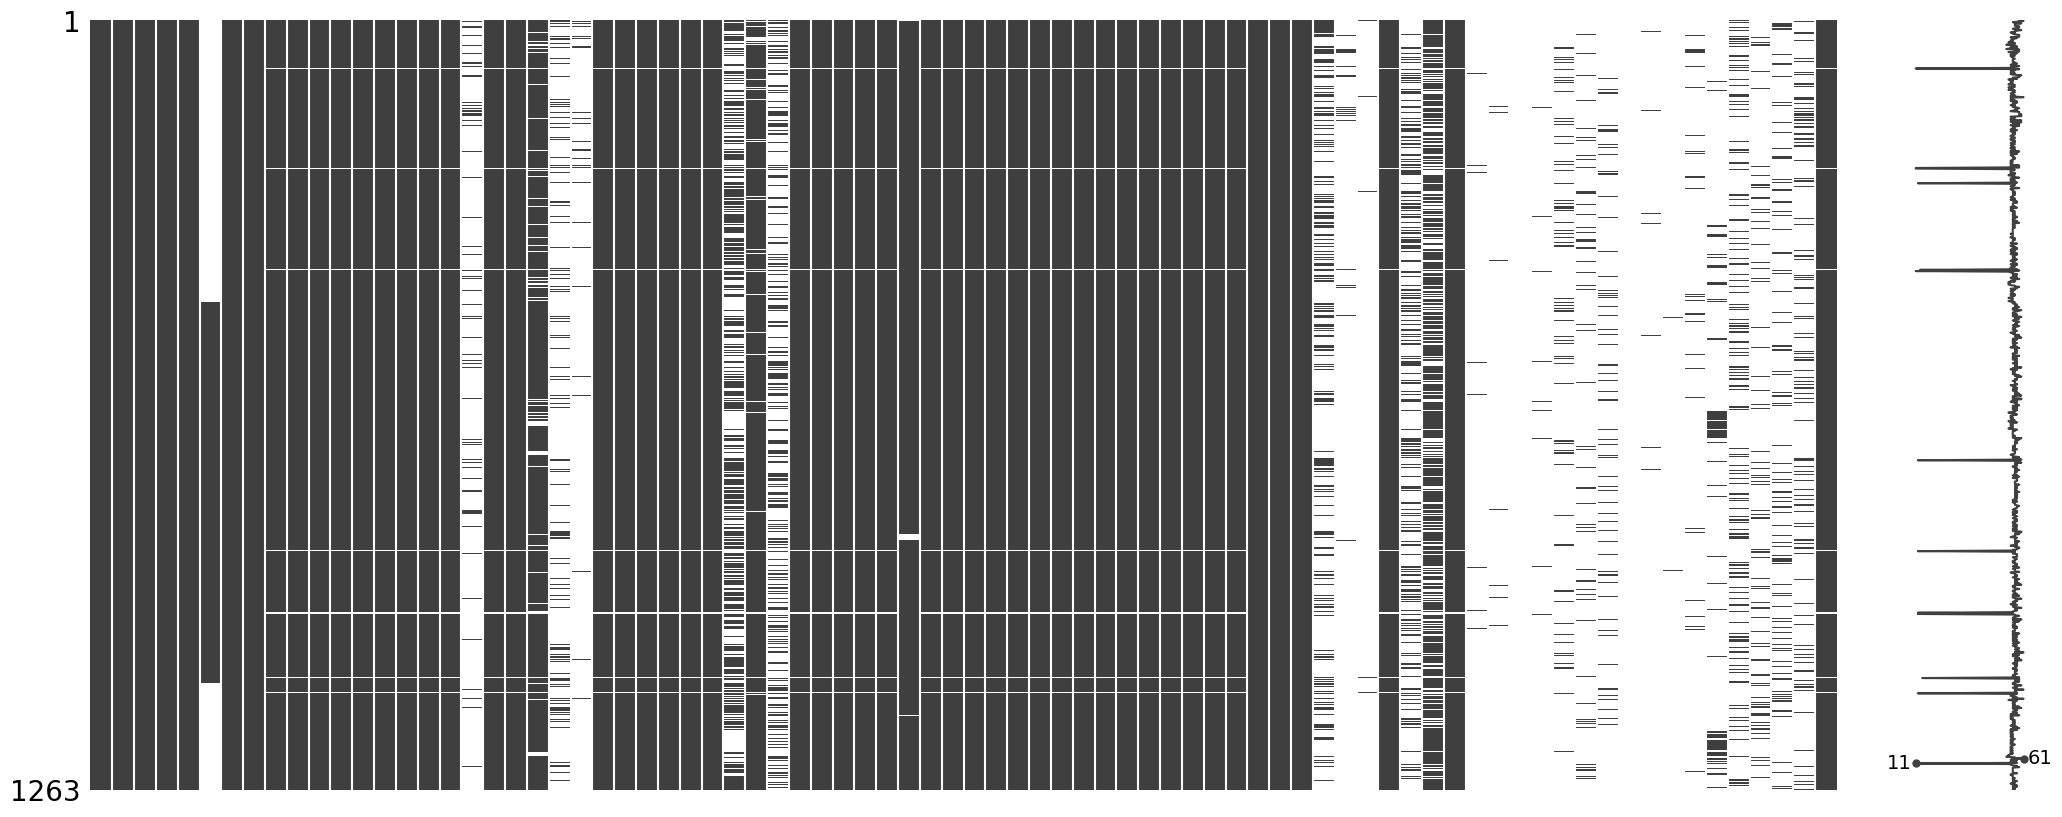

In [6]:
# Visualizar los valores nulos graficamente:
msno.matrix(df)

In [ ]:
# Visualiza los valores nulos con una gráfica de barras
msno.bar(df)

<Axes: >

In [146]:
# Calcular la Cantidad de Valores Nulos por Columna.
valores_nulos = df.isnull().sum()

# Clasificar las Columnas Según los Rangos de Valores Nulos.

# a) Columnas Sin Ningún Valor Nulo:
columnas_sin_nulos = valores_nulos[valores_nulos == 0].index.tolist()
print("Columnas sin valores nulos:", columnas_sin_nulos)

# b) Columnas con Mas de 200 Valores Nulos:
columnas_mas_200_nulos = valores_nulos[valores_nulos > 200].index.tolist()
print("Columnas con mas de 200 valores nulos:", columnas_mas_200_nulos)

# c) Columnas con Entre 50 y 200 Valores Nulos:
columnas_50_200_nulos = valores_nulos[valores_nulos.between(50, 200)].index.tolist()
print("Columnas con entre 50 y 200 valores nulos:", columnas_50_200_nulos)

# d) Columnas con Entre 1 y 50 Valores Nulos:
columnas_1_50_nulos = valores_nulos[valores_nulos.between(1, 50)].index.tolist()
print("Columnas con entre 1 y 50 valores nulos:", columnas_1_50_nulos)

# e) Columnas con Todos sus Valores Nulos:
columnas_todos_nulos = valores_nulos[valores_nulos == df.shape[0]].index.tolist()
print("Columnas con todos sus valores nulos:", columnas_todos_nulos)

Columnas sin valores nulos: ['Marca temporal', 'Marcar entrevista como:', 'Fecha de la entrevista:', 'Fecha de la entrevista-Final:', 'Equipo Técnico:', 'Localidad:', 'Departamento:', 'Devolución con respecto a la gestión de la herramienta o equipamiento:', 'Evaluación Final:', 'Herramienta/as aprobada/as por Equipo Técnico:']
Columnas con mas de 200 valores nulos: ['Referencia a Expediente:', 'Observaciones Respecto al IVA:', 'Facebook del emprendimiento:', 'E-mail (Del Emprendimiento):', 'En caso de haber recibido algún tipo de capacitación, marque cuales:', 'Qué función cumplen?:', 'Monto Máximo ($) aprobado por Equipo Técnico:', 'Herramienta comprada Efectivamente:', 'Observaciones de la entrevista:', 'Sub-Rubro:', 'Sub-Rubro:.1', 'Actividad:', 'Actividad:.1', 'Actividad:.2', 'Actividad:.3', 'Actividad:.4', 'Actividad:.5', 'Actividad:.6', 'Actividad:.7', 'Actividad:.8', 'Actividad:.9', 'Actividad:.10', 'Actividad:.11', 'Actividad:.12', 'Actividad:.13', 'Actividad:.14', 'Actividad:.

Luego del análisis exploratorio inicial del dataset observamos lo siguiente:

* El dataset contiene 80 columnas y 1263 registros. Cada registro representa un emprendedor que ha sigo cargado por un técnico administrativo a través del formulario de Google. 💻

#### Interpretación de los valores nulos según su distribución en el dataset:

  - `a) Columnas sin valores nulos:`
    -  ❌ 'Marca temporal': Representa el momento en que se cargó el formulario. No es tan relevante para mis objetivos por el momento.

    - ✅ 'Marcar entrevista como': Es importante que no haya valores nulos porque es relevante saber si la entrevista se pudo realizar, o cual fue la razón por la que no se realizó la misma.

    -  ❌ 'Fecha de la entrevista': Momento en que se visitó al emprendedor, un dato muy relevante para a futuro realizar series de tiempo.

    - ✅ 'Fecha de la entrevista-Final': Es el mismo dato que el anterior pero se le ha aplicado una fórmula de excel para que devuelva la fecha en formato DD/MM/AAAA (Puedo eliminar la columna 'Fecha de la entrevista')

    - ✅ 'Equipo Técnico': Representa a la persona que cargó el formulario y generalmente la que realizó la entrevista al emprendedor. No es relevante para mis objetivos actuales, aunque a futuro se podría medir la tendencias o sesgos del personal en la aprobación de los beneficiarios.

    - ✅ 'Localidad' y 'Departamento': Datos para geolocalización de los emprendedores entrevistados.

    - ✅ 'Ganancia Mensual-Final': Representa la diferencia entre los ingresos del emprendimiento y los costos de producir u ofrecer un servicio. Dato importante para evaluar el impacto de la participación en el programa del emprendedor a futuro.

    - ✅ 'Devolución con respecto a la gestión de la herramienta o equipamiento': Dado que es una variable categórica con posible resultado Aprobado/No aprobado, considero que es una variable muy relevante ya que **puede ser considerada como variable objetivo**.

    - 📝 'Evaluación Final': Breve justificación donde cada entrevistador declara el motivo de su evaluación como positiva o negativa. Es importante que este dato no sea nulo, aunque pueda ser dificil de manejar dato su variabilidad. Podría visualizarce como una nube de palabras.

    - 📝🛠️ 'Herramienta/as aprobada/as por Equipo Técnico': Detalle de las herramientas que se le otorgarán al emprendedor en caso de ser aprobado. Dato relevante para evaluar el impacto de la participación en el programa del emprendedor a futuro. Podría realizarce un análisis de frecuencia de las herramientas más solicitadas.

  - `b) Columnas con mas de 200 valores nulos:`
    -  ❌ 'Referencia a Expediente': Dato poco relevante para mi objetivo, además el equipo tecnico observó que raramente vincularon el formulario al expediente una vez obtenido su numero de identificación.

    -  ❌ 'Observaciones Respecto al IVA': Dato poco relevante para mi objetivo, aunque podría ser relevante para evaluar la situación impositiva de los emprendedores.

    -  ❌ 'Facebook del emprendimiento': Dato poco relevante para mi objetivo, aunque podría ser relevante para evaluar la presencia en redes de los emprendedores. El equipo técnico observó que pocos tenian redes sociales.

    -  ❌ 'E-mail (Del Emprendimiento)': Dato poco relevante para mi objetivo, el equipo técnico observó que pocos tenian correo electrónico.

    -  🛠️ 'En caso de haber recibido algún tipo de capacitación marque cuales': Puede ser relevante para evaluar la capacitación previa de los emprendedores y como este valor repercute en su aprobación. Evaluar si la cantidad de datos permite realizar un análisis de frecuencia.

    -  ❌ 'Qué función cumplen?': Poco relevante para mi objetivo, se refiere a las tareas de otros integrantes en un emprendimiento asociativo si fuera el caso.

    -  ❌ 'Monto Máximo ($) aprobado por Equipo Técnico': Es un dato relevante, pero el equipo técnico observó que generalmente no se establecía dado el contexto inflacionario de la economía.

    -  ❌ 'Herramienta comprada Efectivamente': Es un dato relevante para el análisis, pero el equipo observó que los pocos datos que se cargaron, no eran fiables.

    -  ❌ 'Observaciones de la entrevista': La mayoría de sus datos son nulos, su registro no era obligatorio por lo que el equipo técnico en general no registró observaciones de cada entrevista.

    -  ❌ 'Sub-Rubro' y 'Sub-Rubro1': Estas columnas son las utilizadas para obtener el 'Sub-Rubro-Final' por medio de operaciones en la planilla asociada al formulario, se pueden eliminar.

    -  ❌ 'Actividad', 'Actividad.1', 'Actividad.2', 'Actividad.3', 'Actividad.4', 'Actividad.5', 'Actividad.6', 'Actividad.7', 'Actividad.8', 'Actividad.9', 'Actividad.10', 'Actividad.11', 'Actividad.12', 'Actividad.13', 'Actividad.14' y 'Actividad.15': Estas columnas son las utilizadas para obtener la columna 'Actividad-Final' por medio de operaciones en la planilla asociada al formulario, se pueden eliminar.

  - `c) Columnas con entre 50 y 200 valores nulos:`
    - ❌ 'Nombre del emprendimiento': Dato poco relevante para mi objetivo, aunque puede servir para identificar a los emprendedores y realizar análisis de frecuencia de los nombres más comunes.

  - `d) Columnas con entre 1 y 50 valores nulos:`
    - 🧩 'Fecha de Nacimiento-Final': Es un dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 🧩 'Sexo': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 🧩 'Estado Civil': Dato poco relevante para mi objetivo, aunque puede ser relevante para evaluar la situación familiar de los emprendedores a futuro.

    - 🧩 'Nivel de Estudio Actual': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 🧩 'Situación Laboral PRINCIPAL': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 🧩 'Situación Habitacional': Dato algo relevante para el objetivo, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 🧩 'Tipo de vivienda': Dato algo relevante para el objetivo, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    -  ❌ 'Situación Familiar': Dato poco relevante para mi objetivo, aunque puede ser relevante para evaluar la situación familiar de los emprendedores a futuro.

    - 🧩 'Situación ante el IVA': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    -  ❌ 'Tramitó la Exención Impositiva en ATER?': Dato poco relevante para el análisis, se puede eliminar.

    - 🧩 'Ingreso MENSUAL de su Economía Familiar': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 📝🛠️ 'Descripción del Emprendimiento': Dato relevante pero difícil de manejar por su variabilidad, se puede realizar un análisis de frecuencia de las palabras más utilizadas.

    - 🛠️ 'Antigüedad del Emprendimiento (Años)': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes. Tratar de unificar con 'Antigüedad del Emprendimiento (Meses)'.

    - 🛠️ 'Antigüedad del Emprendimiento (Meses)': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes. Tratar de unificar con 'Antigüedad del Emprendimiento (Años)'.

    - 🛠️ 'Tiempo que dedica al emprendimiento (Días a la semana)': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes. Tratar de unificar con 'Tiempo que dedica al emprendimiento (Horas por día)'.

    - 🛠️ 'Tiempo que dedica al emprendimiento (Horas por día)': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes. Tratar de unificar con 'Tiempo que dedica al emprendimiento (Días a la semana)'.

    - 🧩 'Realizó algún tipo de capacitación previa para su emprendimiento': Dato relevante para el objetivo, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes. Es probable que se pueda realizar un análisis de frecuencia a futuro.

    - 📝 'Cantidad de personas involucradas en el emprendimiento': Dato medianamente relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 🛠️ 'Cómo realiza sus ventas? / Cómo ofrece sus servicios?': Dato relevante para el análisis.El mismo cuenta respuestas preseteadas resultado de un input tipo casilla de verificación. Evaluar como manipular los datos.

    - 🧩 'Utiliza tarjeta de crédito para realizar sus ventas?': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 📝 'Cantidad de clientes': Dato relevante pero difícil de manejar por su variabilidad, se puede realizar un análisis de frecuencia de las palabras más utilizadas.

    - ❌ 'Facturación Mensual (Ingresos Brutos)': Dato poco relevante para el anális ya que se tomará la "Ganancia Mensual-Final" la cual es resultado de la facturación - el costo mensual.

    - ❌ 'Costo Mensual (Egresos)': Dato poco relevante para el anális ya que se tomará la "Ganancia Mensual-Final" la cual es resultado de la facturación - el costo mensual.

    - 📝 'Detallar el nivel de producción semanal':  Dato relevante pero difícil de manejar por su variabilidad, se puede realizar un análisis de frecuencia de las palabras más utilizadas.

    - ❌ 'Donde compra la materia prima?': Dato poco relevante para los objetivos del análisis.

    - 🧩 'El emprendimiento se desarrolla en un ámbito': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 🛠️ 'Donde realiza su producción? / Donde ofrece su servicio?': Dato relevante para el análisis.El mismo cuenta respuestas preseteadas resultado de un input tipo casilla de verificación. Evaluar como manipular los datos.

    - 🧩 'Condiciones del espacio físico donde desarrolla el emprendimiento': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 📝 'Observaciones del espacio productivo': Dato poco relevante para los objetivos del análisis.

    - 🛠️ 'Qué habilitaciones posee su espacio productivo?': Dato relevante para el análisis.El mismo cuenta respuestas preseteadas resultado de un input tipo casilla de verificación. Evaluar como manipular los datos.

    - 🧩 'Servicio Eléctrico':  Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 🧩 'Servicio de Gas':  Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 🛠️ 'Participó en alguno de los siguientes programas del Min. de Desarrollo Social de E.R.?': Dato relevante para el análisis.El mismo cuenta respuestas preseteadas resultado de un input tipo casilla de verificación. Evaluar como manipular los datos.

    - 📝 'En qué invirtió o para qué utilizó el fortalecimiento adquirido?':  Dato poco relevante para los objetivos del análisis.

    - 📝 'Posee otras fuentes de financiamiento que haya destinado a su emprendimiento?':  Dato poco relevante para los objetivos del análisis.

    - 📝🛠️ 'Equipamiento con el que cuenta': Dato poco relevante para los objetivos del análisis.

    - 📝🛠️ 'Herramientas o equipamiento que solicita':  Dato poco relevante para los objetivos del análisis.

    - 📝🛠️ 'Aporte que obtendría en su emprendimiento a partir de la incorporación de la/las herramienta/as solicitada/as':  Dato poco relevante para los objetivos del análisis.

    - 🕵️‍♂️🧩 'Rubro': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 🕵️‍♂️🧩 'Sub-Rubro-Final': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 🕵️‍♂️🧩 'Actividad-Final': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

  - `Columnas con todos sus valores nulos:`
    - ❌ 'Actividad:.2': Esta columna es utilizada para obtener la columna 'Actividad-Final' por medio de operaciones en la planilla asociada al formulario, se pueden eliminar.

#### ❌ Eliminación de columnas innecesarias del dataset:

Elimino las columnas que identifiqué como irrelevantes para mi objetivo o que el equipo técnico señaló como poco fiables y también aquellas con demasiados valores nulos (más de 200) en el paso anterior. Estas columnas no aportan información relevante para los objetivos de mi proyecto y su eliminación simplificará el análisis de los datos.

In [147]:
columnas_a_eliminar = [
    "Marca temporal",
    "Fecha de la entrevista:",
    "Referencia a Expediente:",
    "Observaciones Respecto al IVA:",
    "Tramitó la Exención Impositiva en ATER?:",
    "Nombre del emprendimiento:",
    "Facebook del emprendimiento:",
    "E-mail (Del Emprendimiento):",
    "Situación Familiar:",
    "Qué función cumplen?:",
    "Facturación Mensual (Ingresos Brutos):",
    "Costo Mensual (Egresos):",
    "Donde compra la materia prima?:",
    "Monto Máximo ($) aprobado por Equipo Técnico:",
    "Herramienta comprada Efectivamente:",
    "Observaciones de la entrevista:",
    "Sub-Rubro:",
    "Sub-Rubro:.1",
    "Actividad:",
    "Actividad:.1",
    "Actividad:.2",
    "Actividad:.3",
    "Actividad:.4",
    "Actividad:.5",
    "Actividad:.6",
    "Actividad:.7",
    "Actividad:.8",
    "Actividad:.9",
    "Actividad:.10",
    "Actividad:.11",
    "Actividad:.12",
    "Actividad:.13",
    "Actividad:.14",
    "Actividad:.15",
]

# Eliminar las columnas seleccionadas:
df.drop(columnas_a_eliminar, inplace=True, axis=1)

In [148]:
# Mostrar la nueva forma del conjunto de datos: (1263 Registros, 46 Columnas)
df.shape

(1263, 46)

In [149]:
# Copio el dataframe "df" y lo asigno como "df_drop":
df_drop = df.copy()
df_drop.head(3)

Marcar entrevista como: Fecha de la entrevista-Final: Equipo Técnico:    Localidad: Departamento: Fecha de Nacimiento-Final:      Sexo: Estado Civil:  Nivel de Estudio Actual: Situación Laboral PRINCIPAL: Situación Habitacional: Tipo de vivienda:     Situación ante el IVA:  Ingreso MENSUAL de su Economía Familiar:                    Descripción del Emprendimiento:  Antigüedad del Emprendimiento (Años):  Antigüedad del Emprendimiento (Meses):  Tiempo que dedica al emprendimiento (Días a la semana):  Tiempo que dedica al emprendimiento (Horas por día): Realizó algún tipo de capacitación previa para su emprendimiento: En caso de haber recibido algún tipo de capacitación, marque cuales: Cantidad de personas involucradas en el emprendimiento: Cómo realiza sus ventas? / Cómo ofrece sus servicios?: Utiliza tarjeta de crédito para realizar sus ventas?:                              Cantidad de clientes:  Ganancia Mensual-Final:           Detallar el nivel de producción semanal: El emprendimiento se desarrolla en un ámbito: Donde realiza su producción? / Donde ofrece su servicio?: Condiciones del espacio físico donde desarrolla el emprendimiento:              Observaciones del espacio productivo: Qué habilitaciones posee su espacio productivo?:      Servicio Eléctrico: Servicio de Gas: Participó en alguno de los siguientes programas del Min. de Desarrollo Social de E.R.?: En qué invirtió o para qué utilizó el fortalecimiento adquirido?: Posee otras fuentes de financiamiento que haya destinado a su emprendimiento?:                    Equipamiento con el que cuenta: Herramientas o equipamiento que solicita: Aporte que obtendría en su emprendimiento a partir de la incorporación de la/las herramienta/as solicitada/as: Devolución con respecto a la gestión de la herramienta o equipamiento:                                  Evaluación Final: Herramienta/as aprobada/as por Equipo Técnico:               Rubro:   Sub-Rubro-Final:         Actividad-Final:
0  La entrevista se realizó correctamente.           2016-03-17 00:00:00          Gisela  Gualeguaychú  Gualeguaychú        1971-02-09 00:00:00   Femenino      Casada/o       Secundario Completo                 Autoempleado      Vivienda Alquilada            TIPO B         Monotributo Social                                    6000.0  Pre pizzas, pasta frolas, cremonas, pan sabori...                                   12.0                                     1.0                                                5.0                                                      4.0                                                    SI                                         Capacitación en el Oficio                                                                    1       Tiene un puesto fijo en una Feria., Coordina l...                                                     NO                                                    15                      NaN                               10 a 30 kg de harina                                        Urbano  En su casa. (No posee un espacio destinado al ...                                                  Regular.                  Muy chico. 3 x 5 m. Techo cieloraso, piso cera...                                          Ninguna  Instalación Monofásica.    Gas Envasado.  Programa de Microcréditos para el Desarrollo d...                                                            Insumos- Elementos de Cocina                                                                No                              Horno 6 moldes pizzero, Heladera familiar, bat...             Amasadora y sobadora de mesa   Para agregar otros productos con hojaldre y ag...                                                                                                       Aprobado                      Se considera necesario otorgar la maquinaria s...                           Amasadora y Sobadora           Producción       Panificación               Pastelería
1  La entrevista se realizó correctamente.   

### 🧩 Imputación de valores faltantes:

Para las columnas que considero relevantes y que tienen algunos valores nulos (Entre 1 y 50), evaluaré la posibilidad de imputar los valores faltantes utilizando la media, la mediana o la moda de los datos disponibles. También puedo consultar al equipo técnico para obtener información adicional sobre los emprendedores y completar los datos faltantes (Esto es mas difícil dado que es un programa que se ejecutó en el período 2016-2019).

In [150]:
columnas_a_imputar = [
    "Fecha de Nacimiento-Final:",
    "Sexo:",
    "Estado Civil:",
    "Nivel de Estudio Actual:",
    "Situación Laboral PRINCIPAL:",
    "Situación Habitacional:",
    "Tipo de vivienda:",
    "Situación ante el IVA:",
    "Ingreso MENSUAL de su Economía Familiar:",
    "Realizó algún tipo de capacitación previa para su emprendimiento:",
    "Utiliza tarjeta de crédito para realizar sus ventas?:",
    "El emprendimiento se desarrolla en un ámbito:",
    "Condiciones del espacio físico donde desarrolla el emprendimiento:",
    "Servicio Eléctrico:",
    "Servicio de Gas:",
]

Es probable que muchos de estos valores sean nulos porque la entrevista no pudo concretarse o alguna situación excepcional. Primero voy a evaluar que representan los registros con muchos o todos sus valores nulos.

(13, 46)


<Axes: >

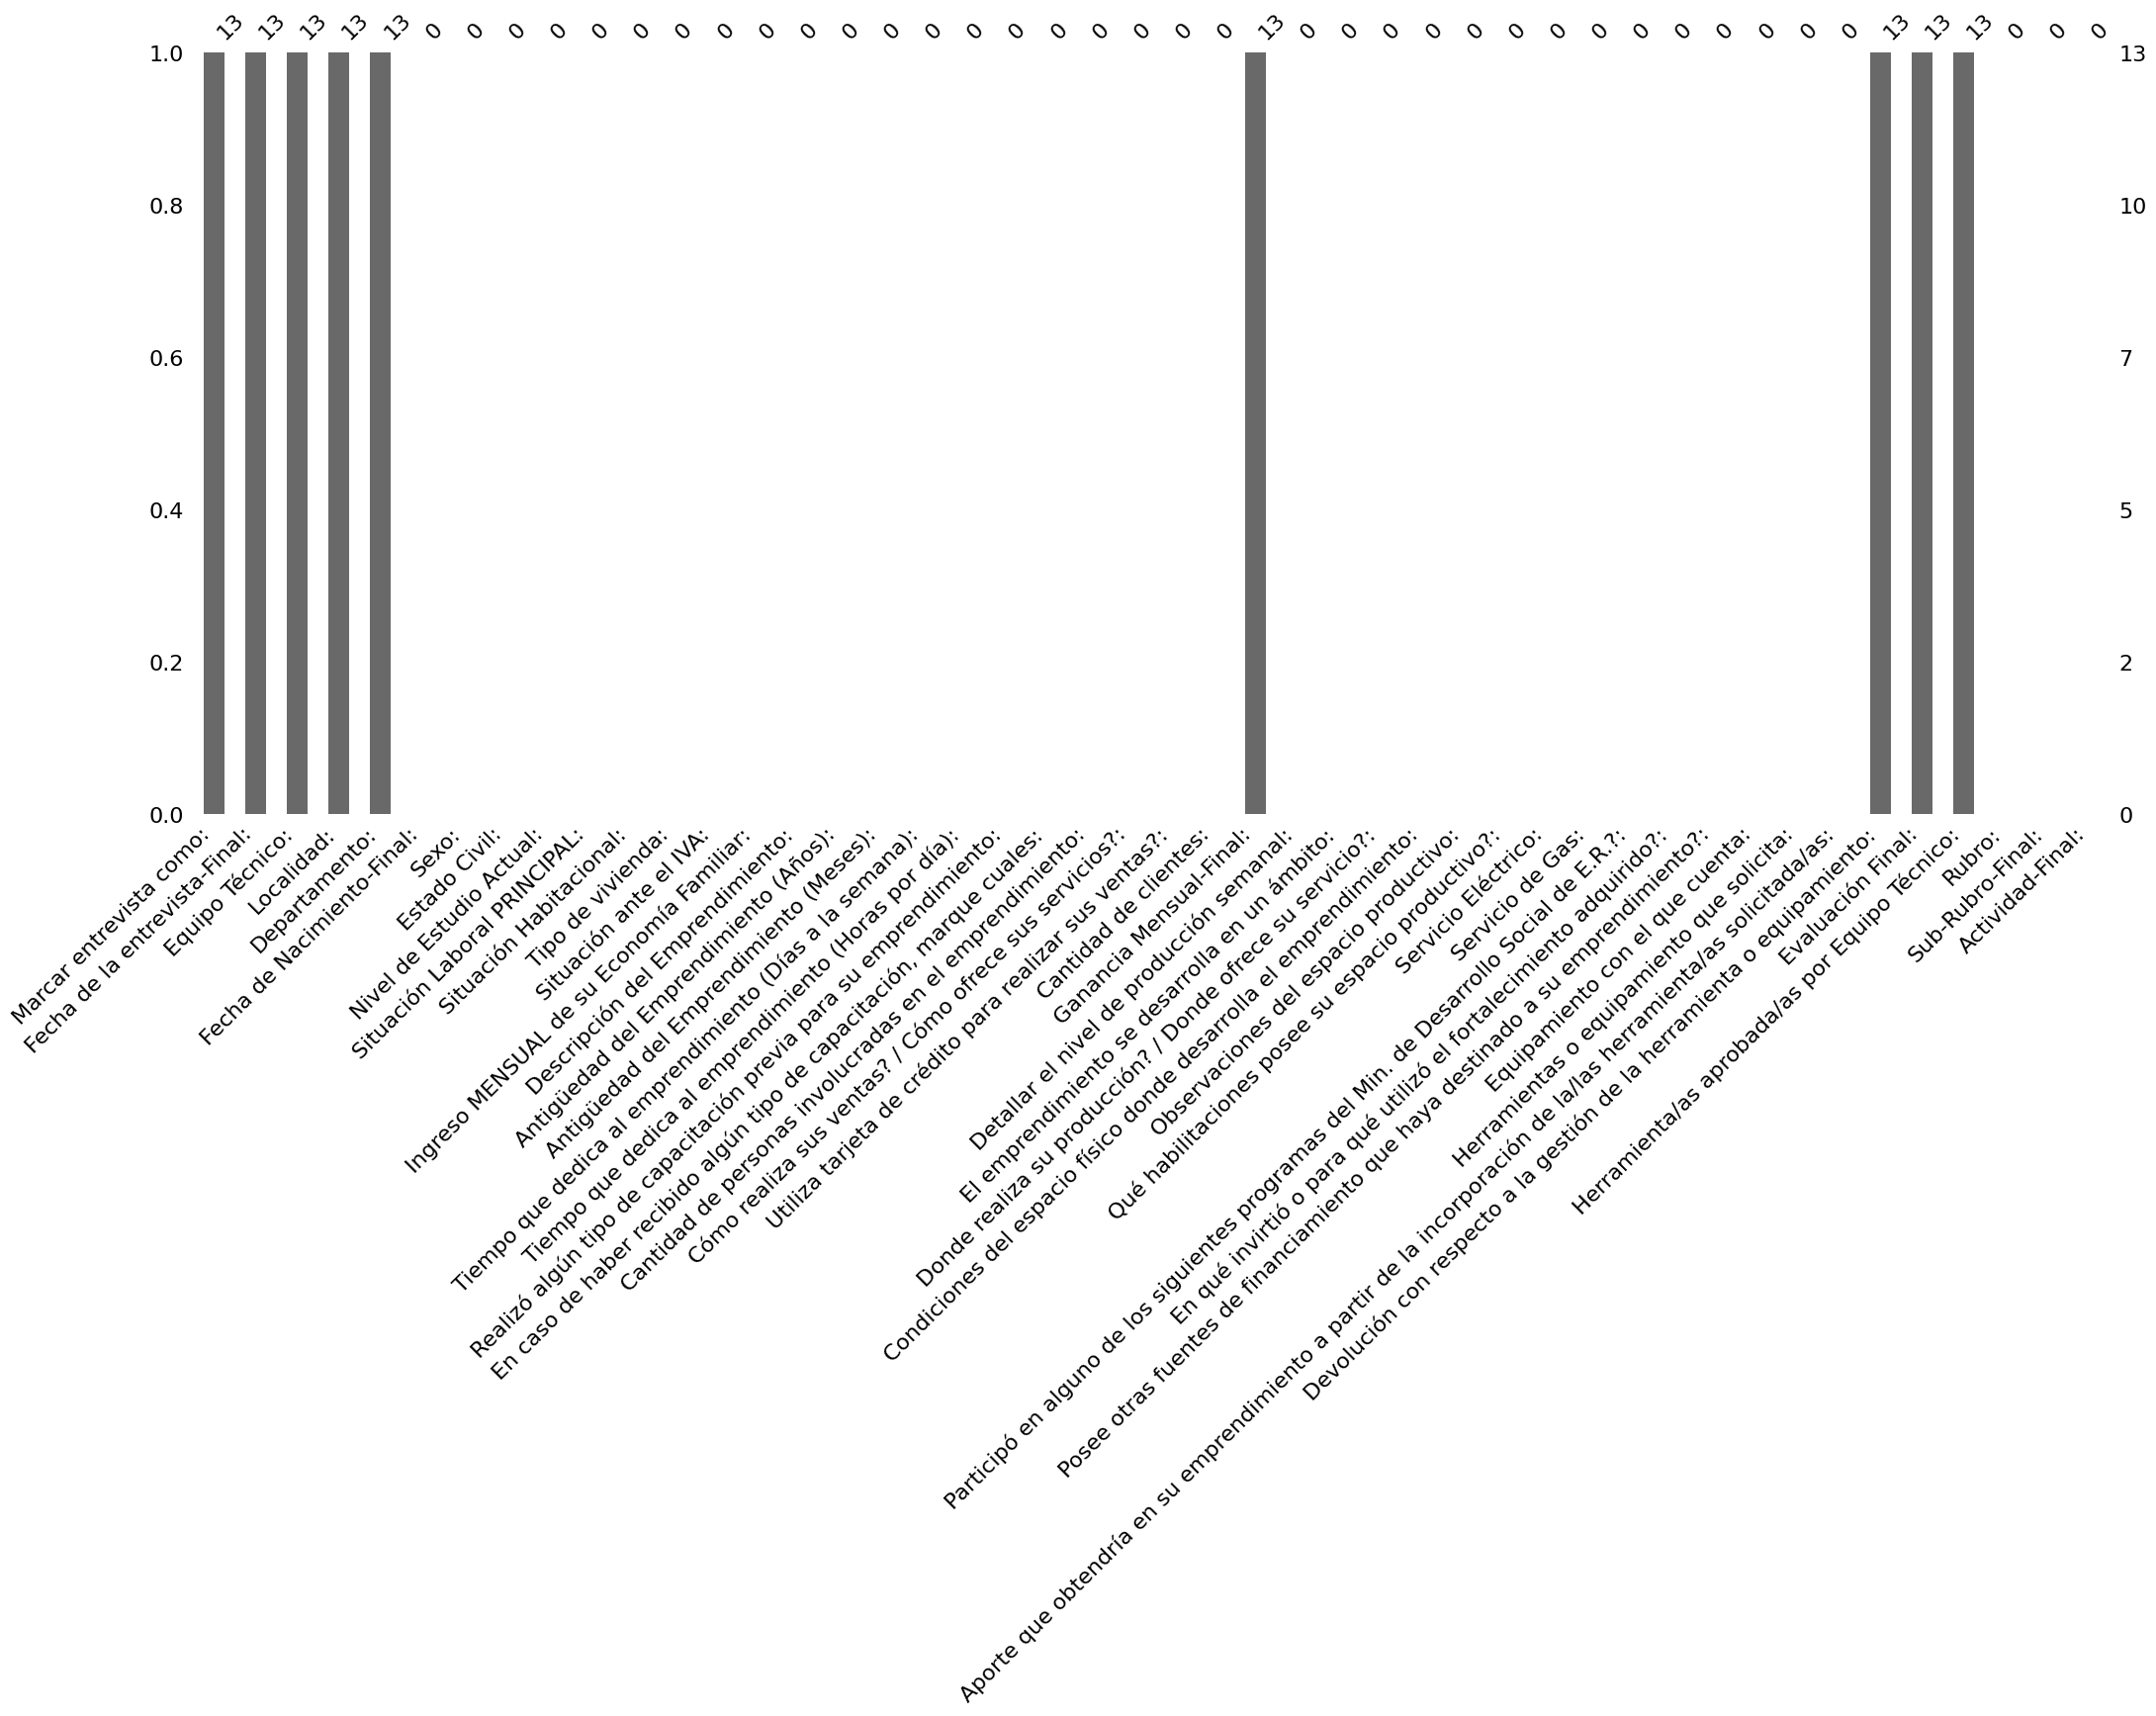

In [151]:
# Seleccionar filas donde alguna de las columnas de la lista tenga valores nulos
filas_con_nulos = df_drop[df_drop[columnas_a_imputar].isnull().any(axis=1)]

# Mostrar las filas con nulos
print(filas_con_nulos.shape)
# Visualiza los valores nulos con una gráfica de barras
msno.bar(filas_con_nulos)

In [152]:
filas_con_nulos

Marcar entrevista como: Fecha de la entrevista-Final: Equipo Técnico:              Localidad: Departamento: Fecha de Nacimiento-Final: Sexo: Estado Civil: Nivel de Estudio Actual: Situación Laboral PRINCIPAL: Situación Habitacional: Tipo de vivienda: Situación ante el IVA:  Ingreso MENSUAL de su Economía Familiar: Descripción del Emprendimiento:  Antigüedad del Emprendimiento (Años):  Antigüedad del Emprendimiento (Meses):  Tiempo que dedica al emprendimiento (Días a la semana):  Tiempo que dedica al emprendimiento (Horas por día): Realizó algún tipo de capacitación previa para su emprendimiento: En caso de haber recibido algún tipo de capacitación, marque cuales: Cantidad de personas involucradas en el emprendimiento: Cómo realiza sus ventas? / Cómo ofrece sus servicios?: Utiliza tarjeta de crédito para realizar sus ventas?: Cantidad de clientes:  Ganancia Mensual-Final: Detallar el nivel de producción semanal: El emprendimiento se desarrolla en un ámbito: Donde realiza su producción? / Donde ofrece su servicio?: Condiciones del espacio físico donde desarrolla el emprendimiento: Observaciones del espacio productivo: Qué habilitaciones posee su espacio productivo?: Servicio Eléctrico: Servicio de Gas: Participó en alguno de los siguientes programas del Min. de Desarrollo Social de E.R.?: En qué invirtió o para qué utilizó el fortalecimiento adquirido?: Posee otras fuentes de financiamiento que haya destinado a su emprendimiento?: Equipamiento con el que cuenta: Herramientas o equipamiento que solicita: Aporte que obtendría en su emprendimiento a partir de la incorporación de la/las herramienta/as solicitada/as: Devolución con respecto a la gestión de la herramienta o equipamiento:                                  Evaluación Final:     Herramienta/as aprobada/as por Equipo Técnico: Rubro: Sub-Rubro-Final: Actividad-Final:
79     El emprendedor no se encontraba en el Domicilio.           2016-06-03 00:00:00          Gisela                  La Paz        La Paz                        NaN   NaN           NaN                      NaN                          NaN                     NaN               NaN                    NaN                                       NaN                             NaN                                    NaN                                     NaN                                                NaN                                                      NaN                                                   NaN                                                               NaN                                                                  NaN                                                     NaN                                                    NaN                      NaN                      0.0                                      NaN                                           NaN                                                NaN                                                       NaN                                                   NaN                                              NaN                 NaN              NaN                                                NaN                                                                                     NaN                                                               NaN                                                         NaN                                       NaN                                                NaN                                                                                                    No aprobado                      El equipo técnico no aprueba el otorgamiento d...                                               ----    NaN              NaN              NaN
242   El emprendedor no cumplía con los requisitos d...           2016-07-27 00:00:00         Ricardo  Concepción del Uruguay       Uruguay                        NaN   NaN           NaN                      NaN                          NaN                     N

In [153]:
# Ver los valores únicos de la columna "Marcar entrevista como:"
valores_unicos = filas_con_nulos["Marcar entrevista como:"].value_counts()

# Mostrar los resultados
print(valores_unicos)

Marcar entrevista como:
El emprendedor no cumplía con los requisitos del programa.    7
El emprendedor no estaba interesado en el programa.           5
El emprendedor no se encontraba en el Domicilio.              1
Name: count, dtype: int64


El siguiente paso será, eliminar las filas que corresponden a las situaciones en las que la entrevista no pudo realizarse por razones que no están relacionadas directamente con el emprendimiento, sino más bien por situaciones excepcionales como:

- El emprendedor no cumplía con los requisitos del programa
- El emprendedor no estaba interesado en participar
- El emprendedore no se encontraba en el domicilio.

Para hacerlo, definí una lista con estos valores específicos y luego apliqué un filtro para eliminar todas las filas que contenían dichos valores en la columna "Marcar entrevista como:". Esto me permitió reducir el dataset a solo los casos en los que la entrevista se realizó o que las razones de no realización fueron más pertinentes al análisis de los emprendedores.

In [154]:
# Definir los valores que quieres eliminar
valores_a_eliminar = [
    "El emprendedor no cumplía con los requisitos del programa.",
    "El emprendedor no estaba interesado en el programa.",
    "El emprendedor no se encontraba en el Domicilio.",
]

# Crear un nuevo dataframe eliminando las filas que contienen esos valores
df_entrevistados = df_drop[~df_drop["Marcar entrevista como:"].isin(valores_a_eliminar)]

# Verificar el resultado
print(df_entrevistados.shape)

(1250, 46)


<Axes: >

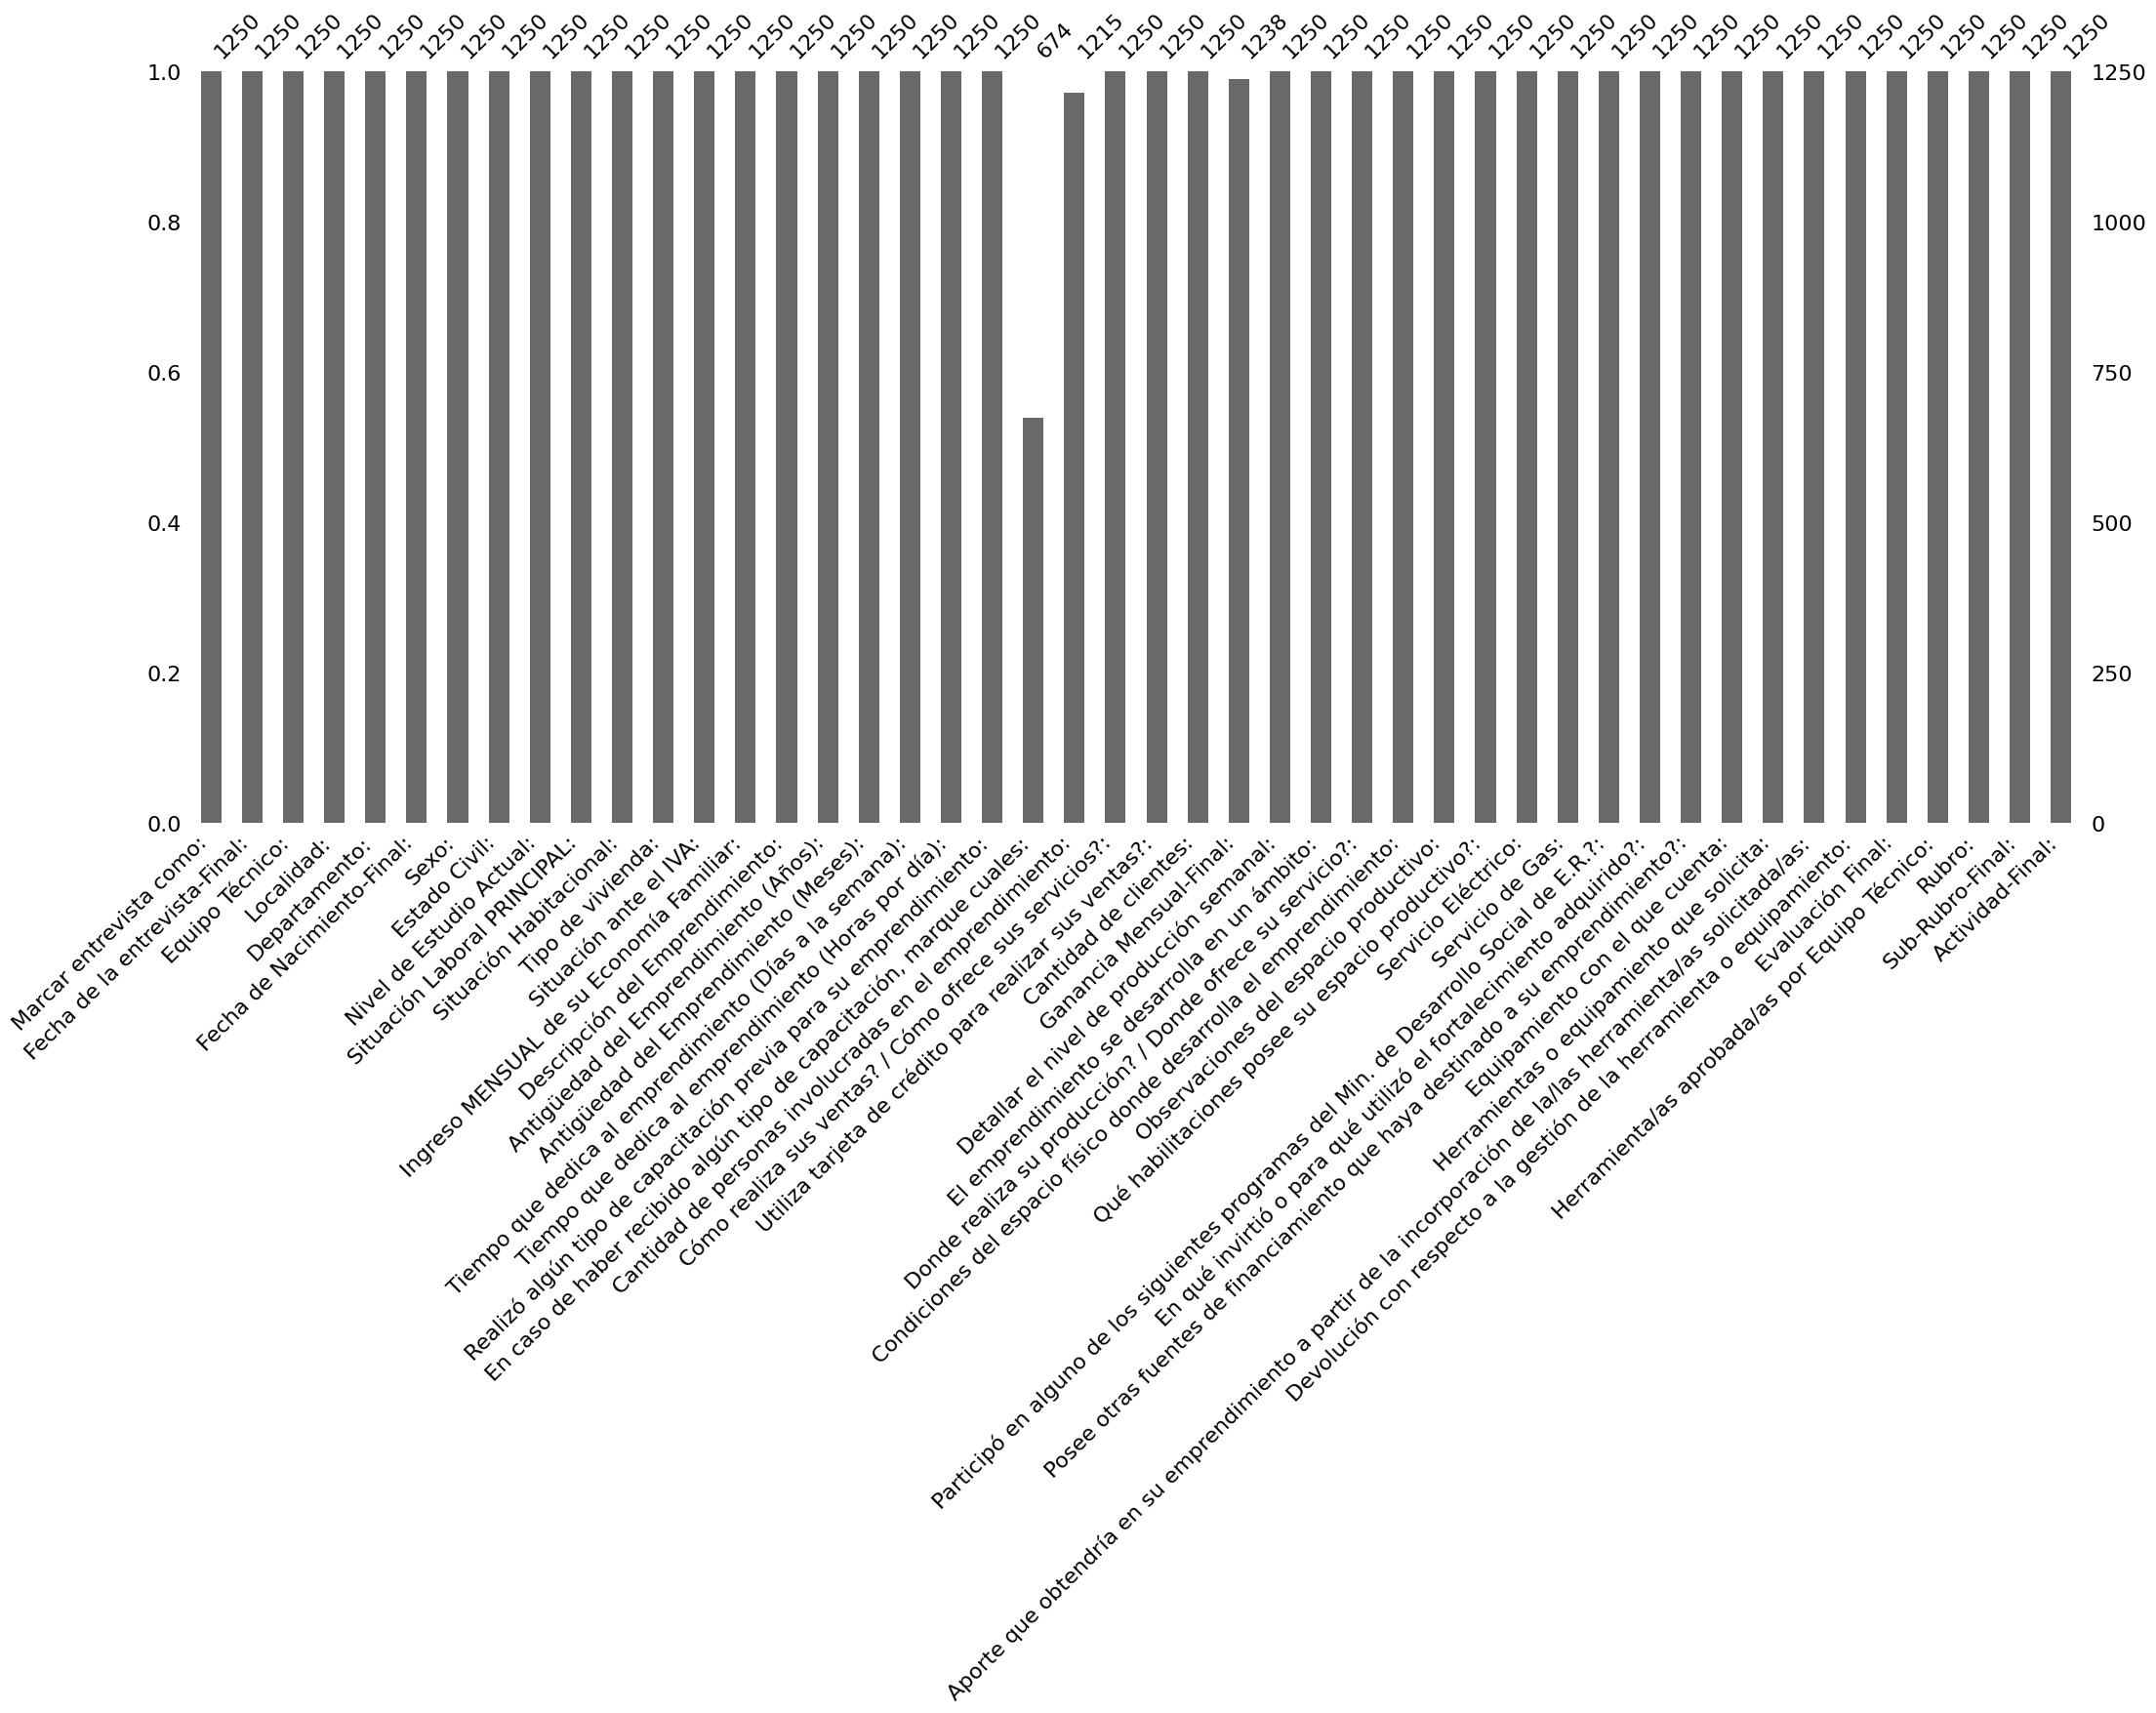

In [155]:
msno.bar(df_entrevistados)

In [156]:
# Verifico los valores únicos de las columna "En caso de haber recibido algún tipo de capacitación, marque cuales:""
capacitacion = df_entrevistados[
    "En caso de haber recibido algún tipo de capacitación, marque cuales:"
].value_counts()
print(capacitacion)

En caso de haber recibido algún tipo de capacitación, marque cuales:
Capacitación en el Oficio                                                                                       493
Capacitación en el Oficio, Capacitación en Costos / Administración, Capacitación en Marketing / Comunicación     40
Capacitación en el Oficio, Capacitación en Costos / Administración                                               30
Capacitación en Costos / Administración, Capacitación en Marketing / Comunicación                                 8
Capacitación en el Oficio, Capacitación en Marketing / Comunicación                                               8
                                                                                                               ... 
Aprendió trabajando en relación de dependencia.                                                                   1
Tecnicatura en Diseño de Indumentaria y Textil.                                                                   1
Cur

In [157]:
# Verifico los valores únicos de la columna "Cantidad de personas involucradas en el emprendimiento:"
personas = df_entrevistados[
    "Cantidad de personas involucradas en el emprendimiento:"
].value_counts()
print(personas)

Cantidad de personas involucradas en el emprendimiento:
Emprendimiento individual                                                            400
Emprendimiento individual.                                                           240
1                                                                                    107
"Emprendimiento individual".                                                          33
2                                                                                     28
                                                                                    ... 
Emprendimiento individual. Eventualmente llama a alguien según el tipo de trabajo      1
Padre, madre y hermano.                                                                1
Trabaja junto a su pareja.                                                             1
Emprendimiento familiar.                                                               1
Emprendimiento grupal. 4 integrantes                  

Luego de eliminar las filas que no aportaban información relevante, procedí a evaluar los valores faltantes en las columnas que todavía tenían nulos. Estas columnas son:

- **Caso 1**: `En caso de haber recibido algún tipo de capacitación, marque cuales:` **(INSIGHT💡)** Esta columna es relevante para evaluar la capacitación previa de los emprendedores y cómo este valor repercute en su aprobación. Las opciones predefinidas de respuesta incluyen:

  - Capacitación en el Oficio
  - Capacitación en Costos / Administración
  - Capacitación en Marketing / Comunicación
  - No recibió capacitación
  - Otros (Pregunta abierta)

La opción "Otros" permite a los encuestados especificar otras formas de capacitación, lo cual genera una gran cantidad de texto libre, dificultando su análisis e imputación directa. 

Para abordar esto, decidí aplicar una función de estandarización en un paso posterior, para procesar los campos de selección múltiple y extraer la información de manera más estructurada. 🛠️ Este procesamiento me permitirá identificar las capacitaciones más comunes y evaluar su relación con la aprobación de los proyectos.

Para futuros formularios, sería ideal limitar las respuestas a opciones más estructuradas, lo que facilitaría la toma de decisiones y el análisis de los datos recopilados.

- Caso 2: `Cantidad de personas involucradas en el emprendimiento:` **(INSIGHT💡)** Esta columna contiene una mezcla de valores categóricos, numéricos y texto libre, lo que dificulta su imputación directa. ❌ Decidí eliminar esta columna, sin embargo, es un dato clave para el análisis y para mejorar futuros formularios. Se recomienda estandarizar las respuestas en las siguientes categorías:

    - Individual: Cuando solo una persona está involucrada en el emprendimiento.
    - Familiar: Cuando participan familiares directos en el emprendimiento.
    - Asociativo o grupal: Cuando participan varias personas de manera asociativa o en equipo.
    - Cooperativa: Para emprendimientos que operan bajo un esquema cooperativo formal.
    - Otro: Para respuestas que no encajan claramente en las categorías anteriores o contienen detalles adicionales específicos.

In [158]:
# Caso 2:
# Eliminar la columna 'Cantidad de personas involucradas en el emprendimiento'
df_entrevistados = df_entrevistados.drop(
    columns=["Cantidad de personas involucradas en el emprendimiento:"]
)

<Axes: >

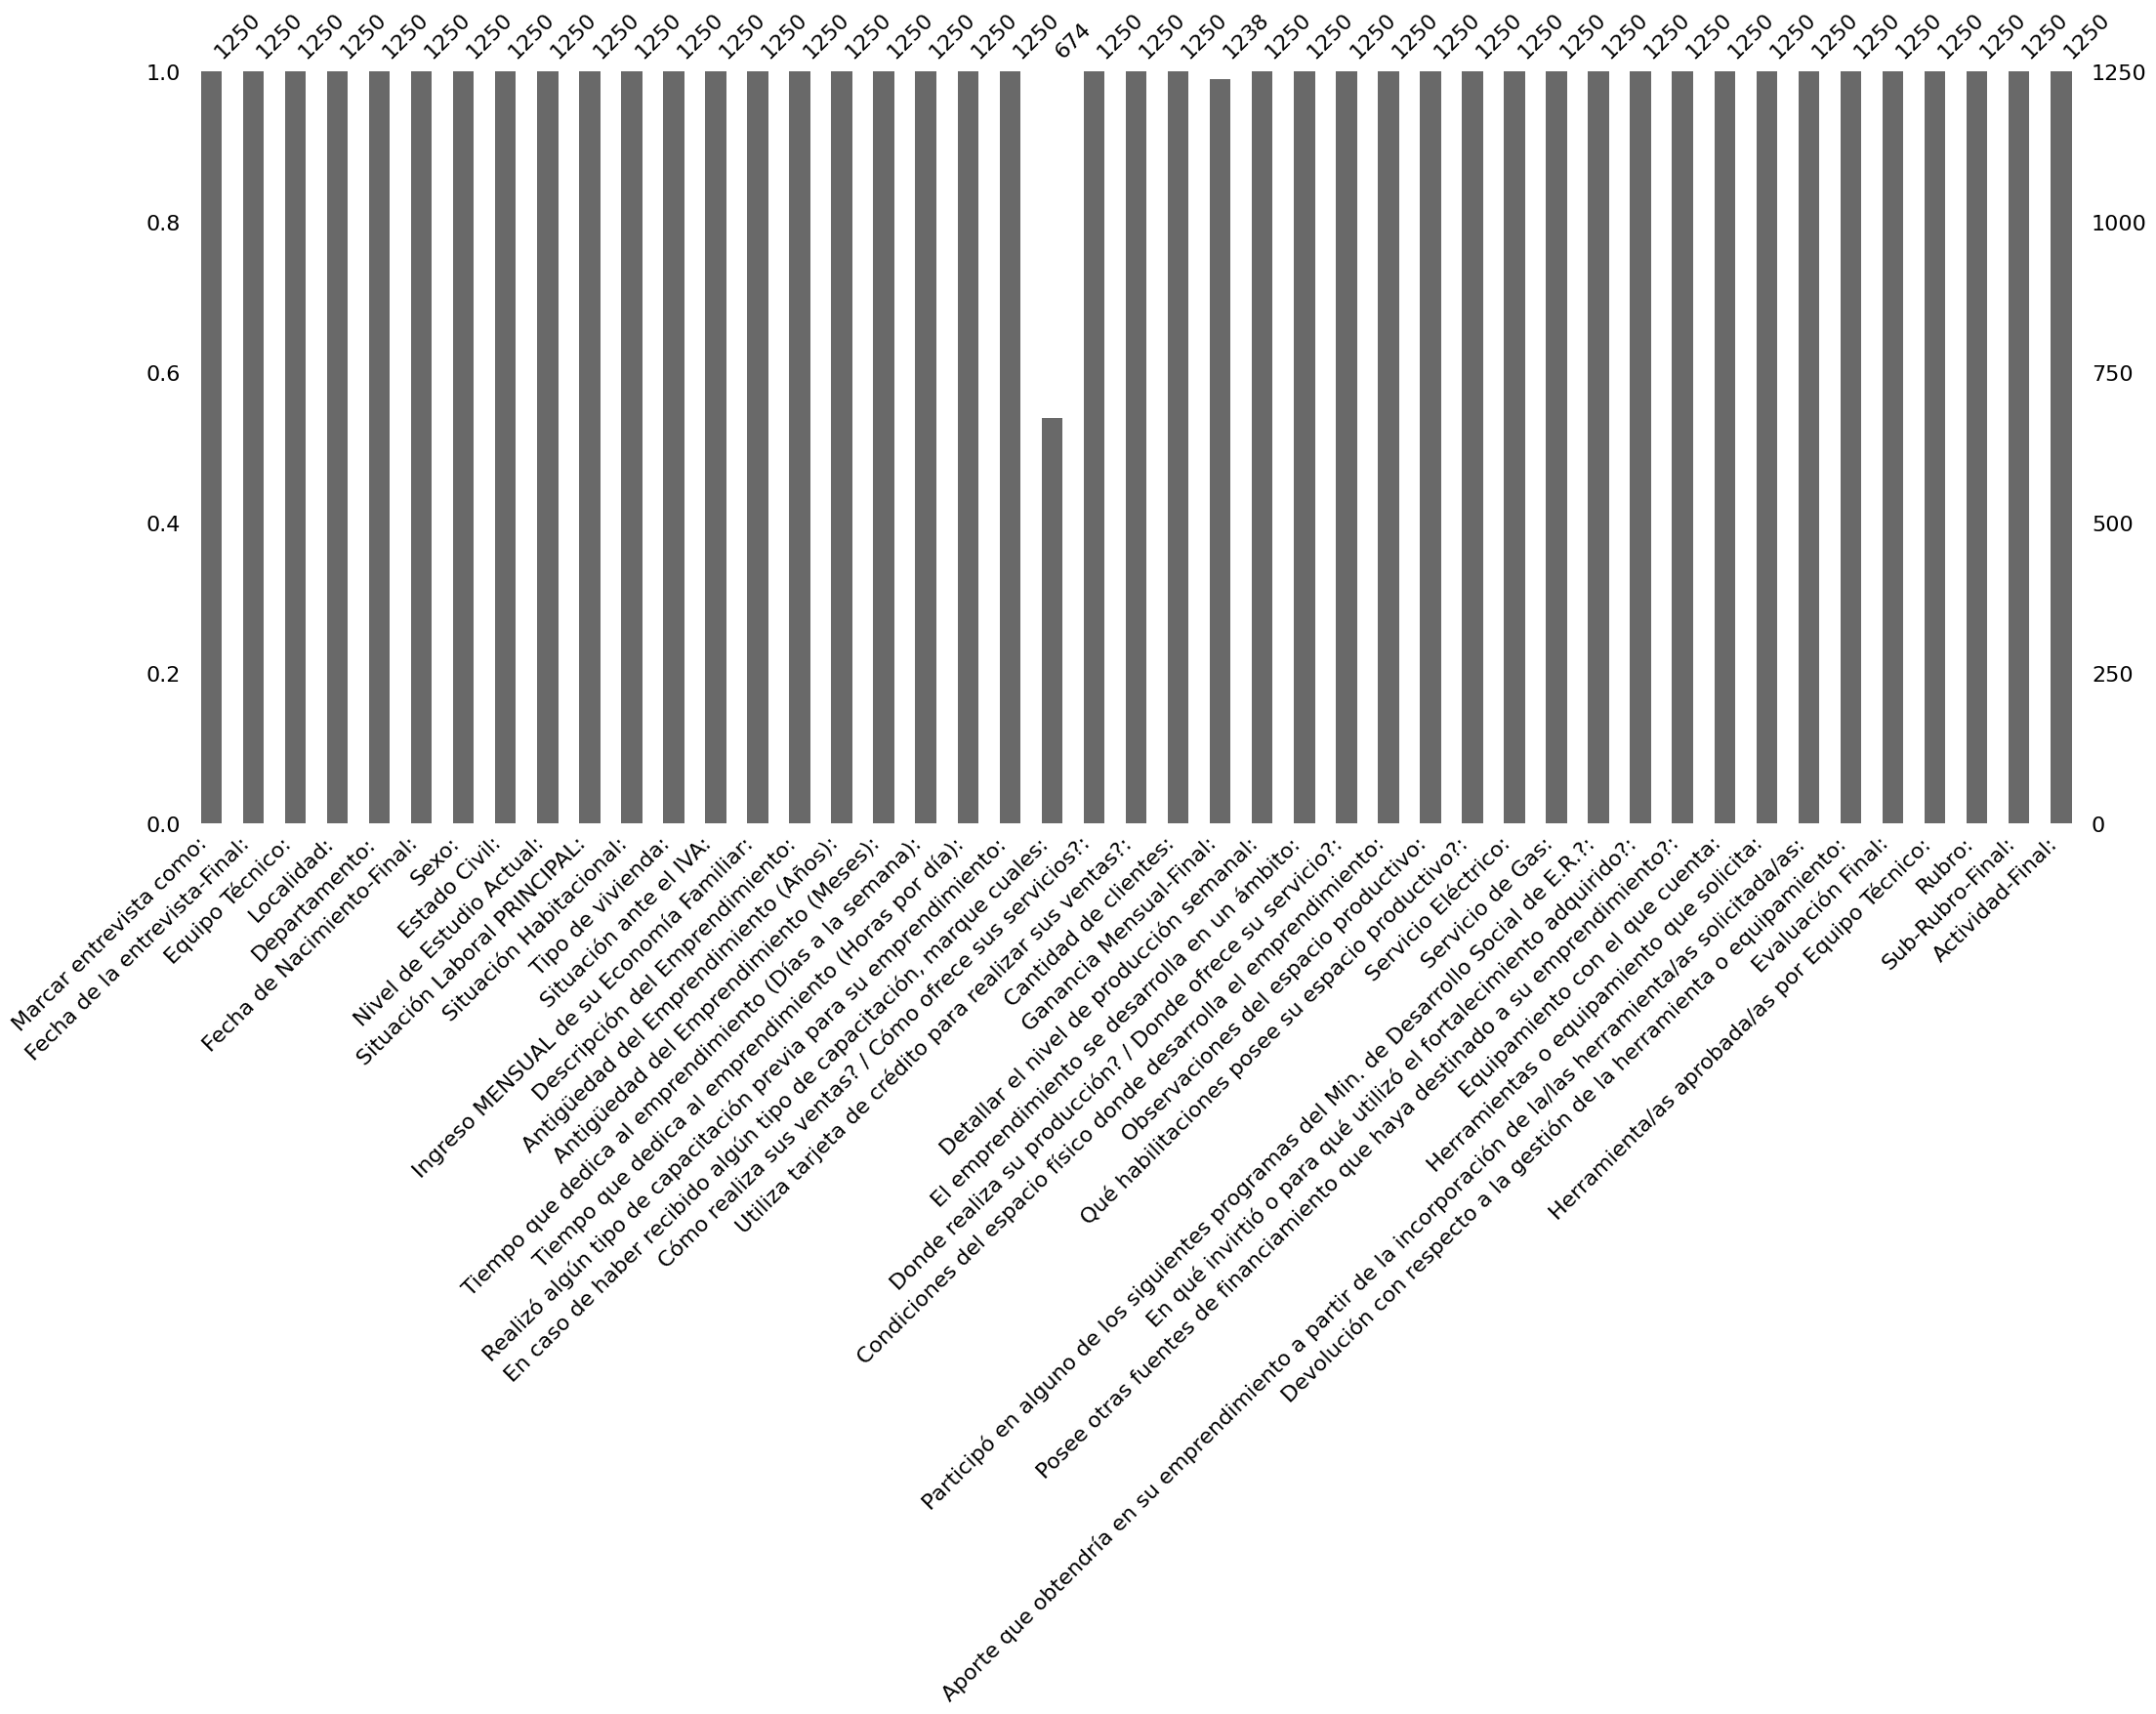

In [159]:
msno.bar(df_entrevistados)

### 📝 Análisis de descripciones textuales extensas:

Las siguientes columnas contienen datos que incluyen observaciones y descripciones de texto libre realizadas por el equipo técnico sobre cada emprendedor entrevistado. Estos textos, que no están categorizados, contienen información valiosa, aunque difícil de procesar en su estado actual. Se procederá a aplicar técnicas de análisis de texto para extraer palabras clave que sean representativas de las observaciones. Con esta información, se podrán generar categorías útiles para la toma de decisiones futuras y optimizar el diseño de formularios de recolección de datos en programas similares.

`Nota:` "Cantidad de personas involucradas en el emprendimiento:" fue eliminada en el paso anterior

In [160]:
# Columnas a analizar:
columnas_a_analizar = [
    "Evaluación Final:",
    "Cantidad de clientes:",
    "Detallar el nivel de producción semanal:",
    "Observaciones del espacio productivo:",
    "En qué invirtió o para qué utilizó el fortalecimiento adquirido?:",
    "Posee otras fuentes de financiamiento que haya destinado a su emprendimiento?:",
]

**Evaluación Final:** La columna `"Evaluación Final"` es un campo de texto libre en el cual el profesional del equipo técnico se explaya sobre las razones de la aprobación o rechazo de la solicitud. Este dato es una justificación detallada que permite entender el razonamiento detrás de la decisión del profesional, tomando en cuenta diversos factores como la situación de vulnerabilidad del emprendedor, la sostenibilidad del emprendimiento, y la necesidad de las herramientas solicitadas.

![Evaluacion](https://raw.githubusercontent.com/sosarodrigox/coderhouse_emprendedores_it/refs/heads/main/img/evaluacion_final.png)

Dado que esta columna contiene respuestas extensas y altamente variables, procesarla para obtener una clasificación precisa sería muy complejo, y el resultado podría no representar adecuadamente la riqueza del análisis profesional. En lugar de eso, realizaré un análisis cualitativo para obtener insights a través de una **nube de palabras**. Esto permitirá al equipo técnico identificar los términos más recurrentes y los patrones de justificación en las evaluaciones, lo cual podría contribuir a mejorar la consistencia en futuras decisiones.

Pasos para el análisis de `"Evaluación Final"`:
1. **Verificación del contenido**: Asegurar que la columna no contuviera solo valores numéricos y que no hubiera valores nulos.
2. **Limpieza del texto**: Eliminar caracteres innecesarios (como signos de puntuación y números) y transformar todo a minúsculas para asegurar consistencia.
3. **Tokenización**: Dividír el texto en palabras individuales para poder analizarlas.
4. **Eliminación de stopwords**: Remover palabras vacías (preposiciones, artículos, etc.) que no aportan significado.
5. **Generación de una nube de palabras**: Visualizar las palabras más comunes para detectar patrones y áreas de énfasis en las justificaciones de los profesionales.

Este enfoque me permitirá generar **insights** cualitativos sin perder la riqueza del análisis profesional, a la vez que evitar categorizaciones imprecisas o arbitrarias.

In [161]:
# Evaluación Final: Paso 1 - Verifico que los valores no sean todos números en la columna.

if df_entrevistados["Evaluación Final:"].apply(lambda x: str(x).isnumeric()).all():
    print(
        "La columna contiene solo números. No es necesario realizar el análisis de texto."
    )
else:
    print(
        "La columna contiene texto o una mezcla de texto y números. Proceder con el análisis."
    )

La columna contiene texto o una mezcla de texto y números. Proceder con el análisis.


In [162]:
# Evaluación Final: Paso 2 - Limpieza del texto usando regex y convirtiendo a minúsculas.


def limpiar_texto(texto):
    texto = re.sub(r"\d+", "", texto)  # Eliminar números
    texto = re.sub(r"[^\w\s]", "", texto)  # Eliminar signos de puntuación
    texto = texto.lower()  # Convertir a minúsculas
    return texto

In [163]:
# Aplicar la limpieza de texto a la columna "Evaluación Final"
df_entrevistados["Evaluación Final:"] = df_entrevistados["Evaluación Final:"].apply(
    lambda x: limpiar_texto(str(x))
)

In [164]:
# Evaluación Final: Pasos 3 y 4 - Tokenización de palabras y eliminación de stopwords.
# Función para tokenizar y eliminar stopwords
def contar_palabras(texto):
    palabras = word_tokenize(texto)  # Tokenizar
    palabras_filtradas = [
        word for word in palabras if word not in stop_words
    ]  # Filtrar stopwords
    return palabras_filtradas

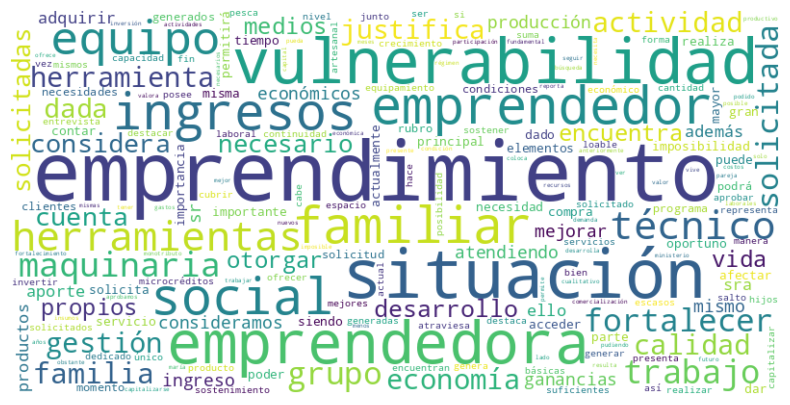

In [165]:
# Aplicar la tokenización y contar las palabras clave
df_entrevistados["tokens"] = df_entrevistados["Evaluación Final:"].apply(
    lambda x: contar_palabras(x)
)

# Generar una lista de todas las palabras de la columna "Evaluación Final"
palabras_evaluacion_final = [
    palabra for sublist in df_entrevistados["tokens"] for palabra in sublist
]

# Contar la frecuencia de las palabras
frecuencia_palabras = Counter(palabras_evaluacion_final)

# Evaluación Final: Paso 5 - Generar la nube de palabras
wordcloud = WordCloud(
    width=800, height=400, background_color="white"
).generate_from_frequencies(frecuencia_palabras)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Quitar los ejes
plt.show()

**INSIGHTS💡** para el equipo técnico:

* 🏠 Enfoque en la situación del emprendedor: Palabras como "vulnerabilidad", "situación", "familiar", y "social" indican que muchos de los casos evaluados hacen énfasis en la condición socioeconómica del emprendedor. Esto sugiere que el equipo técnico tiene en cuenta la situación de vulnerabilidad como un factor clave para aprobar o denegar los trámites.

* 🚀 Importancia del emprendimiento: La palabra "emprendimiento" aparece destacada, lo que refleja que el análisis gira en torno a la viabilidad o el impacto del negocio propuesto por el emprendedor. El equipo técnico parece dar peso a la calidad y sostenibilidad del emprendimiento para tomar decisiones.

* 🛠️ Herramientas y maquinaria solicitada: La palabra "herramientas" y "maquinaria" son muy frecuentes, lo que confirma que las solicitudes de equipos o herramientas juegan un papel central en la evaluación. El equipo técnico podría considerar la necesidad de estas herramientas como un factor determinante para la aprobación. Por otro lado sería conveniente estandarizar las herramientas y maquinarias para facilitar el análisis.

* 💰 Enfoque en los ingresos y economía familiar: Palabras como "ingresos", "economía", y "familiar" sugieren que el equipo técnico también valora cómo el emprendimiento puede impactar directamente en la mejora de los ingresos del emprendedor y su entorno familiar. Esto indica un enfoque en el potencial de mejorar la calidad de vida del solicitante.

* 📋 Justificación del equipo técnico: Palabras como "equipo técnico" y "gestión" sugieren que hay un esfuerzo considerable en justificar las decisiones que toman los técnicos. Es probable que el equipo esté utilizando un enfoque basado en criterios que justifiquen formalmente las decisiones, aunque estos sean variados y dependan de cada caso.

* 💪 Enfoque en el fortalecimiento: La palabra "fortalecer" aparece con frecuencia, lo que sugiere que muchos de los casos están orientados a mejorar o consolidar los negocios existentes, más que a arrancar nuevos proyectos. Esto puede reflejar una orientación del programa hacia el fortalecimiento de capacidades existentes.

**Recomendaciones:**
- Estándar en las evaluaciones: Los términos más recurrentes muestran que el equipo técnico tiene patrones de evaluación claros, pero sería útil que se desarrollaran guías más estandarizadas para poder comparar los casos con mayor objetividad, sin perder la riqueza del análisis cualitativo.

- Mayor precisión en las categorías: Palabras como "vulnerabilidad", "familiar" y "social" indican que se evalúan condiciones personales, por lo que quizás valdría la pena categorizar formalmente estos factores en los formularios para reducir la variabilidad en los textos.

- Enfoque en los resultados a largo plazo: Considerando la frecuencia de palabras como "herramientas" y "fortalecer", el equipo técnico puede desarrollar más indicadores que midan cómo estas decisiones realmente impactan el desarrollo de los emprendedores a largo plazo.

**Cantidad de clientes:** Esta columna contiene una mezcla de números, descripciones textuales y detalles sobre los tipos de clientes de los emprendedores, lo que hace su análisis complejo. Algunos registros incluyen datos numéricos como el número de clientes, mientras que otros detallan características de los clientes. Para analizarla, aplicaré técnicas de procesamiento de lenguaje natural (NLP) con el objetivo de extraer las palabras clave más comunes y categorizar la información en grupos útiles. Buscaré los términos más recurrentes para obtener 💡 insights valiosos para el equipo técnico. Sin embargo, debido a la variabilidad y detalle de las descripciones, no utilizaré esta columna directamente para el análisis estadístico principal.

Pasos:
1) Verifico que los valores no sean todos números en la columna. (Ya se que no hay nulos en el df_entrevistados)
2) Limpieza de texto: Eliminaré caracteres innecesarios, signos de puntuación, números y palabras comunes (stopwords) para enfocarme en información relevante.
3) Tokenización: Dividiré el texto en palabras clave para analizar su frecuencia.
4) Análisis de frecuencia: Identificaré las palabras o frases más comunes en las descripciones.
5) Agrupación en categorías: Organizaré los datos en categorías, según las palabras más frecuentes.

In [166]:
# Cantidad de clientes: Paso 1 - Verificar si todos los valores son números en la columna.
if df_entrevistados["Cantidad de clientes:"].apply(lambda x: str(x).isnumeric()).all():
    print("La columna contiene solo números. No se realiza análisis de texto.")
else:
    # Cantidad de clientes: Paso 2 - Limpieza del texto (Usa la misma función limpiar_texto y contar palabras)
    df_entrevistados["Cantidad de clientes:"] = df_entrevistados[
        "Cantidad de clientes:"
    ].apply(lambda x: limpiar_texto(str(x)))

    # Cantidad de clientes: Paso 3 - Tokenizaión (Usa misma función contar palabras)
    df_entrevistados["tokens"] = df_entrevistados["Cantidad de clientes:"].apply(
        lambda x: contar_palabras(x)
    )

    # Cantidad de clientes: Paso 4 - Análisis de frecuencia.
    todas_las_palabras = [
        palabra for sublist in df_entrevistados["tokens"] for palabra in sublist
    ]
    frecuencia_palabras = Counter(todas_las_palabras)

    # Ver las palabras más comunes
    print(frecuencia_palabras.most_common(150))

[('clientes', 1054), ('fijos', 484), ('cuenta', 277), ('emprendedora', 229), ('emprendedor', 207), ('eventuales', 197), ('alrededor', 156), ('posee', 151), ('productos', 139), ('particulares', 124), ('además', 119), ('ocasionalmente', 113), ('reconoce', 95), ('personas', 91), ('demandan', 90), ('cantidad', 76), ('emprendimiento', 76), ('variable', 75), ('aproximadamente', 74), ('aquellos', 73), ('manera', 65), ('diez', 64), ('estima', 62), ('cliente', 60), ('servicio', 58), ('producción', 57), ('sostiene', 54), ('contar', 52), ('clientela', 51), ('adquieren', 49), ('ocasionales', 47), ('tener', 47), ('solicitan', 47), ('número', 45), ('servicios', 45), ('ocasional', 45), ('acopiador', 45), ('ferias', 44), ('comercios', 43), ('semana', 42), ('localidad', 41), ('momento', 40), ('fija', 40), ('si', 38), ('mas', 37), ('venta', 36), ('compran', 36), ('producto', 35), ('dos', 34), ('quince', 34), ('vende', 34), ('locales', 33), ('eventualmente', 33), ('trabajo', 31), ('veinte', 30), ('mensua

**INSIGHTS💡** para el equipo técnico:

Con base en la frecuencia de las palabras clave extraídas de la columna "Cantidad de clientes", se sugiere modificar el formulario a futuro para que capture mejor la información relevante. Aquí están las observaciones y categorías recomendadas:

Observaciones para mejorar el formulario:

- 📊 **Cantidad de clientes**: Es evidente que el número de clientes es un aspecto fundamental. Términos como "fijos", "eventuales", "aproximadamente" junto con números específicos (como "quince", "veinte", "treinta", "cuarenta") indican que la cantidad de clientes es una variable clave. Sería útil que el formulario incluyera una pregunta directa sobre cuántos clientes tiene el emprendedor, con opciones predefinidas basadas en rangos numéricos.
   
- 🧑‍🤝‍🧑 **Tipo de clientes**: Muchos emprendedores mencionan diferentes tipos de clientes, como "fijos", "ocasionales", "particulares", y "comercios". Se sugiere agregar una pregunta que permita clasificar a los clientes según su tipo, lo que facilitaría el análisis de la naturaleza de la clientela (frecuente, esporádica, etc.).

- ⏰ **Frecuencia o regularidad**: La frecuencia de las transacciones es un factor mencionado repetidamente, con términos como "semanales", "mensuales", y "ocasionalmente". Una pregunta en el formulario podría capturar mejor esta información, preguntando con qué regularidad los clientes realizan compras.

- 🛒 **Modo de venta o distribución**: Palabras como "ferias", "locales", "comercialización", y "redes sociales" hacen referencia a los diferentes medios de distribución utilizados por los emprendedores. Agregar opciones específicas para indicar los canales de venta podría ayudar a entender mejor cómo operan los negocios.

Dado que la columna "Cantidad de clientes" contiene una mezcla de datos numéricos y textuales, se recomienda estandarizar las respuestas a futuro siguiendo las sugerencias anteriores para facilitar el análisis y la comparación entre los emprendedores. Además, la inclusión de categorías predefinidas en futuros formularios permitiría una recopilación de datos más estructurada y precisa. Para el presente análisis se eliminará la columna ya que su procesamiento es complejo y no aporta información relevante para los objetivos del proyecto.

In [167]:
# Eliminar la columna "Cantidad de clientes:"
df_entrevistados.drop(columns=["Cantidad de clientes:"], inplace=True)

**Detallar el nivel de producción semanal:** Esta columna presenta una mezcla de descripciones textuales con detalles sobre la capacidad de producción de los emprendedores, lo que la convierte en una variable clave a la hora de evaluar su viabilidad y capacidad para escalar sus operaciones. Algunas respuestas contienen números específicos de producción semanal, mientras que otras son descripciones más generales o cualitativas sobre la regularidad y el volumen de producción. Dado que la producción es un factor crítico para la aprobación de proyectos en este tipo de programas, aplicaré técnicas de procesamiento de lenguaje natural (NLP) para analizar y categorizar la información de manera estructurada. El objetivo es identificar patrones en la capacidad de producción que puedan 💡 proporcionar insights valiosos para el equipo técnico en el proceso de evaluación. En los casos donde no se pueda categorizar en un orden claro, se agrupará en una categoría de tipo **"variable"**.

### Pasos:
1) **Verificación inicial**: Comprobaré que los valores no sean todos numéricos, ya que algunos registros podrían describir la producción en texto libre.

2) **Limpieza de texto**: Se eliminarán caracteres innecesarios, signos de puntuación, números y palabras comunes (stopwords) para enfocarme en la información relevante.

3) **Tokenización**: Dividiré el texto en palabras clave, permitiendo analizar la frecuencia de los términos más utilizados.

4) **Análisis de frecuencia**: Identificaré las palabras o frases más comunes que describen la capacidad de producción de los emprendedores.

5) **Agrupación en categorías**: A partir de los resultados de la frecuencia, se organizarán los datos en categorías predefinidas, como **"alta producción"**, **"media producción"**, **"baja producción"**, y una categoría **"variable"** para los casos en los que las descripciones no se puedan clasificar en un rango específico. Luego crearé una columna nueva con estas categorías.

In [168]:
# Creo una función para ejecutar los pasos 1 al 4:


def analizar_frecuencia(nombre_columna, num_resultado):
    # Paso 1 - Verificar si todos los valores son números en la columna.
    if df_entrevistados[nombre_columna].apply(lambda x: str(x).isnumeric()).all():
        print("La columna contiene solo números. No se realiza análisis de texto.")
    else:
        # Paso 2 - Limpieza del texto
        df_entrevistados[nombre_columna] = df_entrevistados[nombre_columna].apply(
            lambda x: limpiar_texto(str(x))
        )

        # Paso 3 -  Tokenización
        df_entrevistados["tokens"] = df_entrevistados[nombre_columna].apply(
            lambda x: contar_palabras(x)
        )

        # Paso 4 - Análisis de frecuencia de las palabras clave
        todas_las_palabras = [
            palabra for sublist in df_entrevistados["tokens"] for palabra in sublist
        ]
        frecuencia_palabras = Counter(todas_las_palabras)

        # Ver las palabras más comunes
        print(frecuencia_palabras.most_common(num_resultado))

In [169]:
analizar_frecuencia("Detallar el nivel de producción semanal:", 100)

[('semana', 458), ('producción', 450), ('demanda', 247), ('emprendedora', 230), ('puede', 229), ('nivel', 220), ('kg', 216), ('variable', 205), ('emprendedor', 186), ('semanal', 185), ('semanalmente', 177), ('produce', 151), ('depende', 142), ('alrededor', 136), ('docenas', 119), ('producir', 116), ('realiza', 114), ('encuentra', 108), ('realizar', 106), ('día', 103), ('dos', 94), ('tortas', 94), ('trabajo', 92), ('cantidad', 79), ('trabajos', 78), ('según', 78), ('semanales', 77), ('harina', 75), ('cada', 72), ('pedidos', 71), ('tres', 71), ('aproximadamente', 68), ('servicios', 64), ('ejemplo', 61), ('productos', 60), ('época', 58), ('pizzas', 58), ('panes', 58), ('llegar', 58), ('registre', 55), ('unas', 54), ('dependiendo', 53), ('año', 51), ('empanadas', 49), ('días', 48), ('promedio', 48), ('cuenta', 47), ('condiciones', 46), ('cinco', 43), ('kilos', 43), ('tiempo', 42), ('cuatro', 41), ('varía', 40), ('alcanza', 40), ('complejidad', 40), ('clientes', 38), ('climáticas', 37), ('r

In [170]:
# Detallar el nivel de producción semanal: Paso 5 - Agrupación en categorías.

categorias_produccion = {
    "Muy Bajo": [
        "poco",
        "ocasional",
        "mínimo",
        "lento",
        "esporádico",
        "bajo",
        "pequeño",
        "menor",
        "insuficiente",
        "ocasionalmente",
        "ocasional",
        "eventuales",
        "aún",
        "menos",
        "requieren",
    ],
    "Bajo": [
        "semanal",
        "pequeña",
        "limitado",
        "ocasionales",
        "algunos días",
        "varias veces",
        "aproximadamente",
        "unos pocos",
        "semanales",
        "semana",
        "vez",
        "clientes",
        "fijos",
        "cuenta",
        "tres",
        "cinco",
        "quince",
    ],
    "Intermedio": [
        "moderado",
        "estable",
        "regular",
        "medio",
        "constante",
        "semana",
        "semanales",
        "aproximado",
        "cuatro",
        "veinte",
        "realiza",
        "trabajo",
        "producción",
        "cantidad",
        "clientes",
        "producción",
        "días",
        "productos",
        "servicios",
        "promedio",
    ],
    "Alto": [
        "producción",
        "diaria",
        "fuerte",
        "mucho",
        "importante",
        "gran",
        "sustancial",
        "grandes cantidades",
        "clientes",
        "treinta",
        "cincuenta",
        "ventas",
        "ventas",
        "demanda",
        "alta",
        "semanales",
        "clientes",
        "mayor",
        "servicios",
        "grandes",
    ],
    "Muy Alto": [
        "diariamente",
        "constante",
        "enorme",
        "masivo",
        "siempre",
        "muchísimo",
        "altísimo",
        "alta producción",
        "constantemente",
        "grandes volúmenes",
        "todos",
        "altas demandas",
        "cuarenta",
        "mucho",
        "clientes",
        "servicios",
        "producción",
    ],
    "Variable": [
        "variable",
        "depende",
        "según",
        "temporada",
        "época",
        "clima",
        "demandas",
        "condiciones",
        "varía",
        "cambia",
        "complejidad",
        "circunstancias",
        "tiempo",
        "según",
        "puede",
        "función",
        "pedido",
        "eventual",
        "demanda",
        "ventas",
        "época",
    ],
    "Indefinido": [
        "no especifica",
        "no se sabe",
        "sin datos",
        "indefinido",
        "incapaz",
        "desconocido",
        "no aplica",
        "no define",
        "sin",
        "no hay información",
        "desconocida",
    ],
}

In [171]:
# Función para categorizar ingresando textos de cada celda y las categorías posibles
def categorizar(texto, categorias):
    # Convertimos el texto a minúsculas para un análisis consistente
    texto = texto.lower()

    # Diccionario para contar las palabras asociadas a cada categoría
    contador_categorias = {categoria: 0 for categoria in categorias.keys()}

    # Contar las palabras clave asociadas a cada categoría
    for categoria, palabras_clave in categorias.items():
        for palabra in palabras_clave:
            if palabra in texto:
                contador_categorias[categoria] += 1

    # Encontrar la categoría con más palabras clave asociadas
    categoria_asignada = max(contador_categorias, key=contador_categorias.get)

    # Si hay empate, asignar "Variable"
    max_count = max(contador_categorias.values())
    categorias_maximas = [
        cat for cat, count in contador_categorias.items() if count == max_count
    ]

    if len(categorias_maximas) > 1:
        return "Variable"
    elif max_count == 0:  # Si no hay coincidencias
        return "Indefinido"
    else:
        return categoria_asignada

In [172]:
# Paso 5 - Aplicar la categorización a la columna "Detallar el nivel de producción semanal"
df_entrevistados["Producción semanal"] = df_entrevistados[
    "Detallar el nivel de producción semanal:"
].apply(lambda x: categorizar(x, categorias_produccion))

# Ver las primeras filas con las categorías asignadas
print(
    df_entrevistados[
        ["Detallar el nivel de producción semanal:", "Producción semanal"]
    ].head(5)
)

            Detallar el nivel de producción semanal: Producción semanal
0                                    a  kg de harina           Variable
1  alrededor de diez trabajos por semana dependie...         Intermedio
2  realiza trabajo en serie y por semana logra pr...         Intermedio
3      por cada día de trabajo utiliza  kg de harina           Variable
4  por día amasa ks de masa con ella realiza siet...         Intermedio


In [173]:
# Eliminar la columna "Detallar el nivel de producción semanal:"
df_entrevistados = df_entrevistados.drop(
    columns=["Detallar el nivel de producción semanal:"]
)

df_entrevistados.head(2)

Marcar entrevista como: Fecha de la entrevista-Final: Equipo Técnico:    Localidad: Departamento: Fecha de Nacimiento-Final:      Sexo: Estado Civil: Nivel de Estudio Actual: Situación Laboral PRINCIPAL: Situación Habitacional: Tipo de vivienda:     Situación ante el IVA:  Ingreso MENSUAL de su Economía Familiar:                    Descripción del Emprendimiento:  Antigüedad del Emprendimiento (Años):  Antigüedad del Emprendimiento (Meses):  Tiempo que dedica al emprendimiento (Días a la semana):  Tiempo que dedica al emprendimiento (Horas por día): Realizó algún tipo de capacitación previa para su emprendimiento: En caso de haber recibido algún tipo de capacitación, marque cuales: Cómo realiza sus ventas? / Cómo ofrece sus servicios?: Utiliza tarjeta de crédito para realizar sus ventas?:  Ganancia Mensual-Final: El emprendimiento se desarrolla en un ámbito: Donde realiza su producción? / Donde ofrece su servicio?: Condiciones del espacio físico donde desarrolla el emprendimiento:              Observaciones del espacio productivo: Qué habilitaciones posee su espacio productivo?:      Servicio Eléctrico: Servicio de Gas: Participó en alguno de los siguientes programas del Min. de Desarrollo Social de E.R.?: En qué invirtió o para qué utilizó el fortalecimiento adquirido?: Posee otras fuentes de financiamiento que haya destinado a su emprendimiento?:                    Equipamiento con el que cuenta: Herramientas o equipamiento que solicita: Aporte que obtendría en su emprendimiento a partir de la incorporación de la/las herramienta/as solicitada/as: Devolución con respecto a la gestión de la herramienta o equipamiento:                                  Evaluación Final: Herramienta/as aprobada/as por Equipo Técnico:               Rubro:   Sub-Rubro-Final:        Actividad-Final:                                             tokens Producción semanal
0  La entrevista se realizó correctamente.           2016-03-17 00:00:00          Gisela  Gualeguaychú  Gualeguaychú        1971-02-09 00:00:00   Femenino      Casada/o      Secundario Completo                 Autoempleado      Vivienda Alquilada            TIPO B         Monotributo Social                                    6000.0  Pre pizzas, pasta frolas, cremonas, pan sabori...                                   12.0                                     1.0                                                5.0                                                      4.0                                                    SI                                         Capacitación en el Oficio                    Tiene un puesto fijo en una Feria., Coordina l...                                                     NO                         NaN                                        Urbano  En su casa. (No posee un espacio destinado al ...                                                  Regular.                  Muy chico. 3 x 5 m. Techo cieloraso, piso cera...                                          Ninguna  Instalación Monofásica.    Gas Envasado.  Programa de Microcréditos para el Desarrollo d...                                                            Insumos- Elementos de Cocina                                                                No                              Horno 6 moldes pizzero, Heladera familiar, bat...             Amasadora y sobadora de mesa   Para agregar otros productos con hojaldre y ag...                                                                                                       Aprobado                      se considera necesario otorgar la maquinaria s...                           Amasadora y Sobadora           Producción       Panificación              Pastelería                                       [kg, harina]           Variable
1  La entrevista se realizó correctamente.           2016-03-18 00:00:00         Rodrigo      Victoria      Victoria        1971-02-10 00:00:00  Masculino      Casada/o    Secundario Incompleto                     Empleado   

Resultado:

- **Categorías y palabras clave**: Se definieron palabras clave específicas asociadas a cada categoría, muchas de las cuales provienen de la lista de términos más frecuentes en la columna analizada.

- **Proceso de asignación**: El código cuenta cuántas palabras de cada categoría aparecen en el texto, y la categoría con más coincidencias es la que se asigna.

- **Variable en caso de empate**: Si el texto contiene palabras que coinciden con múltiples categorías, se asigna la categoría "Variable" para reflejar la naturaleza ambigua o cambiante de la producción.

- **Indefinido**: Si no se encuentra ninguna palabra relevante en el texto, se asigna la categoría "Indefinido".

**INSIGHT💡:** De esta forma, la columna "Detallar el nivel de producción semanal" se ha categorizado en un máximo de 7 categorías útiles para el análisis posterior, proporcionando una estructura más clara para la interpretación de los datos. A futuro se recomienda utilzar estas categorías para simplificar el análisis de cada solicitud.

**Donde compra la materia prima?:** Esta columna proporciona información sobre los lugares y métodos de adquisición de materia prima por parte de los emprendedores, lo que resulta fundamental para evaluar la sostenibilidad y las fuentes de abastecimiento de los proyectos. Las respuestas varían desde descripciones específicas de proveedores o comercios locales hasta métodos más generales, como ferias o mercados. Dado que la procedencia de la materia prima puede ser un factor clave para la viabilidad de los proyectos, aplicaré técnicas de procesamiento de lenguaje natural (NLP) para analizar y categorizar la información de manera estructurada. El objetivo es identificar patrones en los canales de compra que puedan 💡 proporcionar insights valiosos para el equipo técnico en el proceso de evaluación.

### Pasos:
1) **Verificación inicial**: Comprobaré que los valores no sean todos numéricos, ya que algunos registros podrían contener nombres de lugares o descripciones textuales.

2) **Limpieza de texto**: Se eliminarán caracteres innecesarios, signos de puntuación, números y palabras comunes (stopwords) para enfocarme en la información relevante.

3) **Tokenización**: Dividiré el texto en palabras clave, permitiendo analizar la frecuencia de los términos más utilizados.

4) **Análisis de frecuencia**: Identificaré las palabras o frases más comunes que describen los lugares y métodos de adquisición de la materia prima.

5) **Agrupación en categorías**: A partir de los resultados de la frecuencia, se organizarán los datos en categorías predefinidas.

**Observaciones del espacio productivo:** Esta columna ofrece información detallada sobre las condiciones del espacio físico donde los emprendedores desarrollan sus actividades productivas. Las respuestas varían entre descripciones específicas sobre las dimensiones, materiales de construcción, y estado de los espacios, hasta observaciones sobre el nivel de adecuación de estos entornos para las necesidades productivas. Dado que el espacio productivo influye directamente en la capacidad operativa y sostenibilidad de los emprendimientos, aplicaré técnicas de procesamiento de lenguaje natural (NLP) para analizar y categorizar esta información de manera estructurada. El objetivo es identificar patrones en las características del espacio que puedan 💡 proporcionar insights valiosos para el equipo técnico en el proceso de evaluación, y ayudar a determinar si el espacio cumple con las condiciones necesarias para el éxito del proyecto.

Pasos:
1) **Verificación inicial**: Comprobaré que los valores no sean exclusivamente numéricos, ya que algunos registros podrían contener descripciones textuales sobre el espacio.

2) **Limpieza de texto**: Se eliminarán caracteres innecesarios, signos de puntuación, números y palabras comunes (stopwords) para enfocar el análisis en la información relevante.

3) **Tokenización**: Dividiré el texto en palabras clave, permitiendo analizar la frecuencia de los términos más utilizados.

4) **Análisis de frecuencia**: Identificaré las palabras o frases más comunes que describen el estado del espacio productivo y las condiciones del entorno en el que se desempeña el emprendedor.

5) **Agrupación en categorías**: A partir de los resultados de la frecuencia, se organizarán los datos en categorías predefinidas, como **"óptimo"**, **"deficiente"**, **"regular"**, o **"trabaja a domicilio"**, además de una categoría **"variable"** para los casos donde las descripciones no se puedan clasificar en un rango específico.


In [174]:
# Pasos 1-4:
analizar_frecuencia("Observaciones del espacio productivo:", 100)

[('espacio', 948), ('producción', 359), ('metros', 314), ('emprendedora', 291), ('condiciones', 273), ('cocina', 273), ('piso', 254), ('vivienda', 250), ('emprendedor', 249), ('casa', 249), ('x', 234), ('familiar', 232), ('paredes', 230), ('cuenta', 227), ('encuentra', 204), ('techo', 189), ('emprendimiento', 170), ('trabaja', 170), ('productivo', 161), ('posee', 140), ('realiza', 134), ('trabajo', 131), ('mismo', 130), ('m', 116), ('revocadas', 114), ('domicilio', 102), ('comedor', 102), ('dimensiones', 101), ('cemento', 96), ('pudo', 96), ('utiliza', 95), ('produce', 93), ('buenas', 84), ('lugar', 84), ('chapa', 82), ('cerámicos', 81), ('habitación', 80), ('verificar', 79), ('pintadas', 77), ('producir', 74), ('actividad', 72), ('herramientas', 71), ('local', 69), ('desarrolla', 63), ('bien', 61), ('cuadrados', 61), ('mts', 61), ('allí', 59), ('encuentran', 58), ('instalaciones', 55), ('cielo', 54), ('pequeño', 53), ('galpón', 53), ('parte', 52), ('si', 52), ('momento', 49), ('produc

In [175]:
# Paso 5 - Defino las categorías para el espacio productivo
categorias_espacio = {
    "No Observado": [
        "no se pudo",
        "no especifica",
        "no se sabe",
        "sin datos",
        "verificar",
        "incapaz",
        "no define",
    ],
    "Trabajo a Domicilio": [
        "domicilio",
        "vivienda",
        "casa del cliente",
        "cliente",
        "viaja",
    ],
    "Deficiente": [
        "precarias",
        "inseguras",
        "malas",
        "deteriorado",
        "inadecuado",
        "pequeño",
        "incompleto",
        "cemento",
        "techo",
        "chapa",
        "tierra",
        "sin",
    ],
    "Regular": [
        "regular",
        "moderado",
        "adecuado",
        "estable",
        "despintado",
        "despintadas",
    ],
    "Óptimo": [
        "óptimo",
        "bueno",
        "buenas condiciones",
        "perfecto",
        "excelente",
        "cerámicos",
        "bien",
        "pintadas",
        "buenas",
    ],
    "Producción Elevada": [
        "alta producción",
        "alto",
        "alto nivel",
        "grandes cantidades",
        "taller",
        "producir",
        "productos",
    ],
    "Producción Baja": [
        "bajo",
        "poco",
        "lento",
        "insuficiente",
        "trabajo limitado",
        "produce poco",
        "pequeño",
    ],
    "Indefinido": [
        "indefinido",
        "sin",
        "desconocido",
        "no aplica",
        "no especifica",
        "sin datos",
        "incapaz",
    ],
}

**INSIGHT 💡:** Las categorías: No observado, Trabaja a domicilio, Deficiente, Regular, Indefinido, Producción elevada y Producción baja podrían ser utilizadas en formularios futuros como otra manera de puntuar el emprendimiento.

In [176]:
# Aplicar la categorización a la columna "Observaciones del espacio productivo:"
df_entrevistados["Espacio productivo"] = df_entrevistados[
    "Observaciones del espacio productivo:"
].apply(lambda x: categorizar(x, categorias_espacio))

# Ver las primeras filas con las categorías asignadas
print(
    df_entrevistados[
        ["Observaciones del espacio productivo:", "Espacio productivo"]
    ].head(10)
)

               Observaciones del espacio productivo:   Espacio productivo
0      muy chico  x  m techo cieloraso piso ceramica           Deficiente
1  el emprendedor practica su emprendimiento en e...  Trabajo a Domicilio
2  es el living de la vivienda en buenas condicio...               Óptimo
3  el espacio físico es de unos  x  metros parede...           Deficiente
4  para desempeñarse posee una habitación que gen...               Óptimo
5  posee un espacio de dimensiones considerables ...           Deficiente
6  habitación de  x  metros con salida amplia e i...             Variable
7  en función del nivel de producción y tareas qu...             Variable
8  de dimensiones amplias azulejado y piso de porlan             Variable
9  el espacio de producción es en la parte delant...  Trabajo a Domicilio


In [177]:
# Eliminar la columna "Observaciones del espacio productivo:" ya que no se necesita y no aporta valor
df_entrevistados = df_entrevistados.drop(
    columns=["Observaciones del espacio productivo:"]
)

df_entrevistados.head(2)

Marcar entrevista como: Fecha de la entrevista-Final: Equipo Técnico:    Localidad: Departamento: Fecha de Nacimiento-Final:      Sexo: Estado Civil: Nivel de Estudio Actual: Situación Laboral PRINCIPAL: Situación Habitacional: Tipo de vivienda:     Situación ante el IVA:  Ingreso MENSUAL de su Economía Familiar:                    Descripción del Emprendimiento:  Antigüedad del Emprendimiento (Años):  Antigüedad del Emprendimiento (Meses):  Tiempo que dedica al emprendimiento (Días a la semana):  Tiempo que dedica al emprendimiento (Horas por día): Realizó algún tipo de capacitación previa para su emprendimiento: En caso de haber recibido algún tipo de capacitación, marque cuales: Cómo realiza sus ventas? / Cómo ofrece sus servicios?: Utiliza tarjeta de crédito para realizar sus ventas?:  Ganancia Mensual-Final: El emprendimiento se desarrolla en un ámbito: Donde realiza su producción? / Donde ofrece su servicio?: Condiciones del espacio físico donde desarrolla el emprendimiento: Qué habilitaciones posee su espacio productivo?:      Servicio Eléctrico: Servicio de Gas: Participó en alguno de los siguientes programas del Min. de Desarrollo Social de E.R.?: En qué invirtió o para qué utilizó el fortalecimiento adquirido?: Posee otras fuentes de financiamiento que haya destinado a su emprendimiento?:                    Equipamiento con el que cuenta: Herramientas o equipamiento que solicita: Aporte que obtendría en su emprendimiento a partir de la incorporación de la/las herramienta/as solicitada/as: Devolución con respecto a la gestión de la herramienta o equipamiento:                                  Evaluación Final: Herramienta/as aprobada/as por Equipo Técnico:               Rubro:   Sub-Rubro-Final:        Actividad-Final:                                             tokens Producción semanal   Espacio productivo
0  La entrevista se realizó correctamente.           2016-03-17 00:00:00          Gisela  Gualeguaychú  Gualeguaychú        1971-02-09 00:00:00   Femenino      Casada/o      Secundario Completo                 Autoempleado      Vivienda Alquilada            TIPO B         Monotributo Social                                    6000.0  Pre pizzas, pasta frolas, cremonas, pan sabori...                                   12.0                                     1.0                                                5.0                                                      4.0                                                    SI                                         Capacitación en el Oficio                    Tiene un puesto fijo en una Feria., Coordina l...                                                     NO                         NaN                                        Urbano  En su casa. (No posee un espacio destinado al ...                                                  Regular.                                                          Ninguna  Instalación Monofásica.    Gas Envasado.  Programa de Microcréditos para el Desarrollo d...                                                            Insumos- Elementos de Cocina                                                                No                              Horno 6 moldes pizzero, Heladera familiar, bat...             Amasadora y sobadora de mesa   Para agregar otros productos con hojaldre y ag...                                                                                                       Aprobado                      se considera necesario otorgar la maquinaria s...                           Amasadora y Sobadora           Producción       Panificación              Pastelería    [chico, x, m, techo, cieloraso, piso, ceramica]           Variable           Deficiente
1  La entrevista se realizó correctamente.           2016-03-18 00:00:00         Rodrigo      Victoria      Victoria        1971-02-10 00:00:00  Masculino      Casada/o    Secundario Incompleto                     Empleado         Vivienda Propia            Tipo A  No se encuentra ins

**En qué invirtió o para qué utilizó el fortalecimiento adquirido?:** Esta columna describe cómo los emprendedores han invertido el financiamiento o fortalecimiento recibido, ya sea en insumos, herramientas, equipamiento, o mejoras en su espacio productivo. Algunas respuestas proporcionan detalles específicos sobre los productos comprados, mientras que otras se limitan a descripciones generales. Dado que el destino del fortalecimiento financiero es clave para evaluar la sustentabilidad y capacidad de los proyectos, aplicaré técnicas de procesamiento de lenguaje natural (NLP) para analizar y categorizar la información de manera estructurada. El objetivo es identificar patrones en las inversiones realizadas por los emprendedores que puedan 💡 proporcionar insights valiosos para el equipo técnico durante el proceso de evaluación.

Pasos:

1) **Verificación inicial**: Comprobaré que los valores no sean exclusivamente numéricos, ya que algunos registros pueden contener descripciones textuales sobre la inversión realizada.

2) **Limpieza de texto**: Se eliminarán caracteres innecesarios, signos de puntuación, números y palabras comunes (stopwords) para centrar el análisis en la información relevante.

3) **Tokenización**: Dividiré el texto en palabras clave, permitiendo analizar la frecuencia de los términos más utilizados.

4) **Análisis de frecuencia**: Identificaré las palabras o frases más comunes que describen los tipos de inversión realizados por los emprendedores.

5) **Agrupación en categorías**: A partir de los resultados de la frecuencia, se organizarán los datos en categorías predefinidas, como **"insumos"**, **"herramientas"**, **"equipamiento"**, y una categoría **"no ha recibido fortalecimiento"** para aquellos casos en los que no se ha otorgado financiamiento.

In [178]:
# Pasos 1-4:
analizar_frecuencia(
    "En qué invirtió o para qué utilizó el fortalecimiento adquirido?:", 100
)

[('fortalecimiento', 941), ('recibido', 935), ('momento', 902), ('insumos', 179), ('compra', 120), ('emprendedora', 88), ('crédito', 64), ('programa', 63), ('utilizó', 53), ('microcrédito', 48), ('emprendimiento', 35), ('adquirido', 35), ('microcréditos', 34), ('materia', 34), ('prima', 34), ('recibió', 33), ('créditos', 32), ('herramientas', 31), ('emprendedor', 30), ('crecer', 28), ('utilizado', 27), ('dinero', 25), ('invirtió', 24), ('invertido', 24), ('actividad', 24), ('horno', 23), ('social', 21), ('comprar', 20), ('adquirió', 19), ('encuentra', 19), ('comprado', 17), ('pudo', 17), ('productos', 16), ('economía', 16), ('beneficio', 16), ('cocina', 15), ('acordes', 15), ('compró', 14), ('destinado', 14), ('máquina', 13), ('coser', 13), ('producción', 13), ('primer', 13), ('espera', 13), ('participación', 13), ('familiar', 12), ('emprendedores', 12), ('crediticio', 12), ('mano', 11), ('principalmente', 11), ('dos', 11), ('cuales', 11), ('adquirir', 11), ('espacio', 11), ('actualmen

In [179]:
# Definir las categorías basadas en las palabras más frecuentes de la columna
categorias_fortalecimiento = {
    "Insumos": [
        "insumos",
        "materia prima",
        "productos",
        "telas",
        "hilos",
        "materiales",
        "comprar",
        "compró",
        "comprado",
    ],
    "Herramientas": [
        "herramientas",
        "maquinaria",
        "máquina",
        "batidora",
        "freezer",
        "hornos",
        "coser",
        "corte",
        "moldes",
        "balanza",
        "secador",
        "sobadora",
        "industrial",
        "impresora",
    ],
    "Equipamiento": [
        "equipamiento",
        "cocina",
        "heladera",
        "horno",
        "mesa",
        "almacenamiento",
        "elementos",
        "freezer",
        "latas",
        "ploter",
        "almacenado",
    ],
    "Mejoras del Espacio Productivo": [
        "mejorar",
        "espacio",
        "infraestructura",
        "riego",
        "construcción",
        "instalación",
        "invernáculo",
        "bomba",
        "acondicionar",
        "instalaciones",
    ],
    "No ha recibido fortalecimiento": [
        "no ha recibido",
        "sin fortalecimiento",
        "no fue",
        "no ha sido",
        "no aplica",
        "no participó",
        "ningún programa",
    ],
    "Variable": [
        "depende",
        "según",
        "varía",
        "posible",
        "proporcional",
        "condiciones",
        "circunstancias",
    ],
}

In [180]:
# Aplicar la categorización a la columna "En qué invirtió o para qué utilizó el fortalecimiento adquirido?:"
df_entrevistados["Inversion fortalecimiento"] = df_entrevistados[
    "En qué invirtió o para qué utilizó el fortalecimiento adquirido?:"
].apply(lambda x: categorizar(x, categorias_fortalecimiento))

# Ver las primeras filas con las categorías asignadas
print(
    df_entrevistados[
        [
            "En qué invirtió o para qué utilizó el fortalecimiento adquirido?:",
            "Inversion fortalecimiento",
        ]
    ].head(10)
)

  En qué invirtió o para qué utilizó el fortalecimiento adquirido?:       Inversion fortalecimiento
0                        insumos elementos de cocina                                   Equipamiento
1  utilizó el financiamiento para la compra de he...                                   Herramientas
2                             herramientas e insumos                                       Variable
3               insumos y materiales de construcción                                        Insumos
4  los créditos fueron utilizados principalmente ...                                       Variable
5                                              telas                                        Insumos
6  compra de heladera horno fabripasta freezer e ...                                   Equipamiento
7  la emprendedora tomo un crédito el cual destin...                                   Herramientas
8           no ha sido foratalecido hasta el momento                 No ha recibido fortalecimiento


In [181]:
# Eliminar la columna "En qué invirtió o para qué utilizó el fortalecimiento adquirido?:" ya que no se necesita y no aporta valor
df_entrevistados = df_entrevistados.drop(
    columns=["En qué invirtió o para qué utilizó el fortalecimiento adquirido?:"]
)

df_entrevistados.head(2)

Marcar entrevista como: Fecha de la entrevista-Final: Equipo Técnico:    Localidad: Departamento: Fecha de Nacimiento-Final:      Sexo: Estado Civil: Nivel de Estudio Actual: Situación Laboral PRINCIPAL: Situación Habitacional: Tipo de vivienda:     Situación ante el IVA:  Ingreso MENSUAL de su Economía Familiar:                    Descripción del Emprendimiento:  Antigüedad del Emprendimiento (Años):  Antigüedad del Emprendimiento (Meses):  Tiempo que dedica al emprendimiento (Días a la semana):  Tiempo que dedica al emprendimiento (Horas por día): Realizó algún tipo de capacitación previa para su emprendimiento: En caso de haber recibido algún tipo de capacitación, marque cuales: Cómo realiza sus ventas? / Cómo ofrece sus servicios?: Utiliza tarjeta de crédito para realizar sus ventas?:  Ganancia Mensual-Final: El emprendimiento se desarrolla en un ámbito: Donde realiza su producción? / Donde ofrece su servicio?: Condiciones del espacio físico donde desarrolla el emprendimiento: Qué habilitaciones posee su espacio productivo?:      Servicio Eléctrico: Servicio de Gas: Participó en alguno de los siguientes programas del Min. de Desarrollo Social de E.R.?: Posee otras fuentes de financiamiento que haya destinado a su emprendimiento?:                    Equipamiento con el que cuenta: Herramientas o equipamiento que solicita: Aporte que obtendría en su emprendimiento a partir de la incorporación de la/las herramienta/as solicitada/as: Devolución con respecto a la gestión de la herramienta o equipamiento:                                  Evaluación Final: Herramienta/as aprobada/as por Equipo Técnico:               Rubro:   Sub-Rubro-Final:        Actividad-Final:                                             tokens Producción semanal   Espacio productivo Inversion fortalecimiento
0  La entrevista se realizó correctamente.           2016-03-17 00:00:00          Gisela  Gualeguaychú  Gualeguaychú        1971-02-09 00:00:00   Femenino      Casada/o      Secundario Completo                 Autoempleado      Vivienda Alquilada            TIPO B         Monotributo Social                                    6000.0  Pre pizzas, pasta frolas, cremonas, pan sabori...                                   12.0                                     1.0                                                5.0                                                      4.0                                                    SI                                         Capacitación en el Oficio                    Tiene un puesto fijo en una Feria., Coordina l...                                                     NO                         NaN                                        Urbano  En su casa. (No posee un espacio destinado al ...                                                  Regular.                                                          Ninguna  Instalación Monofásica.    Gas Envasado.  Programa de Microcréditos para el Desarrollo d...                                                                                      No                              Horno 6 moldes pizzero, Heladera familiar, bat...             Amasadora y sobadora de mesa   Para agregar otros productos con hojaldre y ag...                                                                                                       Aprobado                      se considera necesario otorgar la maquinaria s...                           Amasadora y Sobadora           Producción       Panificación              Pastelería                       [insumos, elementos, cocina]           Variable           Deficiente              Equipamiento
1  La entrevista se realizó correctamente.           2016-03-18 00:00:00         Rodrigo      Victoria      Victoria        1971-02-10 00:00:00  Masculino      Casada/o    Secundario Incompleto                     Empleado         Vivienda Propia            Tipo A  No se encuentra inscripto                                    8000.0  Claudio lleva adelante un empr

**Posee otras fuentes de financiamiento que haya destinado a su emprendimiento?:** Esta columna proporciona información sobre si los emprendedores han accedido a otras fuentes de financiamiento aparte del apoyo brindado por el programa. Las respuestas varían desde afirmaciones de no haber recibido otras ayudas, hasta menciones de créditos adicionales o préstamos familiares. Como la diversificación de financiamiento es un factor clave para la sostenibilidad de los proyectos, aplicaré técnicas de procesamiento de lenguaje natural (NLP) para identificar patrones en las fuentes de financiamiento y mostrar una nube de palabras. El objetivo es generar 💡 insights valiosos para el equipo técnico, que podrían ayudar en futuras evaluaciones de emprendedores.

Pasos:
1) **Verificación inicial**: Comprobaré que los valores no sean exclusivamente numéricos, ya que algunos registros pueden contener descripciones textuales.
2) **Limpieza del texto**: Se eliminarán caracteres innecesarios, signos de puntuación, números y palabras comunes (stopwords) para centrar el análisis en la información relevante.
3) **Tokenización**: Dividiré el texto en palabras clave, permitiendo analizar la frecuencia de los términos más utilizados.
4) **Análisis de frecuencia**: Identificaré las palabras o frases más comunes que describen las fuentes de financiamiento mencionadas por los emprendedores.
5) **Generación de una nube de palabras**: Visualizaré las palabras más comunes para obtener insights que puedan ayudar en la evaluación.

La columna contiene texto o una mezcla de texto y números. Proceder con el análisis.


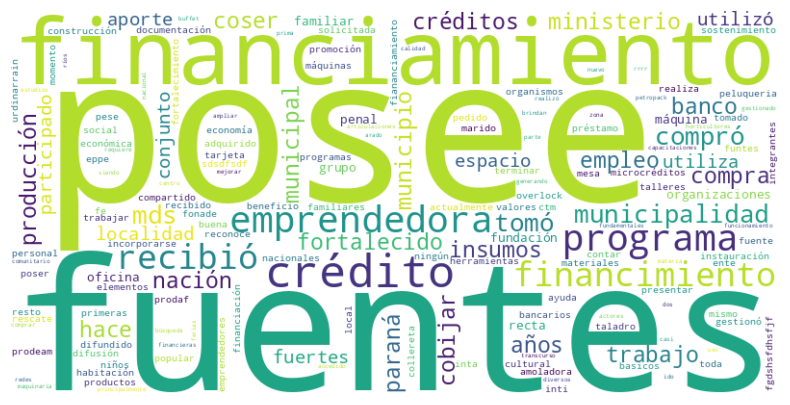

In [182]:
# Paso 1: Verificar si todos los valores son números en la columna
if (
    df_entrevistados[
        "Posee otras fuentes de financiamiento que haya destinado a su emprendimiento?:"
    ]
    .apply(lambda x: str(x).isnumeric())
    .all()
):
    print(
        "La columna contiene solo números. No es necesario realizar el análisis de texto."
    )
else:
    print(
        "La columna contiene texto o una mezcla de texto y números. Proceder con el análisis."
    )


# Paso 2: Limpieza del texto
def limpiar_texto(texto):
    texto = re.sub(r"\d+", "", texto)  # Eliminar números
    texto = re.sub(r"[^\w\s]", "", texto)  # Eliminar signos de puntuación
    texto = texto.lower()  # Convertir a minúsculas
    return texto


# Aplicar la limpieza de texto a la columna "Posee otras fuentes de financiamiento que haya destinado a su emprendimiento?"
df_entrevistados[
    "Posee otras fuentes de financiamiento que haya destinado a su emprendimiento?:"
] = df_entrevistados[
    "Posee otras fuentes de financiamiento que haya destinado a su emprendimiento?:"
].apply(
    lambda x: limpiar_texto(str(x))
)

# Paso 3 y 4: Tokenización y eliminación de stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Definir las stopwords en español
stop_words = set(stopwords.words("spanish"))


# Función para tokenizar y eliminar stopwords
def contar_palabras(texto):
    palabras = word_tokenize(texto)  # Tokenizar
    palabras_filtradas = [
        word for word in palabras if word not in stop_words
    ]  # Filtrar stopwords
    return palabras_filtradas


# Aplicar la tokenización y contar las palabras clave
df_entrevistados["tokens"] = df_entrevistados[
    "Posee otras fuentes de financiamiento que haya destinado a su emprendimiento?:"
].apply(lambda x: contar_palabras(x))

# Generar una lista de todas las palabras
palabras_financiamiento = [
    palabra for sublist in df_entrevistados["tokens"] for palabra in sublist
]

# Contar la frecuencia de las palabras
from collections import Counter

frecuencia_palabras = Counter(palabras_financiamiento)

# Paso 5: Generar la nube de palabras
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(
    width=800, height=400, background_color="white"
).generate_from_frequencies(frecuencia_palabras)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Quitar los ejes
plt.show()

**INSIGHTS💡** para el equipo técnico:

- **💰 Dependencia de otras fuentes de financiamiento**: Palabras como "préstamo", "crédito", y "prestamo familiar" sugieren que muchos emprendedores recurren a fuentes de financiamiento adicionales. Esto refleja que los emprendedores no dependen únicamente del programa gubernamental, lo que puede ser un indicador positivo de su capacidad para buscar y gestionar fondos.

- **❌ No acceso a financiamiento adicional**: Expresiones como "no ha recibido" y "sin financiamiento" son frecuentes, lo que indica que una parte significativa de los emprendedores no ha tenido acceso a otras fuentes de financiamiento aparte del programa.

- **👪 Financiación familiar o personal**: Menciones de "familia" y "ahorros" reflejan que algunos emprendedores dependen de apoyo familiar o recursos personales para complementar el financiamiento. Esto es relevante porque puede indicar una menor dependencia de instituciones financieras.

- **📊 Proporción de acceso**: La palabra "crédito" aparece repetidamente, lo que sugiere que hay una porción considerable de emprendedores que han recibido financiamiento adicional a través de programas de crédito o microcréditos. Esto puede ser un indicador de la bancarización y acceso a servicios financieros.

**Recomendaciones:**
- **Acceso a nuevas oportunidades de financiamiento**: Considerando la cantidad de emprendedores que no han tenido acceso a otras fuentes de financiamiento, sería útil fortalecer los vínculos con programas de microcrédito o instituciones financieras que puedan ofrecer condiciones más accesibles.
  
- **Diversificación de fuentes de financiamiento**: Fomentar que los emprendedores exploren más opciones de financiamiento podría ser clave para su sostenibilidad. Las palabras más recurrentes sugieren que hay margen para apoyar a los emprendedores a obtener capital de diversas fuentes.

- **Optimización del programa**: El equipo técnico podría orientar los esfuerzos a ayudar a los emprendedores que no han accedido a otras fuentes de financiamiento, permitiendo que más personas puedan fortalecer sus emprendimientos con acceso a recursos.

In [183]:
# Luego del analisis de columnas con posibilidad de categorizar, se procede a eliminar las columnas que no aportan valor a mi objetivo.
df_entrevistados = df_entrevistados.drop(
    columns=[
        "Posee otras fuentes de financiamiento que haya destinado a su emprendimiento?:",
        "Evaluación Final:",
        "tokens",
    ]
)

df_entrevistados.shape

(1250, 42)

### 🛠️ Procesamiento de campos de selección múltiple:

Estas columnas contienen datos provenientes de respuestas de tipo selección múltiple, donde los emprendedores tuvieron la opción de elegir entre varias categorías predefinidas, pero también la posibilidad de seleccionar "Otro" y describir de manera libre su respuesta. Esto genera una combinación de valores categóricos y entradas personalizadas. El objetivo será estandarizar estas respuestas utilizando funciones que permitan procesar las opciones predefinidas y agrupar las respuestas personalizadas en nuevas categorías útiles. Este paso facilitará el análisis y comparación de las respuestas, proporcionando una visión más clara del comportamiento y necesidades de los emprendedores.

In [184]:
# Columnas a estandarizar:
columnas_a_estandarizar = [
    "En caso de haber recibido algún tipo de capacitación, marque cuales:",
    "Antigüedad del Emprendimiento (Años):",
    "Antigüedad del Emprendimiento (Meses):",
    "Tiempo que dedica al emprendimiento (Días a la semana):",
    "Tiempo que dedica al emprendimiento (Horas por día):",
    "Cómo realiza sus ventas? / Cómo ofrece sus servicios?:",
    "Donde realiza su producción? / Donde ofrece su servicio?:",
    "Qué habilitaciones posee su espacio productivo?:",
    "Participó en alguno de los siguientes programas del Min. de Desarrollo Social de E.R.?:",
]

In [185]:
# 1. Función para evaluar los valores repetidos en columnas con selección múltiple:


def evaluar_valores_repetidos(df, columna, cant):
    # Asegurar que los valores de la columna sean strings y se separen por comas
    df[columna] = df[columna].astype(str).str.split(",")

    # Aplanar todas las listas y contar las ocurrencias de cada opción
    todas_las_opciones = [opcion.strip() for lista in df[columna] for opcion in lista]

    # Contar la frecuencia de cada opción
    frecuencia_opciones = Counter(todas_las_opciones)

    # Mostrar las opciones más frecuentes
    return frecuencia_opciones.most_common(cant)

In [186]:
# 2. Función para agregar columnas basadas en categorías predefinidas:


def agregar_columnas_categorias(df, columna, categorias, texto_personalizado):
    # Crear una columna para cada categoría, concatenando el texto personalizado al nombre
    for categoria in categorias:
        nombre_columna = f"{texto_personalizado}_{categoria}"
        df[nombre_columna] = 0

    # Generar el nombre de la columna "otros" basado en el texto personalizado
    nombre_otros = f"otros_{texto_personalizado}"
    df[nombre_otros] = 0

    # Iterar por cada celda de la columna
    for i, fila in df.iterrows():
        encontrado = False
        # Dividir las respuestas múltiples usando una coma como delimitador
        respuestas = str(fila[columna]).split(",")

        # Iterar por cada categoría
        for categoria in categorias:
            nombre_columna = f"{texto_personalizado}_{categoria}"
            for respuesta in respuestas:
                if (
                    categoria.strip() in respuesta.strip()
                ):  # Verificar si la categoría está presente
                    df.at[i, nombre_columna] = 1
                    encontrado = True

        # Si no se encontró ninguna coincidencia, marcar en la columna de "otros"
        if not encontrado:
            df.at[i, nombre_otros] = 1

- **En caso de haber recibido algún tipo de capacitación, marque cuales:** 

Pasos:

1) **Función para evaluar los valores repetidos en columnas con selección múltiple:** Utilizare una función para evaluar los valores repetidos en esta columna de selección múltiple, identificando las diferentes capacitaciones que los emprendedores pudieron haber recibido.

2) **Función para agregar columnas basadas en categorías predefinidas:** Luego, se aplicara una función que recibe como parámetros el DataFrame, una lista con categorías predefinidas (como `'Capacitación en el Oficio'`, `'Capacitación en Costos / Administración'`, `'Capacitación en Marketing / Comunicación'`) y el nombre de la columna a evaluar. Esta función crea nuevas columnas para cada categoría, asignando valores de 1 si la categoría está presente en la respuesta, y 0 en caso contrario. Además, se asigna un 1 en una columna de "Otras capacitaciones" si la respuesta no coincide con ninguna de las categorías predefinidas.

3) **Eliminar las columnas procesadas:** Finalmente, después de generar las nuevas columnas binarias para cada categoría, eliminé la columna original para evitar redundancias y simplificar el análisis posterior.

In [187]:
# Aplico la función para evaluar valores repetidos en la columna "En caso de haber recibido algún tipo de capacitación, marque cuales:" y le pido que me muestre los 20 valores más repetidos.
evaluar_valores_repetidos(
    df_entrevistados,
    "En caso de haber recibido algún tipo de capacitación, marque cuales:",
    20,
)

[('Capacitación en el Oficio', 583),
 ('nan', 576),
 ('Capacitación en Costos / Administración', 82),
 ('Capacitación en Marketing / Comunicación', 59),
 ('Programa Cuidadores de la Casa Común', 7),
 ('Bromatologia', 2),
 ('Curso de repostería.', 2),
 ('Manipulacion y envasados', 1),
 ('Aprendio mediante libros de cocina', 1),
 ('El emprendedor cursó sus estudios de nivel medio en la Escuela Técnica de la localidad.',
  1),
 ('Aprendió mirando el trabajo de otro emprendedor con el que trabajó de joven.',
  1),
 ('El emprendedor aprendió el oficio de panadero trabajando con otros', 1),
 ('desde muy joven.', 1),
 ('Aprendió trabajando con otras personas que ya conocían el oficio', 1),
 ('Además', 1),
 ('el emprendedor es Auxiliar Técnico Tornero.', 1),
 ('Aprendió trabajando en un taller de confección', 1),
 ('Aprendió el oficio trabajando desde joven en esos espacios', 1),
 ('De inta e internet sobre el producto', 1),
 ('En trabajos anteriores.', 1)]

In [188]:
# El resultado indica los valores mas repetidos, por lo que se procede a definir las categorias para la columna "En caso de haber recibido algún tipo de capacitación, marque cuales:"
categorias_definidas = [
    "Capacitación en el Oficio",
    "Capacitación en Costos / Administración",
    "Capacitación en Marketing / Comunicación",
]


# Aplico la función para agregar columnas basadas en categorías predefinidas a la columna "En caso de haber recibido algún tipo de capacitación, marque cuales:"
agregar_columnas_categorias(
    df_entrevistados,
    "En caso de haber recibido algún tipo de capacitación, marque cuales:",
    categorias_definidas,
    "capacitacion",
)

In [189]:
# Elimino la columna "En caso de haber recibido algún tipo de capacitación, marque cuales:"
df_entrevistados = df_entrevistados.drop(
    columns=["En caso de haber recibido algún tipo de capacitación, marque cuales:"]
)

- **Donde realiza su producción? / Donde ofrece su servicio?"**

Pasos:

1) **Función para evaluar los valores repetidos en columnas con selección múltiple:** Función para evaluar los valores repetidos en columnas con selección múltiple.

2) **Función para agregar columnas basadas en categorías predefinidas:** Esta segunda función recibe como parámetros el DataFrame, una lista con categorías predefinidas y el nombre de la columna a evaluar. Luego, crea una nueva columna por cada categoría y llena los valores con 1 si coincide con alguna categoría, y 0 en caso contrario. Si no coincide con ninguna categoría, se asignará un 1 en la columna de "otros".

3) **Eliminar las columnas procesadas.**

In [190]:
# Aplico la función para evaluar valores repetidos en la columna "Donde realiza su producción? / Donde ofrece su servicio?:" y le pido que me muestre los 10 valores más repetidos.
evaluar_valores_repetidos(
    df_entrevistados, "Donde realiza su producción? / Donde ofrece su servicio?:", 10
)

[('En su casa. (No posee un espacio destinado al emprendimiento)', 473),
 ('En su casa. (Posee un espacio separado destinado al emprendimiento)', 358),
 ('En casa de sus clientes. / En obra.', 191),
 ('En un local aparte.', 123),
 ('Utiliza los talleres de la Unidad Penal para confeccionar sus productos. Gracias a su buen comportamiento ha obtenido el beneficio de residir en "La Modelo" (Espacio separado donde los internos cuentan con libertades para trabajar y moverse dentro de algunas zonas del establecimiento)',
  5),
 ('En el Río Paraná', 5),
 ('En zona de islas', 5),
 ('Utiliza los talleres de la Unidad Penal para confeccionar sus productos.',
  4),
 ('Utiliza el local de la Unidad Penal para la elaboración de sus productos.',
  4),
 ('El emprendedor pesca sobre el río Paraná', 4)]

In [191]:
# El resultado indica los valores mas repetidos, por lo que se procede a definir las categorias para la columna "Donde realiza su producción? / Donde ofrece su servicio?:"
categorias_definidas = [
    "En su casa. (No posee un espacio destinado al emprendimiento)",
    "En su casa. (Posee un espacio separado destinado al emprendimiento)",
    "En un local aparte",
    "En casa de sus clientes. / En obra.",
]

# Aplico la función para agregar columnas basadas en categorías predefinidas a la columna "Donde realiza su producción? / Donde ofrece su servicio?:"
agregar_columnas_categorias(
    df_entrevistados,
    "Donde realiza su producción? / Donde ofrece su servicio?:",
    categorias_definidas,
    "donde_prod_serv",
)

In [192]:
# Elimino la columna "Donde realiza su producción? / Donde ofrece su servicio?:"
df_entrevistados = df_entrevistados.drop(
    columns=["Donde realiza su producción? / Donde ofrece su servicio?:"]
)

- **Cómo realiza sus ventas? / Cómo ofrece sus servicios?:** Se aplicarán las funciones creadas anteriormente para procesar las columnas.

In [193]:
# Aplico la función para evaluar valores repetidos en la columna "Cómo realiza sus ventas? / Cómo ofrece sus servicios?:" y le pido que me muestre los 30 valores más repetidos.
evaluar_valores_repetidos(
    df_entrevistados, "Cómo realiza sus ventas? / Cómo ofrece sus servicios?:", 30
)

[('La gente lo conoce y va a su domicilio o lo llama', 881),
 ('Coordina las ventas con sus clientes a través de Redes Sociales (Ej. Facebook',
  348),
 ('Google+', 348),
 ('Etc.)', 348),
 ('A domicilio', 286),
 ('Tiene un local', 165),
 ('Asiste regularmente a Ferias de Emprendedores', 154),
 ('Abastece a comercios o comerciantes que re-venden sus productos', 93),
 ('Solo vende a conocidos', 81),
 ('Sale a caminar la calle o sube al colectivo/tren - Venta ambulante', 64),
 ('Tiene un puesto fijo en una Feria', 54),
 ('Acopiador', 30),
 ('Realiza ventas on-line a través de sitios dedicados o su propia página web',
  25),
 ('Publica en avisos clasificados. (Diario impreso', 21),
 ('clasificados on-line', 21),
 ('etc.)', 21),
 ('Tiene catálogos de sus productos que deja a lo clientes para que miren y elijan',
  12),
 ('Boca en boca', 10),
 ('Comercios Re-Venden sus productos', 8),
 ('El emprendedor utiliza como punto de venta los horarios de visita del penal',
  7),
 ('Boca en boca.', 7)

In [194]:
# El resultado indica los valores mas repetidos, por lo que se procede a definir las categorias para la columna "Cómo realiza sus ventas? / Cómo ofrece sus servicios?:"
categorias_como_ofrece_prod_serv = [
    "Tiene un local",
    "A domicilio",
    "Abastece a comercios o comerciantes que re-venden sus productos",
    "La gente lo conoce y va a su domicilio o lo llama.",
    "Asiste regularmente a Ferias de Emprendedores",
    "Tiene un puesto fijo en una Feria",
    "Sale a caminar la calle o sube al colectivo/tren - Venta ambulante",
    "Solo vende a conocidos",
    "Tiene catálogos de sus productos que deja a lo clientes para que miren y elijan",
    "Coordina las ventas con sus clientes a través de Redes Sociales",
    "Publica en avisos clasi¬cados. (Diario impreso, clasi¬cados on-line, etc.)",
    "Realiza ventas on-line a través de sitios dedicados o su propia página web",
]

# Aplico la función para agregar columnas basadas en categorías predefinidas a la columna "Cómo realiza sus ventas? / Cómo ofrece sus servicios?:"
agregar_columnas_categorias(
    df_entrevistados,
    "Cómo realiza sus ventas? / Cómo ofrece sus servicios?:",
    categorias_como_ofrece_prod_serv,
    "como_ofrece_prod_serv",
)

In [195]:
# Elimino la columna "Cómo realiza sus ventas? / Cómo ofrece sus servicios?:"
df_entrevistados = df_entrevistados.drop(
    columns=["Cómo realiza sus ventas? / Cómo ofrece sus servicios?:"]
)

- **Situación ante el IVA:** Esta columna contiene información sobre la situación de los emprendedores ante el Impuesto al Valor Agregado (IVA), con opciones predefinidas y la posibilidad de seleccionar "Otro" y describir una situación específica. Se buscará estandarizar las respuestas y agruparlas en categorías útiles para el análisis.

In [196]:
# Verificar que categorías contiene la columna "Situación ante el IVA:"
df_entrevistados["Situación ante el IVA:"].value_counts()

Situación ante el IVA:
No se encuentra inscripto. Se asesoró al emprendedor acerca del régimen de Monotributo Social.    833
Monotributo (Régimen General).                                                                    114
Monotributo Social.                                                                               114
Monotributo Social (Costo Cero).                                                                   68
No se encuentra inscripto.                                                                         64
Monotributo Social                                                                                 12
Monotributo Social (En trámite).                                                                   12
Monotributo Social Agropecuario. (Costo Cero).                                                     12
No se encuentra inscripto                                                                           7
Monotributo General (En trámite).                          

In [197]:
# Definir un diccionario de mapeo para las categorías
mapeo_situacion_iva = {
    "No se encuentra inscripto. Se asesoró al emprendedor acerca del régimen de Monotributo Social.": "No inscripto",
    "Monotributo Social.": "Monotributo Social",
    "Monotributo Social (Costo Cero).": "Monotributo Social",
    "Monotributo Social": "Monotributo Social",
    "Monotributo Social Agropecuario. (Costo Cero).": "Monotributo Social",
    "Monotributo Social (Costo Cero)": "Monotributo Social",
    "Monotributo Social (En trámite).": "Monotributo Social",
    "Monotributo Social (En trámite)": "Monotributo Social",
    "Monotributo (Régimen General).": "Monotributo General",
    "Monotributo General (En trámite).": "Monotributo General",
    "Monotributo (Régimen General)": "Monotributo General",
    "No se encuentra inscripto.": "No inscripto",
    "No se encuentra inscripto": "No inscripto",
}

# Reemplazar los valores en la columna 'situacion_iva'
df_entrevistados["Situación ante el IVA:"] = df_entrevistados[
    "Situación ante el IVA:"
].replace(mapeo_situacion_iva)

# Verifico los cambios con un conteo de las nuevas categorías
situacion_iva_counts = df_entrevistados["Situación ante el IVA:"].value_counts()
print(situacion_iva_counts)

Situación ante el IVA:
No inscripto              904
Monotributo Social        224
Monotributo General       120
Responsable Inscripto.      2
Name: count, dtype: int64


- **Qué habilitaciones posee su espacio productivo?:** Se aplicarán las funciones creadas anteriormente para procesar las columnas.

In [198]:
# Aplico la función para evaluar valores repetidos en la columna "Qué habilitaciones posee su espacio productivo?:" y le pido que me muestre los 30 valores más repetidos.
evaluar_valores_repetidos(
    df_entrevistados, "Qué habilitaciones posee su espacio productivo?:", 30
)

[('Ninguna', 1022),
 ('Habilitación Comercial - Municipalidad', 62),
 ('Carnet de Manipulación - ICAB', 45),
 ('Habilitación del Espacio Productivo - Municipalidad', 42),
 ('No requiere', 29),
 ('El taller de la Unidad Penal se encuentra normalizado y cumple con los requisitos de seguridad e higiene para producir en el mismo.',
  12),
 ('Carnet de pescador', 12),
 ('Carnet de Pescador', 6),
 ('Habilitación Bromatológica.', 3),
 ('Registro Nacional de Productos Alimenticios (RNPA) - Nación', 2),
 ('Libreta sanitaria.', 2),
 ('Carnet de pesca en trámite.', 2),
 ('Habilitación Bromatologica del producto', 1),
 ('Habilitación bromatologica del producto', 1),
 ('Renapa', 1),
 ('Registro Nacional de Establecimientos (RNE) - Nación', 1),
 ('El comercio se está poniendo a punto para cumplimentar los requisitos solicitados para contar con habilitación del espacio productivo.',
  1),
 ('Cuenta con habilitación bromatológica para el puesto del Mercado.', 1),
 ('Habilitación bromatológica para pan

In [199]:
# El resultado indica los valores mas repetidos, por lo que se procede a definir las categorias para la columna "Qué habilitaciones posee su espacio productivo?"
categorias_habilitaciones = [
    "Ninguna",
    "No requiere",
    "Habilitación Comercial - Municipalidad",
    "Habilitación del Espacio Productivo - Municipalidad",
    "Carnet de Manipulación - ICAB",
    "Registro Nacional de Establecimientos (RNE) - Nación",
    "Registro Nacional de Productos Alimenticios (RNPA) - Nación",
    "Transporte",
]

# Aplico la función para agregar columnas basadas en categorías predefinidas a la columna "Qué habilitaciones posee su espacio productivo?"
agregar_columnas_categorias(
    df_entrevistados,
    "Qué habilitaciones posee su espacio productivo?:",
    categorias_habilitaciones,
    "habilitaciones",
)

In [200]:
# Elimino la columna "Qué habilitaciones posee su espacio productivo?:"
df_entrevistados = df_entrevistados.drop(
    columns=["Qué habilitaciones posee su espacio productivo?:"]
)

- **Participó en alguno de los siguientes programas del Min. de Desarrollo Social de E.R.?:** Se aplicarán las funciones creadas anteriormente para procesar las columnas.

In [201]:
# Aplico la función para evaluar valores repetidos en la columna "Participó en alguno de los siguientes programas del Min. de Desarrollo Social de E.R.?:" y le pido que me muestre los 15 valores más repetidos.
evaluar_valores_repetidos(
    df_entrevistados,
    "Participó en alguno de los siguientes programas del Min. de Desarrollo Social de E.R.?:",
    15,
)

[('No ha participado de Programas del Min. de Desarrollo Social. Se asesoró de los mismos durante la entrevista',
  790),
 ('Programa de Microcréditos para el Desarrollo de la Economía Social', 291),
 ('Monotributo Social', 99),
 ('Ferias de Emprendedores de la Economía Social (MDS)', 84),
 ('CRECER', 40),
 ('Programa Cuidadores de la Casa Común', 24),
 ('Comercialización (Hab. comercial / Mejoras del espacio productivo)', 9),
 ('Incorporación de Tecnología', 8),
 ('Manos Entrerrianas', 7),
 ('Programa Cuidadores de la Casa Común.', 4),
 ('programa Cuidadores de la Casa Común', 3),
 ('Cuidadores de la Casa Común', 3),
 ('Crédito Joven', 2),
 ('REESER', 2),
 ('Programa Identidad (subsidio)', 1)]

In [202]:
# El resultado indica los valores mas repetidos, por lo que se procede a definir las categorias para la columna "Participó en alguno de los siguientes programas del Min. de Desarrollo Social de E.R.?:"
categorias_participacion_prog = [
    "Programa de Microcréditos para el Desarrollo de la Economía Social",
    "CRECER",
    "Incorporación de Tecnología",
    "Monotributo Social",
    "Crédito Joven",
    "Ferias de Emprendedores de la Economía Social (MDS)",
    "Programa de Crédito de Pre-Financiamiento",
    "Comercialización (Hab. comercial / Mejoras del espacio productivo)",
    "No ha participado de Programas del Min. de Desarrollo Social. ",
]

# Aplico la función para agregar columnas basadas en categorías predefinidas a la columna "Participó en alguno de los siguientes programas del Min. de Desarrollo Social de E.R.?:"
agregar_columnas_categorias(
    df_entrevistados,
    "Participó en alguno de los siguientes programas del Min. de Desarrollo Social de E.R.?:",
    categorias_participacion_prog,
    "participacion_prog",
)

In [203]:
# Elimino la columna "Participó en alguno de los siguientes programas del Min. de Desarrollo Social de E.R.?:"
df_entrevistados = df_entrevistados.drop(
    columns=[
        "Participó en alguno de los siguientes programas del Min. de Desarrollo Social de E.R.?:"
    ]
)

In [204]:
df_entrevistados.head()

Marcar entrevista como: Fecha de la entrevista-Final: Equipo Técnico:    Localidad: Departamento: Fecha de Nacimiento-Final:      Sexo: Estado Civil:  Nivel de Estudio Actual: Situación Laboral PRINCIPAL: Situación Habitacional: Tipo de vivienda: Situación ante el IVA:  Ingreso MENSUAL de su Economía Familiar:                    Descripción del Emprendimiento:  Antigüedad del Emprendimiento (Años):  Antigüedad del Emprendimiento (Meses):  Tiempo que dedica al emprendimiento (Días a la semana):  Tiempo que dedica al emprendimiento (Horas por día): Realizó algún tipo de capacitación previa para su emprendimiento: Utiliza tarjeta de crédito para realizar sus ventas?:  Ganancia Mensual-Final: El emprendimiento se desarrolla en un ámbito: Condiciones del espacio físico donde desarrolla el emprendimiento:      Servicio Eléctrico: Servicio de Gas:                    Equipamiento con el que cuenta: Herramientas o equipamiento que solicita: Aporte que obtendría en su emprendimiento a partir de la incorporación de la/las herramienta/as solicitada/as: Devolución con respecto a la gestión de la herramienta o equipamiento: Herramienta/as aprobada/as por Equipo Técnico:               Rubro:   Sub-Rubro-Final:         Actividad-Final: Producción semanal   Espacio productivo Inversion fortalecimiento  capacitacion_Capacitación en el Oficio  capacitacion_Capacitación en Costos / Administración  capacitacion_Capacitación en Marketing / Comunicación  otros_capacitacion  donde_prod_serv_En su casa. (No posee un espacio destinado al emprendimiento)  donde_prod_serv_En su casa. (Posee un espacio separado destinado al emprendimiento)  donde_prod_serv_En un local aparte  donde_prod_serv_En casa de sus clientes. / En obra.  otros_donde_prod_serv  como_ofrece_prod_serv_Tiene un local  como_ofrece_prod_serv_A domicilio  como_ofrece_prod_serv_Abastece a comercios o comerciantes que re-venden sus productos  como_ofrece_prod_serv_La gente lo conoce y va a su domicilio o lo llama.  como_ofrece_prod_serv_Asiste regularmente a Ferias de Emprendedores  como_ofrece_prod_serv_Tiene un puesto fijo en una Feria  como_ofrece_prod_serv_Sale a caminar la calle o sube al colectivo/tren - Venta ambulante  como_ofrece_prod_serv_Solo vende a conocidos  como_ofrece_prod_serv_Tiene catálogos de sus productos que deja a lo clientes para que miren y elijan  como_ofrece_prod_serv_Coordina las ventas con sus clientes a través de Redes Sociales  como_ofrece_prod_serv_Publica en avisos clasi¬cados. (Diario impreso, clasi¬cados on-line, etc.)  como_ofrece_prod_serv_Realiza ventas on-line a través de sitios dedicados o su propia página web  otros_como_ofrece_prod_serv  habilitaciones_Ninguna  habilitaciones_No requiere  habilitaciones_Habilitación Comercial - Municipalidad  habilitaciones_Habilitación del Espacio Productivo - Municipalidad  habilitaciones_Carnet de Manipulación - ICAB  habilitaciones_Registro Nacional de Establecimientos (RNE) - Nación  habilitaciones_Registro Nacional de Productos Alimenticios (RNPA) - Nación  habilitaciones_Transporte  otros_habilitaciones  participacion_prog_Programa de Microcréditos para el Desarrollo de la Economía Social  participacion_prog_CRECER  participacion_prog_Incorporación de Tecnología  participacion_prog_Monotributo Social  participacion_prog_Crédito Joven  participacion_prog_Ferias de Emprendedores de la Economía Social (MDS)  participacion_prog_Programa de Crédito de Pre-Financiamiento  participacion_prog_Comercialización (Hab. comercial / Mejoras del espacio productivo)  participacion_prog_No ha participado de Programas del Min. de Desarrollo Social.   otros_participacion_prog
0  La entrevista se realizó correctamente.           2016-03-17 00:00:00          Gisela  Gualeguaychú  Gualeguaychú        1971-02-09 00:00:00   Femenino      Casada/o       Secundario Completo                 Autoempleado      Vivienda Alquilada            TIPO B     Monotributo Social                                    6000.0  Pre pizzas, pasta frolas, 

Resumen de lo que se hizo:

1. **Procesamiento de columnas de selección múltiple**: Se implementó una función para manejar columnas con respuestas de selección múltiple en el DataFrame. Estas columnas contenían texto donde los emprendedores podían seleccionar varias opciones predefinidas o escribir respuestas personalizadas. El texto en las celdas estaba concatenado y separado por comas, lo que requería un enfoque específico para descomponer y analizar correctamente la información.

2. **Creación de nuevas columnas**: Se crearon nuevas columnas para cada opción predefinida de selección múltiple. Por ejemplo, si un emprendedor seleccionaba "En su casa" y "En casa de sus clientes", se generaban columnas con estos nombres y se asignaba un valor de 1 si esa opción estaba presente.

3. **Manejo de "otros"**: Si una respuesta no coincidía con ninguna de las opciones predefinidas, se colocaba un 1 en una columna de "otros", lo que permite capturar y analizar respuestas personalizadas. La función fue adaptada para manejar correctamente los casos donde se seleccionaron varias opciones. Ahora, si una celda contiene varias categorías separadas por comas, se asignan 1s a todas las categorías aplicables, lo que mejora la precisión del análisis.


Importancia para el futuro análisis:

- **Estandarización de datos**: Este proceso permite estandarizar y estructurar los datos de selección múltiple, que inicialmente venían en un formato de texto poco estructurado. Esto facilita la comparación entre emprendedores y permite un análisis más preciso de las respuestas.
  
- **Facilidad para identificar patrones**: Ahora es mucho más fácil identificar patrones de comportamiento. Por ejemplo, se puede observar cuántos emprendedores trabajan en casa y cuántos lo hacen en un local, o cuántos han recibido algún tipo de capacitación. Este tipo de análisis es esencial para evaluar las necesidades y preferencias de los emprendedores.
  
- **Detección de respuestas personalizadas**: Al capturar las respuestas que no encajan en las categorías predefinidas mediante la columna "otros", no se pierde información valiosa que podría ser relevante para identificar casos atípicos o nuevas tendencias.
  
- **Mejora la calidad de los datos**: La estructuración adecuada de las respuestas mejora la calidad del conjunto de datos, permitiendo realizar análisis más profundos como correlaciones, clasificaciones o incluso modelos predictivos. Esto es fundamental para extraer información valiosa y tomar decisiones informadas.

- Para el caso de las siguientes columnas que representan expresiones temporales:

  - "Antigüedad del Emprendimiento (Años):"
  - "Antigüedad del Emprendimiento (Meses):"
  - "Tiempo que dedica al emprendimiento (Días a la semana):"
  - "Tiempo que dedica al emprendimiento (Horas por día):"

Realizaré los siguientes pasos:

1) Voy a verificar que la columna correspondiente a años no tenga valores extraños o muy fuera de rango, en caso de suceder imputaré los valores con la media. Realizaré la misma opción con meses, ya que no puede ser superior a 12.

2) Verificaré las columnas correspondiente a dias de la semana (No pude superar los 7 días) y horas del día (No puede superar 24). Luego definiré una medida común.

3) Generaré funciones para procesar estos valores y crear nuevas columnas convertidas a meses y horas.

4) Eliminaré las columnas procesadas.

In [205]:
# Paso 1:
# a) Verificar si todos los valores son números en la columna


def redondear_verificar_numeros(df, columna):
    # Redondear los valores flotantes a enteros
    df[columna] = df[columna].apply(
        lambda x: round(float(x)) if str(x).replace(".", "", 1).isdigit() else x
    )

    # Filtrar los valores que no son numéricos
    valores_no_numericos = df[columna].apply(lambda x: str(x).isnumeric() == False)

    # Mostrar los valores que no son numéricos
    no_numericos = df.loc[valores_no_numericos, columna]

    if no_numericos.empty:
        print(f"La columna '{columna}' contiene solo números.")
    else:
        print(f"La columna '{columna}' contiene texto o una mezcla de texto y números.")
        print(f"Valores no numéricos encontrados en la columna '{columna}':")
        print(no_numericos)


redondear_verificar_numeros(df_entrevistados, "Antigüedad del Emprendimiento (Años):")
redondear_verificar_numeros(df_entrevistados, "Antigüedad del Emprendimiento (Meses):")
redondear_verificar_numeros(
    df_entrevistados, "Tiempo que dedica al emprendimiento (Días a la semana):"
)
redondear_verificar_numeros(
    df_entrevistados, "Tiempo que dedica al emprendimiento (Horas por día):"
)

La columna 'Antigüedad del Emprendimiento (Años):' contiene solo números.
La columna 'Antigüedad del Emprendimiento (Meses):' contiene solo números.
La columna 'Tiempo que dedica al emprendimiento (Días a la semana):' contiene solo números.
La columna 'Tiempo que dedica al emprendimiento (Horas por día):' contiene solo números.


In [206]:
# Paso 2: Verificación e imputación de outliers (valores atípicos)

# Antiguead del Emprendimiento (Años) no puede ser menor a 0 ni mayor a 100
# Antigüedad del Emprendimiento (Meses) no puede ser menor a 0 ni mayor a 12
# Tiempo que dedica al emprendimiento (Días a la semana) no puede ser menor a 1 ni mayor a 7 (Si es cero se considera que no dedica tiempo)
# Tiempo que dedica al emprendimiento (Horas por día) no puede ser menor a 0 ni mayor a 24 (Si es cero se considera que no dedica tiempo)


def visualizar_outliers(df, columna, intervalo, ancho_px=800, alto_px=600):

    colores_personalizados = ["#6CAA3F", "#98BF64", "#4E7039", "#A9C6A5"]
    color_outlier = "red"  # Color para los outliers que estén fuera del intervalo

    # Crear el gráfico:
    fig = px.box(
        df,
        y=columna,
        points="all",
        title=f"Distribución y Outliers en la columna: {columna}",
        color_discrete_sequence=colores_personalizados,
    )

    # Agregar los puntos manualmente para resaltar los valores fuera del intervalo
    outliers = df[(df[columna] < intervalo[0]) | (df[columna] > intervalo[1])]
    fig.add_trace(
        go.Scatter(
            x=[columna] * len(outliers),
            y=outliers[columna],
            mode="markers",
            marker=dict(color=color_outlier, size=8),
            name="Outliers (fuera de intervalo)",
        )
    )

    # Actualizar el tamaño del gráfico
    fig.update_layout(width=ancho_px, height=alto_px)

    # Mostrar la figura
    fig.show()

In [207]:
# Evaluar los outliers en la columna "Antigüedad del Emprendimiento (Años):"
# Definir un intervalo:
intervalo_valido = (0, 100)

visualizar_outliers(
    df_entrevistados, "Antigüedad del Emprendimiento (Años):", intervalo_valido
)

In [208]:
# Evaluar los outliers en la columna "Antigüedad del Emprendimiento (Meses):"
# Definir un intervalo:
intervalo_valido = (0, 12)

visualizar_outliers(
    df_entrevistados, "Antigüedad del Emprendimiento (Meses):", intervalo_valido
)

In [209]:
# Evaluar los outliers en la columna "Tiempo que dedica al emprendimiento (Días a la semana):"
# Definir un intervalo:
intervalo_valido = (1, 7)

visualizar_outliers(
    df_entrevistados,
    "Tiempo que dedica al emprendimiento (Días a la semana):",
    intervalo_valido,
)

Nota: Los valores iguales a 0 en estas columna representa que el emprendedor no dedica ningún dia a la semana a su emprendimiento. Imputaremos estos valores con la media.

In [210]:
# Imputar valores de "Tiempo que dedica al emprendimiento (Días a la semana):" si son 0
media_dias_semana = int(
    round(
        df_entrevistados[
            df_entrevistados["Tiempo que dedica al emprendimiento (Días a la semana):"]
            > 0
        ]["Tiempo que dedica al emprendimiento (Días a la semana):"].mean()
    )
)
df_entrevistados.loc[
    df_entrevistados["Tiempo que dedica al emprendimiento (Días a la semana):"] == 0,
    "Tiempo que dedica al emprendimiento (Días a la semana):",
] = media_dias_semana

In [211]:
# Evaluar los outliers en la columna "Tiempo que dedica al emprendimiento (Horas por día):"
# Definir un intervalo:
intervalo_valido = (1, 14)

visualizar_outliers(
    df_entrevistados,
    "Tiempo que dedica al emprendimiento (Horas por día):",
    intervalo_valido,
)

Nota:
- Hay algunos valores extremos por encima de 20 horas, lo cual es poco realista y podría deberse a errores de entrada de datos. Voy a corregir, para mantener la integridad del análisis.
- Nota: Los valores iguales a 0 en estas columna representa que el emprendedor no dedica ningún momento del dia a su emprendimiento. Imputaremos estos valores con la media.

In [212]:
# Calcular la media de la columna "Tiempo que dedica al emprendimiento (Horas por día):", redondear al entero más cercano y convertir a número entero
media_horas_dia = int(
    round(
        df_entrevistados[
            df_entrevistados["Tiempo que dedica al emprendimiento (Horas por día):"] > 0
        ]["Tiempo que dedica al emprendimiento (Horas por día):"].mean()
    )
)

# Buscar los índices de los outliers (valores mayores a 14 horas)
indices_outliers_mayores_14 = df_entrevistados[
    df_entrevistados["Tiempo que dedica al emprendimiento (Horas por día):"] > 14
].index

# Reemplazar los valores de los outliers con la media redondeada
df_entrevistados.loc[
    indices_outliers_mayores_14, "Tiempo que dedica al emprendimiento (Horas por día):"
] = media_horas_dia

# Buscar los índices de los valores menores a 1 (considerados 0)
indices_outliers_menores_1 = df_entrevistados[
    df_entrevistados["Tiempo que dedica al emprendimiento (Horas por día):"] < 1
].index

# Reemplazar los valores menores a 1 con la media redondeada
df_entrevistados.loc[
    indices_outliers_menores_1, "Tiempo que dedica al emprendimiento (Horas por día):"
] = media_horas_dia

# Evaluar los outliers nuevamente en la columna "Tiempo que dedica al emprendimiento (Horas por día):"
intervalo_valido = (1, 14)
visualizar_outliers(
    df_entrevistados,
    "Tiempo que dedica al emprendimiento (Horas por día):",
    intervalo_valido,
)

- INSIGHT 💡: En general, los datos indican que los emprendedores suelen dedicar una cantidad considerable de tiempo a sus negocios, con muchos de ellos trabajando casi a diario y con una antigüedad que varía desde recientes hasta algunos emprendimientos con más de una década. A tener en cuenta:
    - La mayoría de los emprendimientos tienen una antigüedad que se concentra entre 0 y 15 años.
    - La mayoría de los valores se encuentran entre 1 y 7 días, con una mediana en torno a 5 días.
    - La mayoría de los emprendedores dedican entre 4 y 12 horas diarias a su emprendimiento.
    - Algunos emprendedores trabajan más de 12 horas diarias, lo que puede indicar una alta dedicación y esfuerzo en sus negocios. (Se impuso un limite de 14 horas diarias máximo)



In [213]:
# Paso 3 Generaré funciones para procesar estos valores y crear nuevas columnas convertidas a meses y horas.


def conversion_a_meses(df, col_anios, col_meses):
    df["meses_emprendiendo"] = (
        df[col_anios].apply(lambda x: x * 12 if x < 100 else x) + df[col_meses]
    )


conversion_a_meses(
    df_entrevistados,
    "Antigüedad del Emprendimiento (Años):",
    "Antigüedad del Emprendimiento (Meses):",
)


def conversion_a_horas(df, col_dias, col_horas):
    df["horas_semana"] = df[col_dias] * df[col_horas]


conversion_a_horas(
    df_entrevistados,
    "Tiempo que dedica al emprendimiento (Días a la semana):",
    "Tiempo que dedica al emprendimiento (Horas por día):",
)

In [214]:
# Paso 4: Eliminar las columnas de antigüedad y tiempo que dedica al emprendimiento originales.
df_entrevistados = df_entrevistados.drop(
    columns=[
        "Antigüedad del Emprendimiento (Años):",
        "Antigüedad del Emprendimiento (Meses):",
        "Tiempo que dedica al emprendimiento (Días a la semana):",
        "Tiempo que dedica al emprendimiento (Horas por día):",
    ]
)

In [215]:
df_entrevistados.head(2)

Marcar entrevista como: Fecha de la entrevista-Final: Equipo Técnico:    Localidad: Departamento: Fecha de Nacimiento-Final:      Sexo: Estado Civil: Nivel de Estudio Actual: Situación Laboral PRINCIPAL: Situación Habitacional: Tipo de vivienda: Situación ante el IVA:  Ingreso MENSUAL de su Economía Familiar:                    Descripción del Emprendimiento: Realizó algún tipo de capacitación previa para su emprendimiento: Utiliza tarjeta de crédito para realizar sus ventas?:  Ganancia Mensual-Final: El emprendimiento se desarrolla en un ámbito: Condiciones del espacio físico donde desarrolla el emprendimiento:      Servicio Eléctrico: Servicio de Gas:                    Equipamiento con el que cuenta: Herramientas o equipamiento que solicita: Aporte que obtendría en su emprendimiento a partir de la incorporación de la/las herramienta/as solicitada/as: Devolución con respecto a la gestión de la herramienta o equipamiento: Herramienta/as aprobada/as por Equipo Técnico:               Rubro:   Sub-Rubro-Final:        Actividad-Final: Producción semanal   Espacio productivo Inversion fortalecimiento  capacitacion_Capacitación en el Oficio  capacitacion_Capacitación en Costos / Administración  capacitacion_Capacitación en Marketing / Comunicación  otros_capacitacion  donde_prod_serv_En su casa. (No posee un espacio destinado al emprendimiento)  donde_prod_serv_En su casa. (Posee un espacio separado destinado al emprendimiento)  donde_prod_serv_En un local aparte  donde_prod_serv_En casa de sus clientes. / En obra.  otros_donde_prod_serv  como_ofrece_prod_serv_Tiene un local  como_ofrece_prod_serv_A domicilio  como_ofrece_prod_serv_Abastece a comercios o comerciantes que re-venden sus productos  como_ofrece_prod_serv_La gente lo conoce y va a su domicilio o lo llama.  como_ofrece_prod_serv_Asiste regularmente a Ferias de Emprendedores  como_ofrece_prod_serv_Tiene un puesto fijo en una Feria  como_ofrece_prod_serv_Sale a caminar la calle o sube al colectivo/tren - Venta ambulante  como_ofrece_prod_serv_Solo vende a conocidos  como_ofrece_prod_serv_Tiene catálogos de sus productos que deja a lo clientes para que miren y elijan  como_ofrece_prod_serv_Coordina las ventas con sus clientes a través de Redes Sociales  como_ofrece_prod_serv_Publica en avisos clasi¬cados. (Diario impreso, clasi¬cados on-line, etc.)  como_ofrece_prod_serv_Realiza ventas on-line a través de sitios dedicados o su propia página web  otros_como_ofrece_prod_serv  habilitaciones_Ninguna  habilitaciones_No requiere  habilitaciones_Habilitación Comercial - Municipalidad  habilitaciones_Habilitación del Espacio Productivo - Municipalidad  habilitaciones_Carnet de Manipulación - ICAB  habilitaciones_Registro Nacional de Establecimientos (RNE) - Nación  habilitaciones_Registro Nacional de Productos Alimenticios (RNPA) - Nación  habilitaciones_Transporte  otros_habilitaciones  participacion_prog_Programa de Microcréditos para el Desarrollo de la Economía Social  participacion_prog_CRECER  participacion_prog_Incorporación de Tecnología  participacion_prog_Monotributo Social  participacion_prog_Crédito Joven  participacion_prog_Ferias de Emprendedores de la Economía Social (MDS)  participacion_prog_Programa de Crédito de Pre-Financiamiento  participacion_prog_Comercialización (Hab. comercial / Mejoras del espacio productivo)  participacion_prog_No ha participado de Programas del Min. de Desarrollo Social.   otros_participacion_prog  meses_emprendiendo  horas_semana
0  La entrevista se realizó correctamente.           2016-03-17 00:00:00          Gisela  Gualeguaychú  Gualeguaychú        1971-02-09 00:00:00   Femenino      Casada/o      Secundario Completo                 Autoempleado      Vivienda Alquilada            TIPO B     Monotributo Social                                    6000.0  Pre pizzas, pasta frolas, cremonas, pan sabori...                                                 SI                                                                NO                   

### 🕵️‍♂️🧩 Imputación de valores basada en conocimiento experto:

Para ciertas columnas donde los datos faltantes pueden ser completados con el conocimiento especializado del equipo técnico, se procederá a una imputación manual de valores. Esta tarea requerirá la colaboración con los expertos del programa para analizar y tomar decisiones sobre la información faltante. Aunque este proceso es más complejo y demandante de tiempo, es crucial para asegurar la mayor precisión en el análisis de los datos. A futuro, estas imputaciones podrán ayudar a mejorar la calidad de la base de datos y las decisiones basadas en ella.

In [216]:
# Columnas a analizar:
columnas_a_analizar = [
    "Marcar entrevista como:",
    "Rubro:",
    "Sub-Rubro-Final:",
    "Actividad-Final:",
]

In [217]:
df_entrevistados[columnas_a_analizar].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1250 entries, 0 to 1262
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Marcar entrevista como:  1250 non-null   object
 1   Rubro:                   1250 non-null   object
 2   Sub-Rubro-Final:         1250 non-null   object
 3   Actividad-Final:         1250 non-null   object
dtypes: object(4)
memory usage: 81.1+ KB


<Axes: >

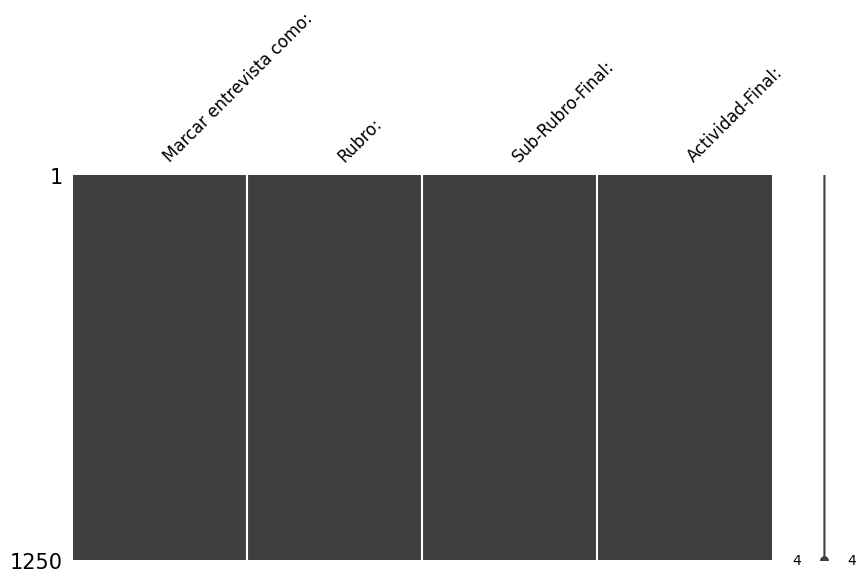

In [218]:
msno.matrix(df_entrevistados[columnas_a_analizar], figsize=(10, 5), fontsize=12)

Nota: Analicé el dataset y encontré las columnas que tienen valores faltantes y que pueden ser completadas con el conocimiento experto, para lo mismo leí las evaluaciones del equipo técnico, la descripción del emprendedor y la justificación de la aprobación o no del trámite. Posteriormente imputé los valores de Subrubro, Rubro y Actividad de esos 10 registros faltantes.

<Axes: >

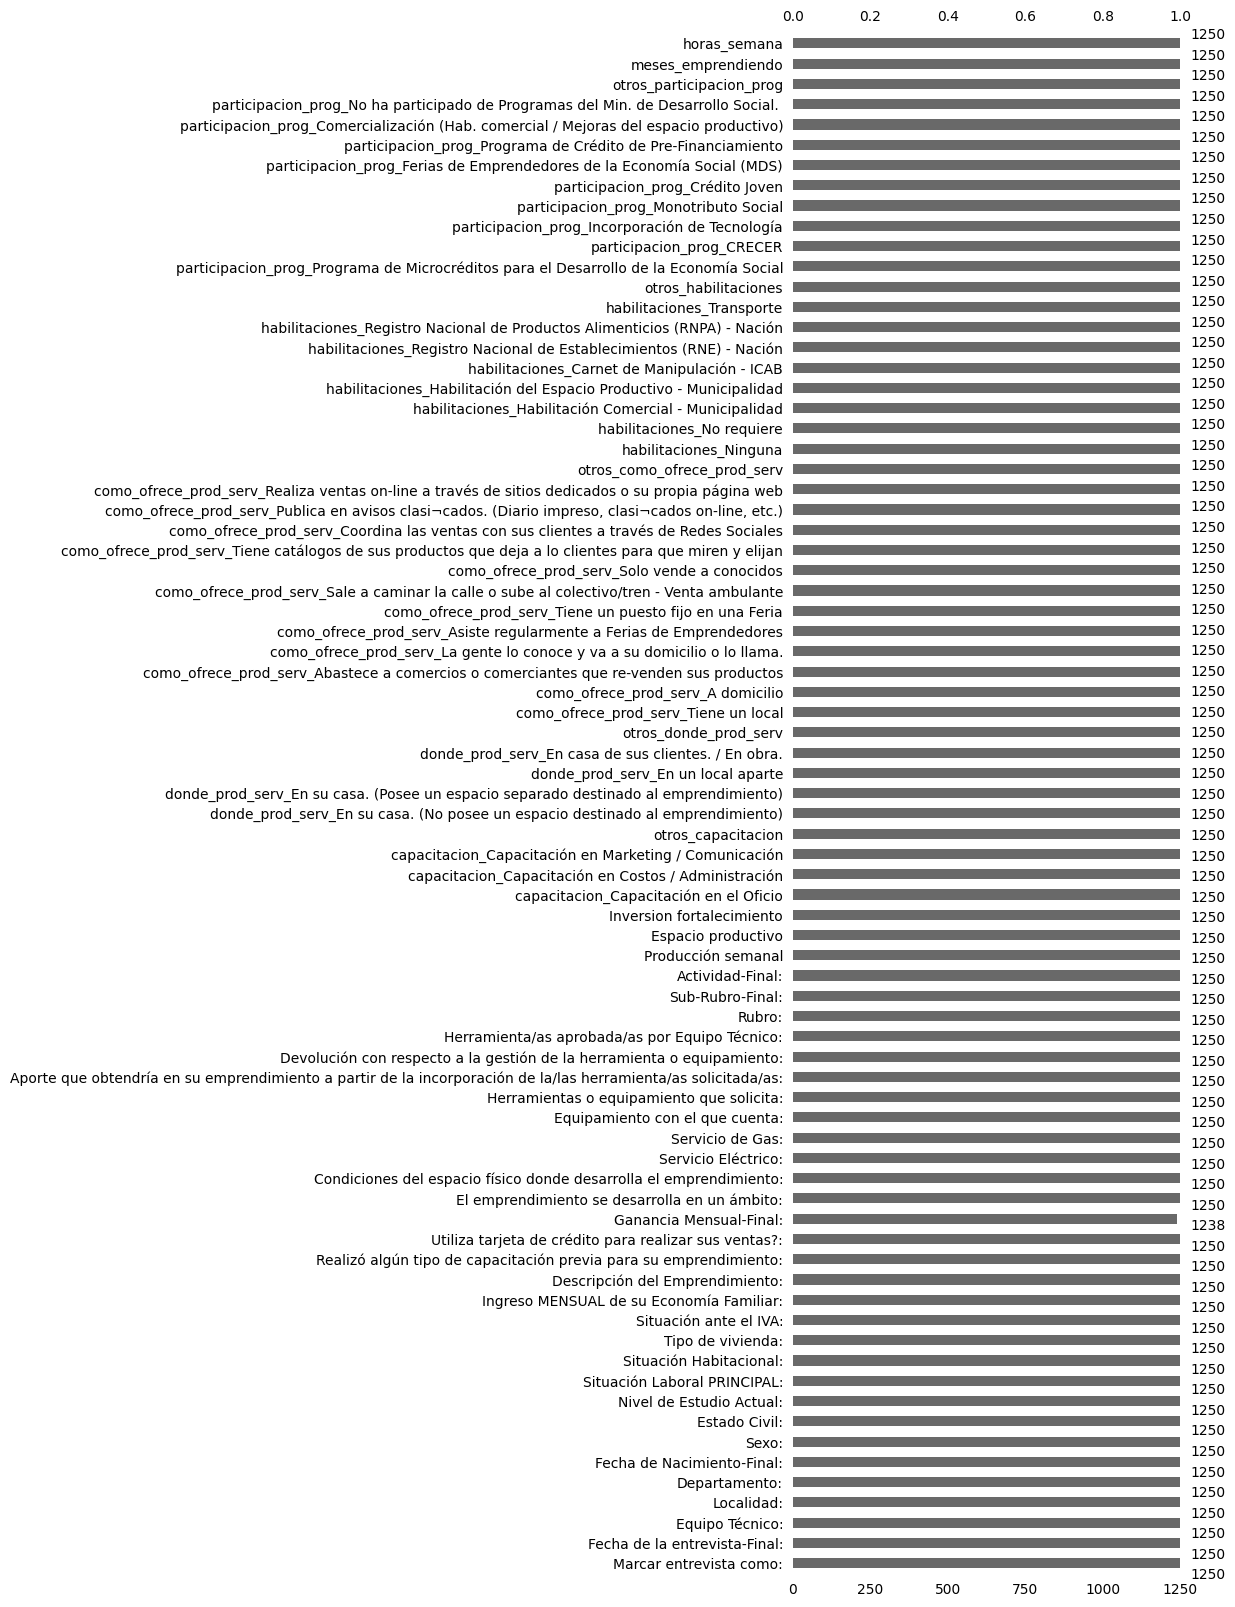

In [219]:
# Reviso el dataset completo para evaluar si hay valores nulos:
msno.bar(df_entrevistados, figsize=(5, 20), fontsize=10)

In [220]:
# Solo hay valores nulos en la columna Ganancia Mensual-Final:. Voy a calcular la media y reemplazar los valores nulos por la media.
ganancia_media = df_entrevistados["Ganancia Mensual-Final:"].mean()
df_entrevistados["Ganancia Mensual-Final:"] = df_entrevistados[
    "Ganancia Mensual-Final:"
].fillna(ganancia_media)

# Verificar si hay valores nulos en la columna Ganancia Mensual-Final:
nulos_restantes = df_entrevistados["Ganancia Mensual-Final:"].isnull().sum()
print(f"Valores nulos restantes en 'Ganancia Mensual-Final:': {nulos_restantes}")

Valores nulos restantes en 'Ganancia Mensual-Final:': 0


* `Detección y eliminación de registros duplicados:` Voy a verificar si hay registros duplicados en el dataset y en caso de haberlos, los eliminaré para evitar sesgos en el análisis. Para ello, utilizaré la función `duplicated()` de Pandas, que permite identificar y marcar los registros duplicados en un DataFrame.

In [221]:
# Verificación de registros duplicados.
duplicados = df_entrevistados.duplicated().sum()
print(f"Registros duplicados: {duplicados}")

Registros duplicados: 1


In [222]:
# Se encontntró un registro duplicado, verificaré cuales son estos registros y si es necesario eliminar uno de ellos. Identificar y mostrar todas las filas duplicadas, incluyendo las originales y las duplicadas.
duplicados_completos = df_entrevistados[df_entrevistados.duplicated(keep=False)]

# Mostrar las filas duplicadas
display(duplicados_completos)

Marcar entrevista como: Fecha de la entrevista-Final: Equipo Técnico: Localidad: Departamento: Fecha de Nacimiento-Final:      Sexo: Estado Civil: Nivel de Estudio Actual: Situación Laboral PRINCIPAL: Situación Habitacional:                 Tipo de vivienda: Situación ante el IVA:  Ingreso MENSUAL de su Economía Familiar:                    Descripción del Emprendimiento: Realizó algún tipo de capacitación previa para su emprendimiento: Utiliza tarjeta de crédito para realizar sus ventas?:  Ganancia Mensual-Final: El emprendimiento se desarrolla en un ámbito: Condiciones del espacio físico donde desarrolla el emprendimiento:      Servicio Eléctrico: Servicio de Gas:                    Equipamiento con el que cuenta:          Herramientas o equipamiento que solicita: Aporte que obtendría en su emprendimiento a partir de la incorporación de la/las herramienta/as solicitada/as: Devolución con respecto a la gestión de la herramienta o equipamiento:     Herramienta/as aprobada/as por Equipo Técnico:               Rubro:       Sub-Rubro-Final:                 Actividad-Final: Producción semanal Espacio productivo Inversion fortalecimiento  capacitacion_Capacitación en el Oficio  capacitacion_Capacitación en Costos / Administración  capacitacion_Capacitación en Marketing / Comunicación  otros_capacitacion  donde_prod_serv_En su casa. (No posee un espacio destinado al emprendimiento)  donde_prod_serv_En su casa. (Posee un espacio separado destinado al emprendimiento)  donde_prod_serv_En un local aparte  donde_prod_serv_En casa de sus clientes. / En obra.  otros_donde_prod_serv  como_ofrece_prod_serv_Tiene un local  como_ofrece_prod_serv_A domicilio  como_ofrece_prod_serv_Abastece a comercios o comerciantes que re-venden sus productos  como_ofrece_prod_serv_La gente lo conoce y va a su domicilio o lo llama.  como_ofrece_prod_serv_Asiste regularmente a Ferias de Emprendedores  como_ofrece_prod_serv_Tiene un puesto fijo en una Feria  como_ofrece_prod_serv_Sale a caminar la calle o sube al colectivo/tren - Venta ambulante  como_ofrece_prod_serv_Solo vende a conocidos  como_ofrece_prod_serv_Tiene catálogos de sus productos que deja a lo clientes para que miren y elijan  como_ofrece_prod_serv_Coordina las ventas con sus clientes a través de Redes Sociales  como_ofrece_prod_serv_Publica en avisos clasi¬cados. (Diario impreso, clasi¬cados on-line, etc.)  como_ofrece_prod_serv_Realiza ventas on-line a través de sitios dedicados o su propia página web  otros_como_ofrece_prod_serv  habilitaciones_Ninguna  habilitaciones_No requiere  habilitaciones_Habilitación Comercial - Municipalidad  habilitaciones_Habilitación del Espacio Productivo - Municipalidad  habilitaciones_Carnet de Manipulación - ICAB  habilitaciones_Registro Nacional de Establecimientos (RNE) - Nación  habilitaciones_Registro Nacional de Productos Alimenticios (RNPA) - Nación  habilitaciones_Transporte  otros_habilitaciones  participacion_prog_Programa de Microcréditos para el Desarrollo de la Economía Social  participacion_prog_CRECER  participacion_prog_Incorporación de Tecnología  participacion_prog_Monotributo Social  participacion_prog_Crédito Joven  participacion_prog_Ferias de Emprendedores de la Economía Social (MDS)  participacion_prog_Programa de Crédito de Pre-Financiamiento  participacion_prog_Comercialización (Hab. comercial / Mejoras del espacio productivo)  participacion_prog_No ha participado de Programas del Min. de Desarrollo Social.   otros_participacion_prog  meses_emprendiendo  horas_semana
1130  La entrevista se realizó correctamente.           2019-01-29 00:00:00         Rodrigo     Paraná        Paraná        1978-01-30 00:00:00  Masculino      Casada/o      Secundario Completo                     Empleado         Vivienda Propia  No se pudo verificar la vivienda     Monotributo Social                                   25000.0  Julio Cesar se dedica al bobinado de motores e...                                                 SI                                

In [223]:
# Eliminar duplicados manteniendo la primera aparición
df_entrevistados.drop_duplicates(inplace=True)

* `Detección y Manejo de Outliers:` Voy a revisar las siguientes columnas para detectar y manejar los outliers:

    - "Ingreso MENSUAL de su Economía Familiar:"
    - "Ganancia Mensual-Final:"

In [224]:
# Evaluar los outliers en la columna "Ingreso MENSUAL de su Economía Familiar:"

# Definir un intervalo:
intervalo_valido = (0, 50000)

visualizar_outliers(
    df_entrevistados, "Ingreso MENSUAL de su Economía Familiar:", intervalo_valido
)

Nota: Los valores fuera del intervalo no parecen extremadamente anormales si consideramos que algunos formularios pueden haber sido completados por grupos de trabajo o familias asociadas. Sin embargo, esto resalta la importancia de manejar y estandarizar esta variable de manera más clara en futuros formularios.

INSIGHT💡: La variabilidad en la columna de "Ingreso MENSUAL de su Economía Familiar" puede reflejar las distintas realidades de los emprendedores, pero también indica la necesidad de una mejor definición de los términos e instrucciones para la carga en el formulario.

Recomendaciones:
- Los datos de ingresos mensuales y ganancias finales presentan una amplia variabilidad, con algunos valores extremadamente altos que podrían corresponder a emprendimientos exitosos o a errores en la entrada de datos.
- Considerar agregar campos separados en el formulario para diferentes tipos de ingresos: por ejemplo, "Ingreso Individual Mensual" e "Ingreso Familiar Asociativo Mensual". Esto permitiría al equipo de análisis separar y categorizar los datos de manera más efectiva.
- Implementar rangos predefinidos de ingresos en las opciones del formulario (por ejemplo, seleccionar entre "0-5k", "5k-10k", "10k-20k", etc.). Esto podría ayudar a controlar las variaciones extremas en las respuestas y facilitar el análisis posterior. Los valores fuera de estos rangos se pueden marcar automáticamente para revisión.
- Incluir una pregunta adicional en el formulario que consulte si el ingreso corresponde a un grupo asociativo, a una familia o a un individuo. Esto puede proporcionar un contexto útil durante el análisis y justificación de posibles valores altos.
- Definir límites máximos lógicos basados en el contexto del programa o proyecto (por ejemplo, ingresos familiares que superen los 100k al mes pueden requerir revisión). Automatizar advertencias o solicitudes de validación si se ingresan valores que exceden ciertos límites.
- Agregar un espacio en el formulario para que los entrevistados brinden detalles adicionales sobre la composición del ingreso familiar, como la cantidad de personas que aportan al ingreso o las actividades económicas involucradas. Esto enriquecerá el contexto y permitirá un análisis más detallado.



In [225]:
# Evaluar los outliers en la columna "Ganancia Mensual-Final:"

# Definir un intervalo:
intervalo_valido = (0, 50000)

visualizar_outliers(df_entrevistados, "Ganancia Mensual-Final:", intervalo_valido)

La gráfica de la "Ganancia Mensual-Final" muestra un fenómeno interesante: la presencia de múltiples valores negativos y extremos. Aunque las ganancias negativas suelen ser una señal de advertencia en un negocio, es importante analizar este contexto en detalle.

Observaciones del equipo técnico:
- Los valores negativos en las ganancias podrían ser atribuibles a inversiones significativas realizadas por los emprendedores en maquinaria o tecnología para mejorar o diversificar su oferta. Este tipo de gasto inicial puede llevar a un periodo temporal de pérdidas, lo cual es esperable en ciertos ciclos de negocio.
- Dado que el equipo técnico ha indicado que la actitud de inversión puede considerarse positiva y es un factor en las aprobaciones, estos valores negativos no deben ser descartados automáticamente.
- Los outliers positivos (por encima de los 30k) podrían estar representando negocios altamente rentables, grupos asociativos, o errores en la entrada de datos.
Dado que el equipo técnico ha indicado que la actitud de inversión puede considerarse positiva y es un factor en las aprobaciones, estos valores negativos no deben ser descartados automáticamente.

INSIGHT💡: Los valores negativos en la ganancia mensual no deben ser interpretados de forma aislada como una señal negativa. Pueden reflejar una actitud de inversión proactiva que, en ciertos contextos, podría ser un indicador de compromiso y visión a largo plazo por parte del emprendedor. La clave para el equipo técnico será incorporar mecanismos en el proceso de evaluación que diferencien entre pérdidas estratégicas y problemas financieros genuinos, lo que permitirá tomar decisiones más informadas y alineadas con los objetivos del programa.

Recomendaciones:

- Una recomendación clave es distinguir entre las inversiones de capital (compra de maquinaria, tecnología, etc.) y los gastos operativos mensuales en el formulario. Esto proporcionará un contexto más rico para entender si las pérdidas se deben a inversiones estratégicas o problemas en la operación del emprendimiento.
- Introducir un indicador en el formulario que capture la actitud y capacidad de inversión del emprendedor. Esto ayudaría a identificar los casos donde las pérdidas actuales son el resultado de inversiones con miras a incrementar la productividad y las ganancias futuras.
- Realizar un seguimiento más estrecho de los emprendedores que presentan ganancias negativas para evaluar el impacto de las inversiones. Esto permitirá al equipo técnico ajustar sus criterios de evaluación y aprobación, así como obtener lecciones sobre qué tipo de inversiones tienden a traducirse en mejoras a largo plazo.
- Establecer rangos de evaluación para las ganancias mensuales y contextualizar los valores negativos. Por ejemplo, un rango podría ser "ganancias negativas por inversiones estratégicas" frente a "ganancias negativas por problemas operativos". Esto puede servir para clasificar y analizar mejor los datos.
- Agregar un campo descriptivo en el formulario para los emprendedores que presenten ganancias negativas, donde expliquen si estas pérdidas se deben a inversiones, problemas operativos, o a otros factores. Esta información cualitativa puede ser crucial para la toma de decisiones del equipo técnico.
- Implementar una herramienta de análisis temporal para observar la evolución de las ganancias en emprendimientos aprobados con pérdidas iniciales. Esto permitirá validar si la inversión realizada se traduce en una mejora financiera en el tiempo y ayudará a mejorar los criterios de evaluación.


* `Manejo de Fechas:`

1) Voy a realizar un análisis de las fechas para convertirlas en un tipo de dato que pueda ser usable a futuro. Las columnas que voy a analizar son:

    - "Fecha de la entrevista-Final:"
    - "Fecha de Nacimiento-Final:"
2) Revisaré si hay valores fuera del periodo en que se ejecutó el programa en la columna de fecha de entrevista y en caso de haberlos, los imputaré con la fecha de inicio del programa.
3) Luego voy a agregar una nueva columna con la edad de los emprendedores en base a la fecha de nacimiento.
4) Evaluaré si hay valores outliers en la columna de edad y en caso de haberlos, los imputaré con la media.


In [226]:
# Paso 1:
df_entrevistados[["Fecha de la entrevista-Final:", "Fecha de Nacimiento-Final:"]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1249 entries, 0 to 1262
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Fecha de la entrevista-Final:  1249 non-null   object
 1   Fecha de Nacimiento-Final:     1249 non-null   object
dtypes: object(2)
memory usage: 29.3+ KB


In [227]:
# Convertir la columna 'Fecha de la entrevista-Final:' a tipo datetime
df_entrevistados["Fecha de la entrevista-Final:"] = pd.to_datetime(
    df_entrevistados["Fecha de la entrevista-Final:"], errors="coerce"
)

# Convertir la columna 'Fecha de Nacimiento-Final:' a tipo datetime
df_entrevistados["Fecha de Nacimiento-Final:"] = pd.to_datetime(
    df_entrevistados["Fecha de Nacimiento-Final:"], errors="coerce"
)

# Verificar si la conversión se realizó correctamente
df_entrevistados[["Fecha de la entrevista-Final:", "Fecha de Nacimiento-Final:"]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1249 entries, 0 to 1262
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Fecha de la entrevista-Final:  1249 non-null   datetime64[ns]
 1   Fecha de Nacimiento-Final:     1249 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 29.3 KB


In [228]:
# Paso 2: Evaluar valores fuera del período de ejecución del programa en la columna "Fecha de la entrevista-Final:"
# Visualizo con un histograma la distribución de las fechas de entrevista
colores_personalizados = ["#6CAA3F", "#98BF64", "#4E7039", "#A9C6A5"]

fig = px.histogram(
    df_entrevistados,
    x="Fecha de la entrevista-Final:",
    title="Distribución de las Fechas de la Entrevista",
    color_discrete_sequence=colores_personalizados,
)

fig.show()

Nota: Consultado el equipo técnico, me observa que segun sus registros la primeras entrevistas se realizaron desde noviembre de 2015 y el programa finalizó en diciembre de 2019. Con este dato, procedo a imputar todos los valores fuera de ese rango por la fecha de inicio del programa.

In [229]:
# Definir las fechas límite
fecha_inicio_programa = pd.to_datetime("2015-11-01")
fecha_fin_programa = pd.to_datetime("2020-01-01")

# Imputar las fechas fuera de rango con la fecha de inicio del programa
df_entrevistados["Fecha de la entrevista-Final:"] = df_entrevistados[
    "Fecha de la entrevista-Final:"
].apply(
    lambda x: (
        fecha_inicio_programa
        if (x < fecha_inicio_programa) or (x > fecha_fin_programa)
        else x
    )
)

In [230]:
# Visualizo nuevamente
colores_personalizados = ["#6CAA3F", "#98BF64", "#4E7039", "#A9C6A5"]

fig = px.histogram(
    df_entrevistados,
    x="Fecha de la entrevista-Final:",
    title="Distribución de las Fechas de la Entrevista",
    nbins=30,
    color_discrete_sequence=colores_personalizados,
)

fig.show()

In [231]:
# Paso 3: Calcular la edad de los entrevistados. (Al momento de la entrevista)
df_entrevistados["Edad"] = (
    df_entrevistados["Fecha de la entrevista-Final:"]
    - df_entrevistados["Fecha de Nacimiento-Final:"]
).dt.days // 365

In [232]:
# Evaluar los outliers en nueva columna "Edad"

# Definir un intervalo:
intervalo_valido = (18, 100)

visualizar_outliers(df_entrevistados, "Edad", intervalo_valido)

In [233]:
# Filtrar las edades fuera del rango 18-80 años y marcar para revisión
edades_fuera_de_rango = df_entrevistados[
    (df_entrevistados["Edad"] < 18) | (df_entrevistados["Edad"] > 80)
]

# Mostrar los registros con edades fuera de rango
if not edades_fuera_de_rango.empty:
    print(
        f"Se encontraron {len(edades_fuera_de_rango)} edades fuera del rango 18-80 años."
    )
else:
    print("No se encontraron edades fuera del rango 18-80 años.")

Se encontraron 27 edades fuera del rango 18-80 años.


In [234]:
# Imputar las fechas de nacimiento fuera de rango (27) con la mediana de las fecha de nacimiento válidas

# Calcular la mediana de las edades dentro del rango válido (18-80)
mediana_edad_valida = df_entrevistados[
    (df_entrevistados["Edad"] >= 18) & (df_entrevistados["Edad"] <= 80)
]["Edad"].median()

In [235]:
# Imputar las edades fuera de rango con la mediana calculada
df_entrevistados.loc[
    (df_entrevistados["Edad"] < 18) | (df_entrevistados["Edad"] > 80), "Edad"
] = mediana_edad_valida

In [236]:
# Volvemos a evaluar los outliers en la nueva columna "Edad"

intervalo_valido = (18, 100)

visualizar_outliers(df_entrevistados, "Edad", intervalo_valido)

* `Convertir Columnas Categóricas a Tipo category:`

Las columnas categóricas son aquellas que contienen un número limitado de valores únicos (por ejemplo, "Sexo", "Estado Civil", "Nivel de Estudio Actual", etc.). Convertir estas columnas al tipo category tiene los siguientes beneficios:

- Optimización de Memoria: Las variables categóricas ocupan menos espacio en memoria.
- Velocidad: Las operaciones estadísticas y análisis se realizan más rápido con datos categóricos.
- Facilidad de Uso: Algunos algoritmos de aprendizaje automático, como árboles de decisión, trabajan mejor con datos categóricos.

In [237]:
# Identificar las columnas que se pueden convertir a tipo 'category'
columnas_categoricas = [
    "Marcar entrevista como:",
    "Equipo Técnico:",
    "Localidad:",
    "Departamento:",
    "Sexo:",
    "Estado Civil:",
    "Nivel de Estudio Actual:",
    "Tipo de vivienda:",
    "Situación ante el IVA:",
    "Realizó algún tipo de capacitación previa para su emprendimiento:",
    "Utiliza tarjeta de crédito para realizar sus ventas?:",
    "El emprendimiento se desarrolla en un ámbito:",
    "Condiciones del espacio físico donde desarrolla el emprendimiento:",
    "Servicio Eléctrico:",
    "Servicio de Gas:",
    "Devolución con respecto a la gestión de la herramienta o equipamiento:",
    "Rubro:",
    "Sub-Rubro-Final:",
    "Actividad-Final:",
]

# Convertir las columnas a tipo 'category'
for columna in columnas_categoricas:
    df_entrevistados[columna] = df_entrevistados[columna].astype("category")

# Verificar la conversión
print(df_entrevistados[columnas_categoricas].info())

<class 'pandas.core.frame.DataFrame'>
Index: 1249 entries, 0 to 1262
Data columns (total 19 columns):
 #   Column                                                                  Non-Null Count  Dtype   
---  ------                                                                  --------------  -----   
 0   Marcar entrevista como:                                                 1249 non-null   category
 1   Equipo Técnico:                                                         1249 non-null   category
 2   Localidad:                                                              1249 non-null   category
 3   Departamento:                                                           1249 non-null   category
 4   Sexo:                                                                   1249 non-null   category
 5   Estado Civil:                                                           1249 non-null   category
 6   Nivel de Estudio Actual:                                                1249 

* `Renombrar columnas:`

Para finalizar el data wrangling, voy a renombrar las columnas para que sean más descriptivas y fáciles de entender. Esto facilitará el análisis y la interpretación de los datos.

In [238]:
nuevos_nombres = {
    "Marcar entrevista como:": "entrevista_estado",
    "Fecha de la entrevista-Final:": "fecha_entrevista",
    "Equipo Técnico:": "equipo_tecnico",
    "Localidad:": "localidad",
    "Departamento:": "departamento",
    "Fecha de Nacimiento-Final:": "fecha_nacimiento",
    "Sexo:": "sexo",
    "Estado Civil:": "estado_civil",
    "Nivel de Estudio Actual:": "nivel_estudio",
    "Situación Laboral PRINCIPAL:": "situacion_laboral",
    "Situación Habitacional:": "situacion_habitacional",
    "Tipo de vivienda:": "tipo_vivienda",
    "Situación ante el IVA:": "situacion_iva",
    "Ingreso MENSUAL de su Economía Familiar:": "ingreso_mensual",
    "Descripción del Emprendimiento:": "descripcion_emprendimiento",
    "Realizó algún tipo de capacitación previa para su emprendimiento:": "capacitacion_previa",
    "Utiliza tarjeta de crédito para realizar sus ventas?:": "tarjeta_credito",
    "Ganancia Mensual-Final:": "ganancia_mensual",
    "El emprendimiento se desarrolla en un ámbito:": "ambito_emprendimiento",
    "Condiciones del espacio físico donde desarrolla el emprendimiento:": "condiciones_espacio",
    "Servicio Eléctrico:": "servicio_electrico",
    "Servicio de Gas:": "servicio_gas",
    "Equipamiento con el que cuenta:": "equipamiento_actual",
    "Herramientas o equipamiento que solicita:": "equipamiento_solicitado",
    "Aporte que obtendría en su emprendimiento a partir de la incorporación de la/las herramienta/as solicitada/as:": "aporte_herramienta",
    "Devolución con respecto a la gestión de la herramienta o equipamiento:": "devolucion_gestion",
    "Herramienta/as aprobada/as por Equipo Técnico:": "herramientas_aprobadas",
    "Rubro:": "rubro",
    "Sub-Rubro-Final:": "subrubro",
    "Actividad-Final:": "actividad",
    "Producción semanal": "produccion_semanal",
    "Espacio productivo": "espacio_productivo",
    "Inversion fortalecimiento": "inversion_fortalecimiento",
    "donde_prod_serv_En su casa. (No posee un espacio destinado al emprendimiento)": "donde_prod_serv_casa_sin_espacio",
    "donde_prod_serv_En su casa. (Posee un espacio separado destinado al emprendimiento)": "donde_prod_serv_casa_con_espacio",
    "donde_prod_serv_En un local aparte": "donde_prod_serv_local_aparte",
    "donde_prod_serv_En casa de sus clientes. / En obra.": "donde_prod_serv_en_casa_clientes",
    "otros_donde_prod_serv": "donde_prod_serv_otros",
    "como_ofrece_prod_serv_Tiene un local": "como_ofrece_prod_serv_local",
    "como_ofrece_prod_serv_A domicilio": "como_ofrece_prod_serv_domicilio",
    "como_ofrece_prod_serv_Abastece a comercios o comerciantes que re-venden sus productos": "como_ofrece_prod_serv_comercios",
    "como_ofrece_prod_serv_La gente lo conoce y va a su domicilio o lo llama.": "como_ofrece_prod_serv_conocidos_a_domicilio",
    "como_ofrece_prod_serv_Asiste regularmente a Ferias de Emprendedores": "como_ofrece_prod_serv_ferias",
    "como_ofrece_prod_serv_Tiene un puesto fijo en una Feria": "como_ofrece_prod_serv_puesto_fijo_feria",
    "como_ofrece_prod_serv_Sale a caminar la calle o sube al colectivo/tren - Venta ambulante": "como_ofrece_prod_serv_venta_ambulante",
    "como_ofrece_prod_serv_Solo vende a conocidos": "como_ofrece_prod_serv_conocidos",
    "como_ofrece_prod_serv_Tiene catálogos de sus productos que deja a lo clientes para que miren y elijan": "como_ofrece_prod_serv_catalogos",
    "como_ofrece_prod_serv_Coordina las ventas con sus clientes a través de Redes Sociales": "como_ofrece_prod_serv_redes_sociales",
    "como_ofrece_prod_serv_Publica en avisos clasi¬cados. (Diario impreso, clasi¬cados on-line, etc.)": "como_ofrece_prod_serv_clasificados",
    "como_ofrece_prod_serv_Realiza ventas on-line a través de sitios dedicados o su propia página web": "como_ofrece_prod_serv_online",
    "otros_como_ofrece_prod_serv": "como_ofrece_prod_serv_otros",
    "habilitaciones_Ninguna": "habilitacion_ninguna",
    "habilitaciones_No requiere": "habilitacion_no_requiere",
    "habilitaciones_Habilitación Comercial - Municipalidad": "habilitacion_comercial_municipal",
    "habilitaciones_Habilitación del Espacio Productivo - Municipalidad": "habilitacion_espacio_municipal",
    "habilitaciones_Carnet de Manipulación - ICAB": "habilitacion_carnet_icab",
    "habilitaciones_Registro Nacional de Establecimientos (RNE) - Nación": "habilitacion_rne_nacion",
    "habilitaciones_Registro Nacional de Productos Alimenticios (RNPA) - Nación": "habilitacion_rnpa_nacion",
    "habilitaciones_Transporte": "habilitacion_transporte",
    "otros_habilitaciones": "habilitacion_otras",
    "participacion_prog_Programa de Microcréditos para el Desarrollo de la Economía Social": "participacion_prog_microcreditos",
    "participacion_prog_CRECER": "participacion_prog_crecer",
    "participacion_prog_Incorporación de Tecnología": "participacion_prog_incorporacion_tecnologia",
    "participacion_prog_Monotributo Social": "participacion_prog_monotributo_social",
    "participacion_prog_Crédito Joven": "participacion_prog_credito_joven",
    "participacion_prog_Ferias de Emprendedores de la Economía Social (MDS)": "participacion_prog_ferias_emprendedores",
    "participacion_prog_Programa de Crédito de Pre-Financiamiento": "participacion_prog_credito_pre_financiamiento",
    "participacion_prog_Comercialización (Hab. comercial / Mejoras del espacio productivo)": "participacion_prog_comercializacion",
    "participacion_prog_No ha participado de Programas del Min. de Desarrollo Social. ": "participacion_prog_no",
    "otros_participacion_prog": "participacion_prog_otros",
    "meses_emprendiendo": "meses_emprendimiento",
    "horas_semana": "horas_semanales",
    "Edad": "edad",
}

# Renombrar las columnas del DataFrame
df_eda = df_entrevistados.rename(columns=nuevos_nombres)

df_eda.head(2)

entrevista_estado fecha_entrevista equipo_tecnico     localidad  departamento fecha_nacimiento       sexo estado_civil          nivel_estudio situacion_laboral situacion_habitacional tipo_vivienda       situacion_iva  ingreso_mensual                         descripcion_emprendimiento capacitacion_previa tarjeta_credito  ganancia_mensual ambito_emprendimiento condiciones_espacio       servicio_electrico   servicio_gas                                equipamiento_actual        equipamiento_solicitado                                 aporte_herramienta devolucion_gestion herramientas_aprobadas                rubro           subrubro               actividad produccion_semanal   espacio_productivo inversion_fortalecimiento  capacitacion_Capacitación en el Oficio  capacitacion_Capacitación en Costos / Administración  capacitacion_Capacitación en Marketing / Comunicación  otros_capacitacion  donde_prod_serv_casa_sin_espacio  donde_prod_serv_casa_con_espacio  donde_prod_serv_local_aparte  donde_prod_serv_en_casa_clientes  donde_prod_serv_otros  como_ofrece_prod_serv_local  como_ofrece_prod_serv_domicilio  como_ofrece_prod_serv_comercios  como_ofrece_prod_serv_conocidos_a_domicilio  como_ofrece_prod_serv_ferias  como_ofrece_prod_serv_puesto_fijo_feria  como_ofrece_prod_serv_venta_ambulante  como_ofrece_prod_serv_conocidos  como_ofrece_prod_serv_catalogos  como_ofrece_prod_serv_redes_sociales  como_ofrece_prod_serv_clasificados  como_ofrece_prod_serv_online  como_ofrece_prod_serv_otros  habilitacion_ninguna  habilitacion_no_requiere  habilitacion_comercial_municipal  habilitacion_espacio_municipal  habilitacion_carnet_icab  habilitacion_rne_nacion  habilitacion_rnpa_nacion  habilitacion_transporte  habilitacion_otras  participacion_prog_microcreditos  participacion_prog_crecer  participacion_prog_incorporacion_tecnologia  participacion_prog_monotributo_social  participacion_prog_credito_joven  participacion_prog_ferias_emprendedores  participacion_prog_credito_pre_financiamiento  participacion_prog_comercializacion  participacion_prog_no  participacion_prog_otros  meses_emprendimiento  horas_semanales  edad
0  La entrevista se realizó correctamente.       2016-03-17         Gisela  Gualeguaychú  Gualeguaychú       1971-02-09   Femenino     Casada/o    Secundario Completo      Autoempleado     Vivienda Alquilada        TIPO B  Monotributo Social           6000.0  Pre pizzas, pasta frolas, cremonas, pan sabori...                  SI              NO       5321.526656                Urbano            Regular.  Instalación Monofásica.  Gas Envasado.  Horno 6 moldes pizzero, Heladera familiar, bat...  Amasadora y sobadora de mesa   Para agregar otros productos con hojaldre y ag...           Aprobado   Amasadora y Sobadora           Producción       Panificación              Pastelería           Variable           Deficiente              Equipamiento                                       1                                                  0                                                     0                       0                                 1                                 0                             0                                 0                      0                            0                                0                                0                                            0                             0                                        1                                      0                                0                                0                                     1                                   0                             0                            0                     1                         0                                 0                               0                         0                        0                         0                        0                   0                                 1                          0                                            0  

In [239]:
df_eda.value_counts("devolucion_gestion")

devolucion_gestion
Aprobado       1174
No aprobado      75
Name: count, dtype: int64

🚨 **`Devolución con respecto a la gestión de la herramienta o equipamiento`**:

![Devolución](https://raw.githubusercontent.com/sosarodrigox/coderhouse_emprendedores_it/refs/heads/main/img/devolucion.png)

La columna `"Devolución con respecto a la gestión de la herramienta o equipamiento"` es una variable categórica que refleja directamente la aprobación o rechazo de la solicitud del emprendedor. Los posibles valores son: `"Aprobado ✅"` y `"No aprobado ❌"`. (Los registros correspondientes a "Para revisita" y "Aprobado - El emprendedor rechazó el fortalecimiento" se eliminaron en los pasos anteriores por no contener información relevante para el objetivo).

Dado que esta variable es categórica y tiene un conjunto limitado de posibles respuestas, es ideal para ser utilizada como **variable objetivo** en el modelo de predicción que desarrollaré a futuro. Mi objetivo es construir un modelo de Machine Learning que pueda predecir si un emprendedor será **aprobado** o **no aprobado** basándose en diferentes características del emprendimiento y del emprendedor. Esto permitirá automatizar parte del proceso de selección y brindar una preselección que facilite el trabajo del equipo técnico.

Por tanto, decidí conservar esta columna, renombrándola como `"devolucion_gestion"` para simplificar el análisis. Mas adelante realizaré un análisis EDA de la relación entre `"devolucion_gestion"` y otras variables relevantes como el **rubro del emprendimiento**, **nivel de estudios**, **sexo**, y **participación en programas**. Esto me permitirá identificar patrones que influyen en la aprobación y guiar el desarrollo del modelo predictivo.

`NOTA`: A partir de este punto utilizaré el dataset `df_eda` para realizar el análisis exploratorio de los datos y obtener insights relevantes para el equipo técnico.

### 4️⃣ Análisis Exploratorio de Datos (EDA):

El Análisis Exploratorio de Datos (EDA) es un proceso fundamental en el análisis de datos que tiene como objetivo comprender las características básicas del conjunto de datos. A través de este proceso, podemos identificar patrones, detectar valores atípicos, encontrar relaciones entre las variables y formular hipótesis iniciales para guiar análisis futuros. El EDA es esencial para obtener insights previos y para preparar los datos antes de aplicar técnicas analíticas más avanzadas.

**Tareas comunes en el EDA:**

*   **Resumen estadístico:** Obtener una vista general de las métricas básicas como la media, la mediana, los cuartiles y la desviación estándar para variables numéricas.
*   **Visualización de datos:** Utilizar gráficos como histogramas, gráficos de barras, diagramas de caja (boxplots) y gráficos de dispersión (scatter plots) para comprender la distribución y las relaciones en los datos.
*   **Detección de valores atípicos (outliers):** Identificar valores anómalos que puedan influir en el análisis, a través de técnicas visuales y estadísticas.
*   **Análisis de correlación:** Evaluar la relación entre variables utilizando matrices de correlación y gráficos de dispersión para identificar posibles patrones.
*   **Distribución de variables categóricas:** Examinar la frecuencia y proporciones de categorías en variables cualitativas mediante tablas y gráficos de barras.
*   **Evaluación de la consistencia de los datos:** Verificar la integridad de los datos, asegurándose de que las relaciones lógicas entre las columnas se mantengan.

**Nuestro objetivo principal será explorar de manera inicial el dataset para obtener una visión general y destacar características importantes, posibles patrones y áreas que requieran más investigación. Este análisis nos permitirá sentar las bases para los análisis posteriores y tomar decisiones informadas.**

**Comenzaremos con el análisis estadístico y visualización de las principales variables.**

### 1. **Análisis Univariado:**

  -  **Variables Categóricas:** Voy a analizar la frecuencia de las categorías de las variables que me den información sobre:
     * La población emprendedora como: `sexo`, `nivel_estudio`.
     * Los tipos de emprendimiento de la economía social en Entre Ríos: `capacitacion_previa`,`rubro`, `subrubro`, `actividad`, `produccion_semanal`.
     * Situación impositiva y económica de los emprendedores: `situacion_laboral`, `situacion_iva`, `tarjeta_credito`,
     * La distribución geográfica de los emprendmientos: `departamento`, `localidad`,`ambito_emprendimiento`
     - Visualizaré los datos utilizando gráficos lo que permitirá observar la distribución y diversidad en los datos.
  - **Preguntas a considerar:**
  
     - ¿Cuáles son los sectores de actividad más comunes? ¿Qué nivel educativo es predominante en cada sector?"
     - ¿Cuál es la proporción de emprendedores según el nivel educativo?
     - ¿Cuál es la proporción de emprendedores que tienen tarjetas de crédito?
     - ¿Cómo se distribuyen los emprendimientos según el departamento y localidad?
     - ¿Cuál es la proporción de emprendedores que han recibido capacitacion_previa?
     - ¿Qué rubro o subrubro predomina entre aquellos que recibieron capacitación?

In [240]:
# Sexo

fig = px.pie(
    df_eda,
    names="sexo",
    title="Distribución de Sexo de los Emprendedores",
    color_discrete_sequence=colores_personalizados,
    width=800,
    height=600,
)
fig.update_traces(textinfo="percent+label")
fig.show()

In [241]:
# Nivel educativo

nivel_educativo_counts = df_eda["nivel_estudio"].value_counts().reset_index()
nivel_educativo_counts.columns = ["nivel_estudio", "count"]

# Gráfico de barras
fig = px.bar(
    nivel_educativo_counts,
    x="nivel_estudio",
    y="count",
    title="Distribución del Nivel Educativo de los Emprendedores",
    labels={"nivel_estudio": "Nivel Educativo", "count": "Frecuencia"},
    color_discrete_sequence=colores_personalizados,
)
fig.show()

**INSIGHTS💡**

1. **Distribución por Género:**
   - **👩‍💼👨‍💼 Distribución equilibrada:** La **participación femenina** es ligeramente superior, con un 51.6% de mujeres frente a un 48.4% de hombres.
   - **🔎 Interpretación:** Este equilibrio sugiere que el programa está logrando atraer a emprendedores de ambos sexos, lo cual es positivo. Sin embargo, al consultar al equipo técnico, se nos indicó que para participar en este programa era necesario haber pasado previamente por un esquema de créditos solidarios llamado **"Microcréditos"**, en el cual se estima que **más del 80% de la participación fue femenina**. Esto indica que el programa tiene un sesgo en los criterios de selección de candidatos para participar, favoreciendo mayormente a hombres que no han participado de esta etapa previa. Este sesgo puede influir en la distribución de género observada, lo cual debe ser considerado al evaluar la **equidad** en el acceso y resultados del programa.

2. **Distribución del Nivel Educativo:**
   - **🎓 Nivel educativo predominante:** La mayoría de los emprendedores tiene **Secundario Completo** o **Primario Completo**, mientras que solo una minoría ha alcanzado estudios superiores.
   - **🔍 Interpretación:** Esto podría indicar que el programa está atrayendo principalmente a personas con menos oportunidades educativas. **💪 Reforzar la formación técnica** puede ser crucial para mejorar sus posibilidades de éxito, especialmente para quienes no tienen acceso a educación superior.

**Recomendaciones para el equipo técnico:**

1. **👩‍🔧 Continuar promoviendo el emprendimiento femenino:** Aunque las mujeres tienen una leve mayoría en el programa, se debe continuar desarrollando políticas que **eliminen cualquier barrera de género**. Incentivos adicionales para emprendedoras podrían fortalecer aún más su participación y asegurar que la equidad sea un eje central en la toma de decisiones del programa.

2. **⚠️ Revisar los criterios de selección:** El programa muestra un **sesgo en los criterios de selección**, dado que muchos participantes provienen de un esquema previo de **"Microcréditos"**, donde la mayoría eran mujeres, y esta tendencia no se muestra en el gráfico. Se recomienda ajustar los criterios para asegurar que **más mujeres puedan participar** y evitar que el sesgo afecte el acceso equitativo a recursos.

3. **📚 Mejorar las capacitaciones:** Dado que gran parte de los emprendedores cuenta con niveles educativos bajos, es fundamental **reforzar la formación técnica y emprendedora**. Se recomienda diseñar **capacitaciones adaptadas a diferentes niveles educativos**, para que todos los emprendedores, independientemente de su formación, puedan acceder a los conocimientos necesarios para mejorar sus emprendimientos.

4. **🔍 Evaluar el impacto del nivel educativo en el éxito:** Es recomendable investigar la **relación entre el nivel educativo** y el **éxito del emprendimiento** (medido por la aprobación del programa, incrementos en ingresos, etc.). Esta información podría ser clave para **optimizar la asignación de recursos** y brindar apoyo adicional a quienes más lo necesiten.

In [242]:
# Capacitacion previa:
capacitacion_counts = df_eda["capacitacion_previa"].value_counts().reset_index()
capacitacion_counts.columns = ["capacitacion_previa", "count"]

# Crear gráfico de torta para 'capacitacion_previa'
fig = px.pie(
    capacitacion_counts,
    names="capacitacion_previa",
    values="count",
    title="Distribución de Capacitación Previa de los Emprendedores",
    color_discrete_sequence=colores_personalizados,
    width=800,
    height=600,
)
fig.update_traces(textinfo="percent+label")
fig.show()

In [243]:
# Rubro:
# Contar las frecuencias de 'rubro'
rubro_counts = df_eda["rubro"].value_counts().reset_index()
rubro_counts.columns = ["rubro", "count"]

fig = px.pie(
    rubro_counts,
    names="rubro",
    values="count",
    title="Distribución de Rubro de los Emprendedores",
    color_discrete_sequence=colores_personalizados,
    width=800,
    height=600,
)

# Mostrar las etiquetas con porcentaje, etiqueta y valor (count)
fig.update_traces(textinfo="label+percent+value")

fig.show()

In [244]:
# Rubro: Cantidad de personas por rubro y sexo
rubro_sexo_counts = (
    df_eda.groupby(["rubro", "sexo"], observed=False)
    .size()
    .reset_index(name="Cantidad")
)

fig = px.bar(
    rubro_sexo_counts,
    x="rubro",
    y="Cantidad",
    color="sexo",
    title="Distribución de Rubro de los Emprendedores por Sexo",
    color_discrete_map={"Masculino": "blue", "Femenino": "red"},
    text="Cantidad",  # Añadir el texto que deseas mostrar
    width=1200,
    height=600,
)

# Mostrar etiquetas de cada barra
fig.update_traces(textposition="inside")
fig.update_layout(barmode="stack")

fig.show()

In [245]:
# Sub-Rubro:
# Contar las frecuencias de 'subrubro'
rubro_counts = df_eda["subrubro"].value_counts().reset_index()
rubro_counts.columns = ["subrubro", "recuento"]

fig = px.bar(
    rubro_counts,
    x="subrubro",
    y="recuento",
    title="Distribución de Sub-Rubro de los Emprendedores",
    color_discrete_sequence=colores_personalizados,
    width=1200,
    height=600,
)
fig.show()

In [246]:
# Sub-Rubro: Cantidad de personas por sub-rubro y sexo
subrubro_sexo_counts = (
    df_eda.groupby(["subrubro", "sexo"], observed=False)
    .size()
    .reset_index(name="Cantidad")
)

# Filtrar los 10 sub-rubros más frecuentes y ordenar por la cantidad total en orden descendente
top_10_subrubros = (
    subrubro_sexo_counts.groupby("subrubro")["Cantidad"]
    .sum()
    .nlargest(10)
    .sort_values(ascending=False)
    .index
)
subrubro_sexo_counts_top10 = subrubro_sexo_counts[
    subrubro_sexo_counts["subrubro"].isin(top_10_subrubros)
]

# Ordenar las filas para el gráfico
subrubro_sexo_counts_top10["subrubro"] = pd.Categorical(
    subrubro_sexo_counts_top10["subrubro"], categories=top_10_subrubros, ordered=True
)
subrubro_sexo_counts_top10 = subrubro_sexo_counts_top10.sort_values(
    by=["subrubro", "sexo"], ascending=[True, False]
)

# Crear el gráfico
fig = px.bar(
    subrubro_sexo_counts_top10,
    x="subrubro",
    y="Cantidad",
    color="sexo",
    title="Distribución de Sub-Rubro de los Emprendedores por Sexo",
    color_discrete_map={"Masculino": "blue", "Femenino": "red"},
    text="Cantidad",  # Añadir el texto que deseas mostrar
    width=1200,
    height=600,
)

# Mostrar etiquetas de cada barra
fig.update_traces(textposition="inside")
fig.update_layout(barmode="stack")

fig.show()

/var/folders/kf/yg24jn117tsddk3h_24784nr0000gp/T/ipykernel_767/695302995.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [247]:
# Actividad:
# Contar las frecuencias y muestro las 20 primeras (Son mas de 100 actividades)
actividad_counts = df_eda["actividad"].value_counts().nlargest(20).reset_index()
actividad_counts.columns = ["actividad", "recuento"]

fig = px.bar(
    actividad_counts,
    x="actividad",
    y="recuento",
    title="Distribución de las 20 Principales Actividades de los Emprendedores",
    color_discrete_sequence=colores_personalizados,
    width=1200,
    height=600,
)

fig.show()

In [248]:
# Actividad: Cantidad de personas por actividad y sexo
actividad_sexo_counts = (
    df_eda.groupby(["actividad", "sexo"], observed=False)
    .size()
    .reset_index(name="Cantidad")
)

# Filtrar las 10 actividades más frecuentes y ordenar por la cantidad total en orden descendente
top_10_actividades = (
    actividad_sexo_counts.groupby("actividad")["Cantidad"]
    .sum()
    .nlargest(10)
    .sort_values(ascending=False)
    .index
)
actividad_sexo_counts_top10 = actividad_sexo_counts[
    actividad_sexo_counts["actividad"].isin(top_10_actividades)
]

# Ordenar las filas para el gráfico
actividad_sexo_counts_top10["actividad"] = pd.Categorical(
    actividad_sexo_counts_top10["actividad"],
    categories=top_10_actividades,
    ordered=True,
)
actividad_sexo_counts_top10 = actividad_sexo_counts_top10.sort_values(
    by=["actividad", "sexo"], ascending=[True, False]
)

# Crear el gráfico
fig = px.bar(
    actividad_sexo_counts_top10,
    x="actividad",
    y="Cantidad",
    color="sexo",
    title="Distribución de las 10 Principales Actividades de los Emprendedores por Sexo",
    color_discrete_map={"Masculino": "blue", "Femenino": "red"},
    text="Cantidad",  # Añadir el texto que deseas mostrar
    width=1200,
    height=600,
)

# Mostrar etiquetas de cada barra
fig.update_traces(textposition="inside")
fig.update_layout(barmode="stack")

fig.show()

/var/folders/kf/yg24jn117tsddk3h_24784nr0000gp/T/ipykernel_767/1112503555.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [249]:
# Produccion_semanal:
produccion_counts = df_eda["produccion_semanal"].value_counts().reset_index()
produccion_counts.columns = ["produccion_semanal", "recuento"]

fig = px.bar(
    produccion_counts,
    x="produccion_semanal",
    y="recuento",
    title="Distribución de Producción Semanal de los Emprendedores",
    color_discrete_sequence=colores_personalizados,
    width=800,
    height=600,
)

fig.show()

**INSIGHTS💡**

1. **Capacitación Previa:**
   - **📈 Mayoría con capacitación previa:** El **53.5%** de los emprendedores que participaron en el programa **ya habían recibido algún tipo de capacitación** antes de aplicar al programa, mientras que el **46.5%** no lo habían hecho.
   - **🔎 Interpretación:** Este dato sugiere que el programa está recibiendo a emprendedores con diferentes niveles de experiencia y formación previa. Los participantes que **no han recibido capacitación previa** podrían necesitar un mayor apoyo para desarrollar habilidades técnicas y empresariales que les permitan gestionar mejor sus proyectos.

2. **Distribución de Rubros:**
   - **🏭 Predominio del sector productivo:** El **74%** de los emprendedores pertenece al sector de **producción**, mientras que el **26%** está en **servicios generales**.
   - **🔎 Interpretación:** La gran mayoría de los emprendedores están enfocados en actividades productivas, lo que podría reflejar una mayor necesidad de maquinaria y herramientas para aumentar su capacidad operativa. El sector de **servicios** tiene menor representación, lo cual podría ser una oportunidad para **expandir la cobertura** del programa a otros tipos de emprendimientos.

3. **Sub-rubro:**
   - **🍞 Predominio de panificación y textil:** Los principales sub-rubros son **panificación**, **fabricación** y **textil**, con mayor frecuencia en el número de emprendedores.
   - **🔎 Interpretación:** Estos sectores podrían ser los más beneficiados por el acceso a maquinaria y herramientas, ya que suelen requerir equipos especializados.

4. **Actividades Principales:**
   - **🍞 Alta participación en panadería y repostería:** Los principales rubros de actividad son **panadería**, **pescador**, **pastelería** y **peluquería**.
   - **🔎 Interpretación:** Las actividades relacionadas con la **producción de alimentos** y **servicios personales** son predominantes. Sería interesante evaluar si el **acceso a maquinaria específica** (hornos industriales, cortadoras, etc.) puede mejorar significativamente la productividad de los participantes.

5. **Producción Semanal:**
   - **🔄 Producción variable:** La mayoría de los emprendedores reporta una **producción semanal variable**, seguida por un nivel **intermedio**. Muy pocos tienen una producción constante y baja.
   - **🔎 Interpretación:** La variabilidad en la producción semanal puede deberse a la **falta de acceso a infraestructura o maquinaria**, lo que impide mantener una capacidad productiva constante. Se sugiere investigar los **factores que influyen en esta variabilidad** y cómo el programa puede intervenir para estabilizar la producción.

**Recomendaciones para el equipo técnico:**

1. **📚 Incrementar la oferta de capacitación técnica y de gestión de un emprendimiento:** Dado que un **46.5% de los emprendedores no recibieron capacitación previa**, es fundamental ofrecer programas formativos más amplios que aborden tanto **habilidades emprendedoras** como técnicas. Esto puede mejorar la sostenibilidad y éxito de sus proyectos.

2. **🔧 Focalizar esfuerzos en sectores productivos:** Como el **74%** de los emprendedores pertenece al sector **productivo**, las políticas de provisión de maquinaria y herramientas deberían centrarse en **fortalecer la capacidad operativa** de estos emprendimientos. **Panificación**, **textil**, y **fabricación** deberían ser rubros prioritarios para inversiones tecnológicas.

3. **📊 Evaluar el impacto de la producción variable:** Dado que gran parte de los emprendedores reporta una **producción semanal variable**, se recomienda analizar si esta variabilidad está vinculada a la falta de acceso a herramientas o maquinaria especializada. Esto permitirá al equipo técnico **optimizar la distribución de recursos** y ayudar a estabilizar la producción de estos emprendedores.

4. **📈 Ampliar el programa a otros rubros:** Con un **26%** de emprendedores en **servicios generales**, existe una oportunidad para **diversificar el alcance** del programa y ofrecer maquinaria y capacitación que cubra las necesidades específicas de los emprendimientos en este sector.

In [250]:
# Situación Laboral:
# Contar las frecuencias
situacion_laboral_counts = df_eda["situacion_laboral"].value_counts().reset_index()
situacion_laboral_counts.columns = ["situacion_laboral", "recuento"]

# Crear gráfico de barras para 'situacion_laboral'
fig = px.bar(
    situacion_laboral_counts,
    x="situacion_laboral",
    y="recuento",
    title="Distribución de la Situación Laboral de los Emprendedores",
    labels={"situacion_laboral": "Situación Laboral", "count": "Frecuencia"},
    color_discrete_sequence=colores_personalizados,
)
fig.update_xaxes(tickangle=45)
fig.show()

In [251]:
# Situación ante el IVA:
situacion_iva_counts = df_eda["situacion_iva"].value_counts().reset_index()
situacion_iva_counts.columns = ["situacion_iva", "recuento"]

fig = px.bar(
    situacion_iva_counts,
    x="situacion_iva",
    y="recuento",
    title="Distribución de la Situación ante el IVA de los Emprendedores",
    labels={"situacion_iva": "Situación ante el IVA", "recuento": "Frecuencia"},
    color_discrete_sequence=colores_personalizados,
    width=800,
    height=600,
)
fig.update_xaxes(tickangle=45)
fig.show()

In [252]:
# Tarjeta de Crédito:
tarjeta_credito_counts = df_eda["tarjeta_credito"].value_counts().reset_index()
tarjeta_credito_counts.columns = ["tarjeta_credito", "recuento"]

# Crear gráfico de torta para 'tarjeta_credito'
fig = px.pie(
    tarjeta_credito_counts,
    names="tarjeta_credito",
    values="recuento",
    title="Distribución del Uso de Tarjeta de Crédito de los Emprendedores",
    color_discrete_sequence=colores_personalizados,
    width=800,
    height=600,
)
fig.update_traces(textinfo="percent+label")  # Mostrar etiquetas y porcentaje
fig.show()

### **INSIGHTS 💡**

1. **Distribución de Situación Laboral:**
   - **💼 Autoempleo predominante:** Más del 80% de los emprendedores se identifican como **autoempleados**, lo que sugiere que la mayoría de los beneficiarios no tienen empleo formal y dependen de sus emprendimientos como única fuente de ingresos.
   - **🔍 Interpretación:** Esto destaca la importancia del programa para aquellos que no cuentan con empleos formales, lo que subraya la necesidad de brindar un **mayor soporte** para que estas personas puedan consolidar sus negocios.

2. **Distribución de Situación ante el IVA:**
   - **📊 Baja formalización tributaria:** Una gran mayoría de los emprendedores no está inscripta en ningún régimen fiscal (IVA), lo que sugiere un bajo nivel de formalización tributaria.
   - **🔎 Interpretación:** La falta de inscripción en AFIP puede limitar el crecimiento y la sostenibilidad de los emprendimientos, al restringir su acceso a beneficios fiscales o financiación formal. Es crucial **fomentar la formalización** de estos emprendedores para que puedan expandir sus negocios.

3. **Distribución del Uso de Tarjetas de Crédito:**
   - **💳 Uso mínimo de tarjetas de crédito:** Solo el 2.64% de los emprendedores utiliza tarjeta de crédito, lo que indica una muy baja adopción de métodos de pago más modernos.
   - **🔍 Mercado Pago y métodos modernos:** Es importante tener en cuenta que entre 2016 y 2019, la adopción de tecnologías como **Mercado Pago** (lanzada en 2016) estaba comenzando a despegar, pero no estaba tan extendida como lo está hoy. Esto plantea una oportunidad para revisar si actualmente los emprendedores han adoptado estas nuevas herramientas, y de no ser así, fomentar su uso para mejorar sus estrategias de pago y cobro.


### **Recomendaciones para el equipo técnico:**

1. **📈 Apoyar la formalización tributaria:** Se recomienda brindar **capacitaciones específicas** sobre la importancia de formalizarse ante los entes fiscales, destacando los beneficios tributarios y de acceso a créditos que esto puede ofrecer a los emprendedores.

2. **💳 Promover la adopción de pagos electrónicos:** A medida que herramientas como **Mercado Pago** y otros métodos de pago digital se vuelven más comunes, es crucial que los emprendedores reciban **formación sobre su uso**. El equipo técnico debería considerar realizar capacitación sobre plataformas de pago y cobro digitales, facilitando su adopción y promoviendo una mayor bancarización.

3. **💼 Fortalecer el apoyo a los autoempleados:** Dado que la mayoría de los emprendedores son autoempleados, es importante desarrollar **estrategias personalizadas de asistencia** que les ayuden a fortalecer su estabilidad económica. Esto incluye mejorar las capacitaciones en gestión empresarial, marketing y finanzas personales para ayudarles a consolidar sus proyectos.

In [253]:
# Distribución por 'Departamento'
departamento_counts = df_eda["departamento"].value_counts().reset_index()
departamento_counts.columns = ["departamento", "recuento"]

fig_departamento = px.bar(
    departamento_counts,
    x="recuento",
    y="departamento",
    title="Distribución de Emprendimientos por Departamento",
    labels={"departamento": "Departamento", "recuento": "Cantidad de emprendedores"},
    color_discrete_sequence=colores_personalizados,
    orientation="h",
    width=800,
    height=600,
)
fig_departamento.update_layout(yaxis={"categoryorder": "total ascending"})
fig_departamento.show()

In [254]:
# Distribución por 'Localidad' (Solo las 20 primeras)
localidad_counts = df_eda["localidad"].value_counts().nlargest(20).reset_index()
localidad_counts.columns = ["localidad", "recuento"]

# Crear gráfico de barras
fig_localidad = px.bar(
    localidad_counts,
    x="recuento",
    y="localidad",
    title="Distribución de Emprendimientos por Localidad (Top 20)",
    labels={"localidad": "Localidad", "recuento": "Cantidad de emprendedores"},
    color_discrete_sequence=colores_personalizados,
    orientation="h",
    width=800,
    height=600,
)
fig_localidad.update_layout(yaxis={"categoryorder": "total ascending"})
fig_localidad.show()

In [255]:
# Distribución por 'Ambito del emprendimiento'
ambito_counts = df_eda["ambito_emprendimiento"].value_counts().reset_index()
ambito_counts.columns = ["ambito_emprendimiento", "recuento"]

# Crear gráfico de barras
fig_ambito = px.bar(
    ambito_counts,
    x="recuento",
    y="ambito_emprendimiento",
    title="Distribución por ámbito del emprendimiento",
    labels={
        "ambito_emprendimiento": "Ámbito donde se desarrolla el emprendimiento",
        "recuento": "Recuento",
    },
    color_discrete_sequence=colores_personalizados,
    orientation="h",
    width=800,
    height=600,
)
fig_ambito.update_layout(yaxis={"categoryorder": "total ascending"})
fig_ambito.show()

**INSIGHTS💡**

1. **Distribución por Departamento:**
   - **🌍 Concentración en Paraná:** El departamento de **Paraná** concentra la mayor cantidad de beneficiarios del programa, con más de **350 emprendedores**. Otros departamentos con una representación considerable son **Concordia, Uruguay y Victoria**.
   - **🔍 Interpretación:** La mayor concentración en Paraná podría deberse a factores como mayor infraestructura, acceso a recursos, o una población más densa. Este dato indica la **importancia de focalizar políticas en áreas menos representadas** como Nogoyá, Federación y Tala, donde la cantidad de emprendimientos es significativamente menor.

2. **Distribución por Localidad:**
   - **🏙️ Fuerte presencia en Paraná y Concordia:** Las localidades de **Paraná** y **Concordia** dominan la cantidad de emprendedores entrevistados, mientras que localidades como **Tabossi, Pueblo Brugo** y **Ibicuy** muestran una baja participación dentro de las primeras 20 localidades visualizadas.
   - **🔎 Interpretación:** Estas cifras sugieren la necesidad de **redistribuir recursos y apoyo técnico a localidades menos desarrolladas**. Esto podría ayudar a **descentralizar el crecimiento económico** y garantizar que emprendedores en áreas más pequeñas también reciban oportunidades de crecimiento.

3. **Ámbito del Emprendimiento:**
   - **🏙️ Predominio de emprendimientos urbanos:** La mayoría de los emprendimientos se desarrollan en **ámbitos urbanos**, con **cerca de 1000 emprendedores**, mientras que los emprendimientos rurales tienen una participación más reducida.
   - **🔎 Interpretación:** Esta diferencia indica la necesidad de desarrollar políticas que **apoyen el emprendimiento rural**. Fortalecer este tipo de emprendimientos puede ser clave para mejorar el desarrollo económico en zonas alejadas y garantizar el acceso a recursos y oportunidades en áreas rurales.

**Recomendaciones para el equipo técnico:**

1. **📍 Focalizar esfuerzos en departamentos menos representados:** Dado que la mayoría de los emprendimientos están concentrados en Paraná y Concordia, se recomienda **redireccionar esfuerzos hacia los departamentos menos desarrollados** como Nogoyá o Federación. Iniciativas locales, como capacitaciones y acceso a herramientas, podrían ser claves para activar estos ecosistemas emprendedores.

2. **🚜 Promover el emprendimiento rural:** A pesar de la predominancia de emprendimientos urbanos, es crucial **reforzar el apoyo al ámbito rural**. El equipo técnico debería considerar programas especializados que atiendan las **necesidades y desafíos únicos** de los emprendedores rurales, como acceso a financiamiento, recursos o capacitación.

3. **🏘️ Diversificar las localidades de intervención:** Para evitar la concentración de emprendimientos en áreas urbanas grandes, el equipo podría priorizar políticas que **incentiven la creación de nuevos emprendimientos en localidades pequeñas**. Programas itinerantes o **facilidades logísticas para acceder a mercados más grandes** podrían ayudar a estos emprendedores a prosperar.

4. **🔗 Fortalecer el vínculo entre las localidades menos representadas y las oportunidades del programa:** En localidades como Tabossi o Pueblo Brugo, donde el número de emprendedores es bajo, sería útil **crear campañas de difusión y programas de atracción** de emprendedores para equilibrar la distribución de los recursos en toda la provincia.

* **Variables Numéricas:** Voy a analizar la distribución de las variables que me proporcionen información cuantitativa sobre:
   * La situación económica de los emprendedores: `ingreso_mensual`, `ganancia_mensual`.
   * Características demográficas y del emprendimiento: `edad`, `meses_emprendimiento`, `horas_semanales`.
   - Visualizaré los datos utilizando histogramas y gráficos de caja (boxplots) para identificar patrones en los datos.

- **Preguntas a considerar:**
  - ¿Cuál es la distribución de los ingresos mensuales y las ganancias mensuales?
  - ¿Cuál es la edad promedio de los emprendedores?
  - ¿Cuántos meses llevan emprendiendo y cuántas horas semanales dedican al emprendimiento?
  - ¿Existen valores extremos en alguna de estas variables que puedan influir en el análisis?

In [256]:
# Distribución y resumen estadístico del Ingreso Familiar Mensual de los emprendedores:
ingreso_mensual_summary = df_eda["ingreso_mensual"].describe()
print("Resumen estadístico de Ingreso Familiar Mensual:")
print(ingreso_mensual_summary)
# Graficos:

# Histograma
fig_hist_ingreso = px.histogram(
    df_eda,
    x="ingreso_mensual",
    title="Distribución del Ingreso Familiar Mensual de los Emprendedores",
    color_discrete_sequence=[colores_personalizados[0]],
    width=800,
    height=600,
)

fig_hist_ingreso.show()

# Boxplot
fig_box_ingreso = px.box(
    df_eda,
    y="ingreso_mensual",
    title="Boxplot del Ingreso Familiar Mensual de los Emprendedores",
    color_discrete_sequence=[colores_personalizados[0]],
    width=800,
    height=600,
)
fig_box_ingreso.show()

Resumen estadístico de Ingreso Familiar Mensual:
count     1249.000000
mean     13275.071257
std       8400.056438
min          1.000000
25%       7000.000000
50%      12000.000000
75%      18000.000000
max      64000.000000
Name: ingreso_mensual, dtype: float64


In [257]:
# Resumen estadístico de Ganancia Mensual
ganancia_mensual_summary = df_eda["ganancia_mensual"].describe()
print("Resumen estadístico de Ganancia Mensual:")
print(ganancia_mensual_summary)

# Histograma
fig_hist_ganancia = px.histogram(
    df_eda,
    x="ganancia_mensual",
    title="Distribución de la Ganancia Mensual de los Emprendedores",
    color_discrete_sequence=[colores_personalizados[0]],
    width=800,
    height=600,
)
fig_hist_ganancia.show()

# Boxplot
fig_box_ganancia = px.box(
    df_eda,
    y="ganancia_mensual",
    title="Boxplot de la Ganancia Mensual de los Emprendedores",
    color_discrete_sequence=[colores_personalizados[0]],
    width=800,
    height=600,
)
fig_box_ganancia.show()

Resumen estadístico de Ganancia Mensual:
count     1249.000000
mean      5320.983443
std       4641.707998
min     -10000.000000
25%       2500.000000
50%       4000.000000
75%       6500.000000
max      40000.000000
Name: ganancia_mensual, dtype: float64


**INSIGHTS💡**

1. **Distribución del Ingreso Familiar Mensual:**
   - **📉 Rango bajo predominante:** La mayoría de los emprendedores tienen un **ingreso familiar mensual** entre **10,000 a 30,000 ARS**, lo que refleja una situación económica ajustada.
   - **🔍 Interpretación:** Los emprendedores dependen en gran medida de sus familias y tienen ingresos bajos o moderados. Esto puede sugerir que estos emprendimientos funcionan como una fuente secundaria de ingresos o que aún están en las primeras etapas de crecimiento.

2. **Distribución de la Ganancia Mensual del Emprendimiento:**
   - **💼 Ganancias reducidas:** La **ganancia mensual** de los emprendimientos está concentrada principalmente entre **0 a 10,000 ARS**, con un pequeño porcentaje de emprendedores generando más de **20,000 ARS**.
   - **🔎 Interpretación:** Estos valores sugieren que la mayoría de los emprendimientos todavía están en una etapa inicial de desarrollo o no están generando ingresos significativos. Además, se observan **valores negativos**, que podrían representar pérdidas o costos operativos que superan los ingresos en algunos casos.

**Preguntas a considerar:**
- **💵 ¿Cómo mejorar la rentabilidad?**: Sería interesante investigar qué tipo de emprendimientos generan mayores ganancias y cuáles enfrentan pérdidas.
- **⚠️ Impacto de los valores negativos:** ¿A qué se deben los **valores negativos** en las ganancias mensuales? ¿Se deben a mal registro de los datos o a **pérdidas reales** en los emprendimientos?
- **📊 ¿Cómo mejorar la sostenibilidad?**: ¿Qué estrategias podrían implementarse para mejorar la rentabilidad y sostenibilidad de los emprendimientos con ganancias negativas?

**Recomendaciones para el equipo técnico:**

1. **📊 Evaluar la sostenibilidad de los emprendimientos:** Se recomienda analizar si los **emprendimientos con ganancias negativas** necesitan asistencia adicional o apoyo financiero para mejorar su rentabilidad. En estos casos, podrían ofrecerse **asesoramientos personalizados** o acceso a financiamiento específico.

2. **📈 Mejorar la capacitación en finanzas:** Capacitar a los emprendedores en **gestión financiera y de costos** podría ayudar a reducir pérdidas y aumentar las ganancias. Cursos sobre **control de costos**, **optimización de recursos** y **planificación financiera** serían útiles.

3. **🔍 Profundizar en el análisis por sectores:** Analizar los **diferentes sectores** para identificar cuáles tienen mejores márgenes de ganancia. Esto permitiría **redireccionar recursos** o desarrollar programas específicos para los sectores más afectados.

In [258]:
# Resumen estadístico de 'edad'
edad_summary = df_eda["edad"].describe()
print("Resumen estadístico de Edad:")
print(edad_summary)

# Histograma para 'edad'
fig_hist_edad = px.histogram(
    df_eda,
    x="edad",
    title="Distribución de la Edad de los Emprendedores",
    color_discrete_sequence=[colores_personalizados[1]],
    width=800,
    height=600,
)
fig_hist_edad.show()

# Boxplot para 'edad'
fig_box_edad = px.box(
    df_eda,
    y="edad",
    title="Boxplot de la Edad de los Emprendedores",
    color_discrete_sequence=[colores_personalizados[1]],
    width=800,
    height=600,
)
fig_box_edad.show()

Resumen estadístico de Edad:
count    1249.000000
mean       38.987990
std        11.643572
min        18.000000
25%        30.000000
50%        38.000000
75%        47.000000
max        73.000000
Name: edad, dtype: float64


In [259]:
# Resumen estadístico de 'meses_emprendimiento'
meses_emprendimiento = df_eda["meses_emprendimiento"].describe()
print("\nResumen estadístico de Meses de Emprendimiento:")
print(meses_emprendimiento)

# Histograma para 'meses_emprendimiento'
fig_hist_meses = px.histogram(
    df_eda,
    x="meses_emprendimiento",
    title="Distribución de los Meses de Emprendimiento",
    color_discrete_sequence=[colores_personalizados[2]],
    width=800,
    height=600,
)
fig_hist_meses.show()

# Boxplot para 'meses_emprendimiento'
fig_box_meses = px.box(
    df_eda,
    y="meses_emprendimiento",
    title="Boxplot de los Meses de Emprendimiento",
    color_discrete_sequence=[colores_personalizados[2]],
    width=800,
    height=600,
)
fig_box_meses.show()


Resumen estadístico de Meses de Emprendimiento:
count    1249.000000
mean       83.955965
std        98.156683
min         0.000000
25%        18.000000
50%        48.000000
75%       120.000000
max       600.000000
Name: meses_emprendimiento, dtype: float64


In [260]:
# Resumen estadístico de 'horas_semanales'
horas_semanales = df_eda["horas_semanales"].describe()
print("\nResumen estadístico de Horas Semanales Dedicadas al Emprendimiento:")
print(horas_semanales)

# Histograma para 'horas_semanales'
fig_hist_horas = px.histogram(
    df_eda,
    x="horas_semanales",
    title="Distribución de las Horas Semanales Dedicadas al Emprendimiento",
    color_discrete_sequence=[colores_personalizados[0]],
    width=800,
    height=600,
)
fig_hist_horas.show()

# Boxplot para 'horas_semanales'
fig_box_horas = px.box(
    df_eda,
    y="horas_semanales",
    title="Boxplot de las Horas Semanales Dedicadas al Emprendimiento",
    color_discrete_sequence=[colores_personalizados[0]],
    width=800,
    height=600,
)
fig_box_horas.show()


Resumen estadístico de Horas Semanales Dedicadas al Emprendimiento:
count    1249.000000
mean       38.527622
std        17.183990
min         1.000000
25%        24.000000
50%        36.000000
75%        48.000000
max        98.000000
Name: horas_semanales, dtype: float64


**INSIGHTS💡**

1. **Distribución por Edad:**
   - **👩‍🦳👨‍🦳 Predominio de emprendedores entre 30 y 50 años:** La mayoría de los emprendedores se encuentra en el rango de edad de **30 a 50 años**, con una mediana de **40 años**.
   - **🔍 Interpretación:** Esto sugiere que el programa está logrando atraer a personas en una etapa madura de sus vidas, donde suelen tener más estabilidad y experiencia para emprender.

2. **Distribución de Meses de Emprendimiento:**
   - **⏳ Emprendimientos jóvenes:** Un gran porcentaje de los emprendimientos tienen **menos de 100 meses (8 años)**, con una mediana de aproximadamente **60 meses (5 años)**.
   - **🔍 Interpretación:** La mayoría de los emprendimientos son relativamente jóvenes, lo que indica una fuerte presencia de emprendedores nuevos en el programa.

3. **Distribución de Horas Semanales:**
   - **⏲️ Alta dedicación semanal:** La mayoría de los emprendedores dedica entre **30 a 50 horas semanales** a sus emprendimientos, con una mediana de **40 horas** (8 horas diarias).
   - **🔍 Interpretación:** Esto demuestra un compromiso significativo con los emprendimientos, asimilable al de un trabajo a tiempo completo, lo que refleja la seriedad y dedicación de los participantes.

**Recomendaciones para el equipo técnico:**

1. **👩‍🦳👨‍🦳 Adaptar el programa a diferentes rangos etarios:** Dado que la mayoría de los emprendedores están en el rango de **30 a 50 años**, se podrían ofrecer **capacitaciones específicas** y programas de acompañamiento enfocados a esta franja etaria, que seguramente tiene diferentes necesidades y prioridades que los emprendedores más jóvenes o mayores.

2. **📅 Apoyo a emprendimientos jóvenes:** Dado que la mayoría de los emprendimientos tienen menos de **5 años**, sería beneficioso reforzar el **apoyo en las etapas tempranas** del emprendimiento, con capacitaciones en sostenibilidad y escalabilidad para ayudarles a crecer y consolidarse.

3. **⏲️ Considerar la alta dedicación horaria:** Los emprendedores están dedicando un promedio de **40 horas semanales** a sus proyectos, lo que muestra un alto nivel de compromiso. Podría ser útil estudiar **estrategias para aumentar la productividad** en esas horas, ofreciendo recursos o herramientas que ayuden a mejorar la eficiencia del tiempo invertido.

### 2. **Análisis Bivariado:**

   - **Correlaciones:**
   
     - Analiza la relación entre variables numéricas usando un mapa de calor de correlación (heatmap). Esto es especialmente útil para identificar variables que podrían influir entre sí, como por ejemplo entre  `ganancia_mensual`, y `meses_emprendimiento`.
     - **Pregunta a considerar:** ¿Existe alguna correlación significativa entre los ingresos y el tiempo que los emprendedores dedican a sus actividades?

In [261]:
import plotly.express as px

# Seleccionar las columnas que deseas analizar
df_correlaciones = df_eda[
    ["ingreso_mensual", "ganancia_mensual", "meses_emprendimiento", "horas_semanales"]
]

# Calcular la matriz de correlación utilizando el método de Spearman
correlacion = df_correlaciones.corr(method="spearman")

# Crear el heatmap con anotaciones de los valores
fig_heatmap = px.imshow(
    correlacion,
    text_auto=True,
    title="Mapa de Calor de Correlación (Utilizando Spearman)",
)

# Actualizar el diseño del gráfico
fig_heatmap.update_layout(width=1000, height=800, title_font_size=20)

# Mostrar el gráfico
fig_heatmap.show()

**Interpretación del Mapa de Calor**
El mapa de calor muestra las correlaciones entre las variables numéricas seleccionadas (`ingreso_mensual`, `ganancia_mensual`, `meses_emprendimiento`, y `horas_semanales`). Dado que utilizamos la correlación de Spearman, se mide la relación monotónica entre las variables, que es más robusta ante valores atípicos y no linealidades.

**INSIGHTS💡** para el equipo técnico:
- `ganancia_mensual` y `ingreso_mensual` (0.4598): Existe una **correlación moderada y positiva** entre las ganancias mensuales y el ingreso mensual. Esto sugiere que a medida que los ingresos familiares aumentan, las ganancias del emprendimiento también tienden a aumentar.

- `ganancia_mensual` y `horas_semanales` (0.4253): Hay una **correlación moderada y positiva** entre la ganancia mensual y las horas semanales dedicadas al emprendimiento. Esto indica que los emprendedores que dedican más horas tienden a tener mayores ganancias.

- `meses_emprendimiento` y `horas_semanales` (0.3479): Existe una **correlación positiva moderada**, lo que sugiere que a medida que el emprendimiento se vuelve más antiguo, los emprendedores tienden a dedicar más horas semanales a su actividad.

- `meses_emprendimiento` y `ganancia_mensual` (0.2085): Esta **correlación es positiva pero más baja**, lo que indica una **relación débil** entre la duración del emprendimiento y las ganancias mensuales.

- `ingreso_mensual` y `meses_emprendimiento` (-0.0047): Esta **correlación es muy baja y negativa**, lo que sugiere que no hay una relación significativa entre los meses de emprendimiento y los ingresos mensuales. Tambien puede deberse a que los emprendedores que llevan más tiempo en el emprendimiento no necesariamente tienen mayores ingresos o que han invertido sus ingresos familiares en el emprendimiento.

Podemos observar que variables como `horas_semanales` y `ingreso_mensual` tienen cierta influencia en las ganancias mensuales, mientras que la antigüedad del emprendimiento (`meses_emprendimiento`) no parece estar fuertemente relacionada con los ingresos o ganancias.



* **Comparación de Variables Categóricas y Numéricas:**

Para comprender mejor cómo las características demográficas y de los negocios influyen en las ganancias, se analizará la relación entre variables categóricas y numéricas. Utilizare diagramas de caja (boxplots) para visualizar la distribución de `ganancia_mensual` según categorías como `rubro`, `departamento`, `sexo` y `nivel_estudio`. Este enfoque permitirá identificar patrones, variaciones y posibles diferencias significativas en las ganancias mensuales de los emprendedores.

* **Preguntas a considerar:**

  - **Rubro:** ¿Existen sectores específicos en los que los emprendedores obtienen mayores ganancias? ¿Qué sectores muestran una mayor variabilidad en la ganancia mensual?

  - **Departamento:** ¿Se observan diferencias en las ganancias mensuales según la región geográfica? ¿Podría esto indicar variaciones económicas o de oportunidades de mercado a nivel local?

  - **Sexo:** ¿Hay evidencia de disparidades en las ganancias entre emprendedores hombres y mujeres? ¿Cómo se manifiestan estas diferencias, si existen?
  - **Nivel de Estudio:** ¿Influye el nivel educativo del emprendedor en la ganancia mensual? ¿Los emprendedores con estudios superiores obtienen mayores ingresos en comparación con aquellos con menor nivel de educación?

In [262]:
# Boxplot: Relación entre 'ganancia_mensual' y 'rubro'
fig_rubro = px.box(
    df_eda,
    x="rubro",
    y="ganancia_mensual",
    title="Distribución de Ganancia Mensual según Rubro",
    color="rubro",
    width=1000,
    height=600,
)
fig_rubro.update_layout(
    xaxis_title="Rubro", yaxis_title="Ganancia Mensual", title_font_size=20
)
fig_rubro.show()

In [263]:
# Boxplot: Relación entre 'ganancia_mensual' y 'departamento'
fig_departamento = px.box(
    df_eda,
    x="departamento",
    y="ganancia_mensual",
    title="Distribución de Ganancia Mensual según Departamento",
    color="departamento",
    width=1000,
    height=600,
)
fig_departamento.update_layout(
    xaxis_title="Departamento", yaxis_title="Ganancia Mensual", title_font_size=20
)
fig_departamento.show()

In [264]:
# Boxplot: Relación entre 'ganancia_mensual' y 'sexo'
fig_sexo = px.box(
    df_eda,
    x="sexo",
    y="ganancia_mensual",
    title="Distribución de Ganancia Mensual según Sexo",
    color="sexo",
    width=800,
    height=600,
)
fig_sexo.update_layout(
    xaxis_title="Sexo", yaxis_title="Ganancia Mensual", title_font_size=20
)
fig_sexo.show()

In [265]:
# Boxplot: Relación entre 'ganancia_mensual' y 'nivel_estudio'
fig_nivel_estudio = px.box(
    df_eda,
    x="nivel_estudio",
    y="ganancia_mensual",
    title="Distribución de Ganancia Mensual según Nivel de Estudio",
    color="nivel_estudio",
    width=1000,
    height=600,
)
fig_nivel_estudio.update_layout(
    xaxis_title="Nivel de Estudio", yaxis_title="Ganancia Mensual", title_font_size=20
)
fig_nivel_estudio.show()

**INSIGHTS💡** para el equipo técnico:

1. **Distribución de Ganancia Mensual según Sexo:**
   - **👩‍💼👨‍💼 Observación:** Los hombres presentan una **mediana de ganancia mensual** más alta en comparación con las mujeres. Además, la **variabilidad** de las ganancias es mayor en los hombres, lo que indica que las ganancias mensuales están más dispersas en este grupo.
   - **🔎 Insight:** Esto podría señalar una **brecha de género en las ganancias**, lo que sugiere la necesidad de investigar más a fondo. Sin embargo, es importante destacar que hay **valores atípicos** elevados en ambos grupos, lo que indica que tanto hombres como mujeres tienen el **potencial de alcanzar mayores ganancias**, aunque en menor cantidad.

2. **Distribución de Ganancia Mensual según Rubro:**
   - **💼 Observación:** Los emprendedores en el rubro de **Servicios Generales** parecen tener una **mediana de ganancia mensual** más alta que aquellos en **Producción**. Además, la **variabilidad** de las ganancias es más pronunciada en **Servicios Generales**.
   - **🔍 Insight:** Esto puede sugerir que el **sector de servicios** tiene un mayor **potencial de ganancia**, aunque también con **mayor riesgo** (debido a la alta variabilidad). Es posible que los emprendedores en **Producción** tengan menores márgenes de ganancias pero más estables.

3. **Distribución de Ganancia Mensual según Departamento:**
   - **🌍 Observación:** Existen diferencias notables en las **ganancias mensuales** según el **departamento**. Por ejemplo, **Nogoyá**, **Federación** y **Tala** tienen **medianas de ganancia mensual** más altas, mientras que **Feliciano** y **San Salvador** muestran valores más bajos. Sin embargo, se observa que **Paraná** y **Concordia** son los departamentos con mayor cantidad de emprendedores, lo que podría sesgar el análisis.
   - **🔎 Insight:** Estas variaciones podrían estar relacionadas con **diferencias económicas locales**, oportunidades de mercado, o el nivel de **desarrollo regional**. Esto sugiere que las estrategias de apoyo deberían ser diferenciadas según la región para reflejar las realidades y necesidades locales.

**Recomendaciones para el equipo técnico:**

1. **👩‍🔧 Abordar la brecha de género en las ganancias:** Se recomienda desarrollar **estrategias de capacitación y empoderamiento** específicas para las mujeres, enfocadas en mejorar sus habilidades comerciales y acceso a mercados. También sería útil estudiar a fondo las causas de esta disparidad y establecer **programas de mentoría** dirigidos a mujeres emprendedoras.

2. **💼 Fomentar los servicios generales con foco en la gestión de riesgos:** Los datos indican que los **Servicios Generales** tienen un **mayor potencial de ganancia**, aunque también con **mayor variabilidad**. El equipo técnico podría desarrollar **programas de capacitación en gestión de riesgos** para ayudar a estos emprendedores a **optimizar sus ganancias** y manejar mejor la **inestabilidad** inherente a su sector.

3. **🌍 Estrategias regionales diferenciadas:** Dado que las **ganancias mensuales** varían significativamente por departamento, es crucial implementar **estrategias adaptadas a las realidades locales**. Los departamentos con menores ganancias, como **Feliciano** y **San Salvador**, podrían beneficiarse de **programas específicos de apoyo**, mientras que en zonas con mayores ganancias, como **Nogoyá** y **Federación**, se podría enfocar en **consolidar el éxito** de los emprendedores.

   - **Análisis Geográfico:**
     - Utilizar gráficos de mapa (choropleth maps) para visualizar la distribución de los emprendedores por `departamento`

     #TODO: https://python-visualization.github.io/folium/latest/getting_started.html

### 3. **Análisis de Outliers:**
- Este análisis ya se realizó previamente en la etapa de limpieza y transformación de datos (Data Wrangling), donde se identificaron y manejaron los outliers en las variables `ganancia_mensual`, `ingreso_mensual` y `edad`.

### 4. **Análisis de Variables Importantes para Aprobación:**

- **Análisis de la Aprobación de Emprendedores:**

  - **Exploración Inicial:** Quiero analizar la relación entre la variable objetivo `devolucion_gestion` (que indica si el emprendedor fue aprobado o no) y otras variables relevantes, como `rubro`, `nivel_estudio`, `sexo`, y las diferentes `participacion_prog_*`. Esto permitirá identificar patrones y relaciones que influyen en el estado de aprobación.

  - **Visualización de Relaciones:**

    - Crear **tablas de contingencia** y gráficos de barras para examinar la distribución de la aprobación según variables categóricas como `rubro`, `nivel_estudio`, `sexo`, y `ambito_emprendimiento`.
    - Usar **boxplots** para observar cómo varían variables numéricas como `ganancia_mensual`, `horas_semanales`, y `meses_emprendimiento` en función de la aprobación (`devolucion_gestion`). Esto permitirá identificar diferencias significativas en las ganancias y el tiempo dedicado al emprendimiento entre los emprendedores aprobados y no aprobados.

#### **Preguntas a considerar:**
- ¿Qué factores demográficos (`sexo`, `nivel_estudio`, `edad`) parecen estar más asociados con la aprobación o desaprobación de un emprendimiento?

- ¿Existe una relación entre la antigüedad del emprendimiento (`meses_emprendimiento`) y la aprobación?

- ¿El tipo de actividad (`rubro`) o las características del negocio (`ambito_emprendimiento`, `condiciones_espacio`) influyen significativamente en la decisión de aprobación?

- ¿La participación en programas específicos (`participacion_prog_*`) está relacionada con una mayor probabilidad de ser aprobado?

- ¿Existe una diferencia significativa en las ganancias (`ganancia_mensual`, `ingreso_mensual`) entre los emprendimientos aprobados y no aprobados?

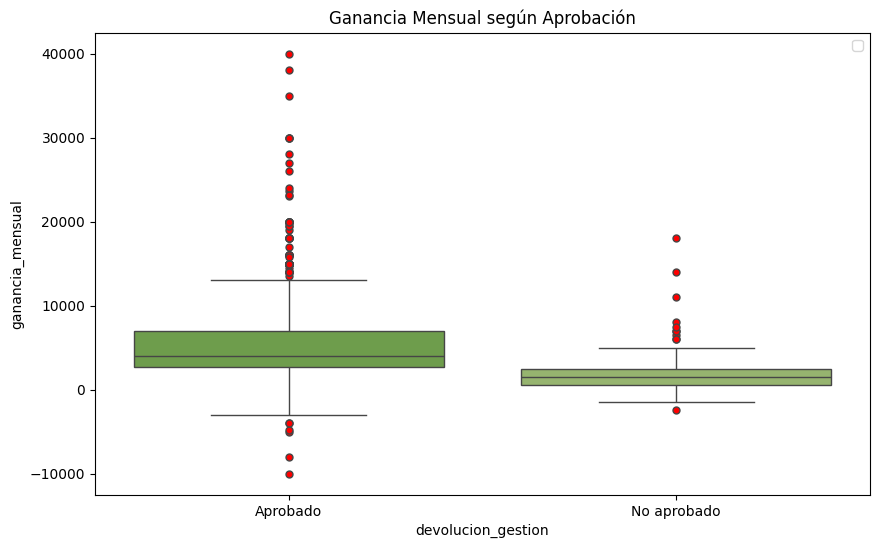

In [266]:
# Factores Demográficos (sexo, nivel_estudio, edad):

colores_personalizados = ["#6CAA3F", "#98BF64"]
color_outlier = "red"

# Ganancia mensual según aprobación
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_eda,
    x="devolucion_gestion",
    y="ganancia_mensual",
    hue="devolucion_gestion",
    palette=colores_personalizados,
    flierprops=dict(marker="o", markerfacecolor=color_outlier, markersize=5),
)
plt.title("Ganancia Mensual según Aprobación")
plt.legend([], [], frameon=True)
plt.show()

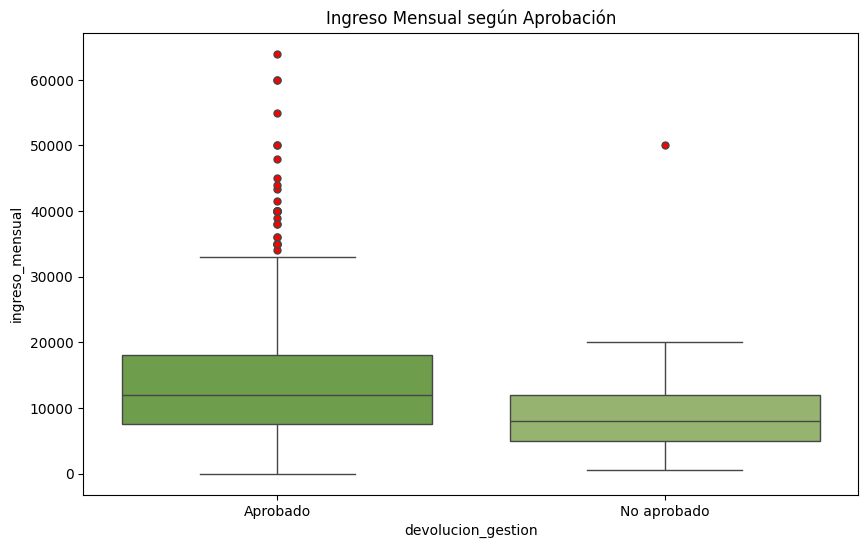

In [267]:
# Ingreso mensual según aprobación con colores personalizados
colores_personalizados = ["#6CAA3F", "#98BF64"]
color_outlier = "red"  # Color para los outliers

# Ingreso mensual según aprobación con colores personalizados
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_eda,
    x="devolucion_gestion",
    y="ingreso_mensual",
    hue="devolucion_gestion",
    palette=colores_personalizados,
    flierprops=dict(marker="o", markerfacecolor=color_outlier, markersize=5),
)
plt.title("Ingreso Mensual según Aprobación")
plt.legend([], [], frameon=False)
plt.show()

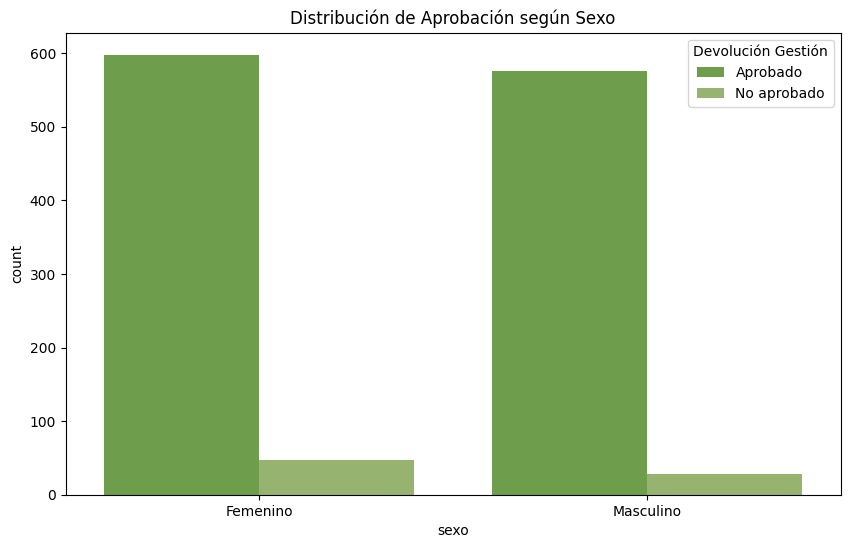

In [268]:
# Distribución de aprobación por sexo
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df_eda, x="sexo", hue="devolucion_gestion", palette=colores_personalizados
)
plt.title("Distribución de Aprobación según Sexo")
plt.legend(title="Devolución Gestión")
plt.show()

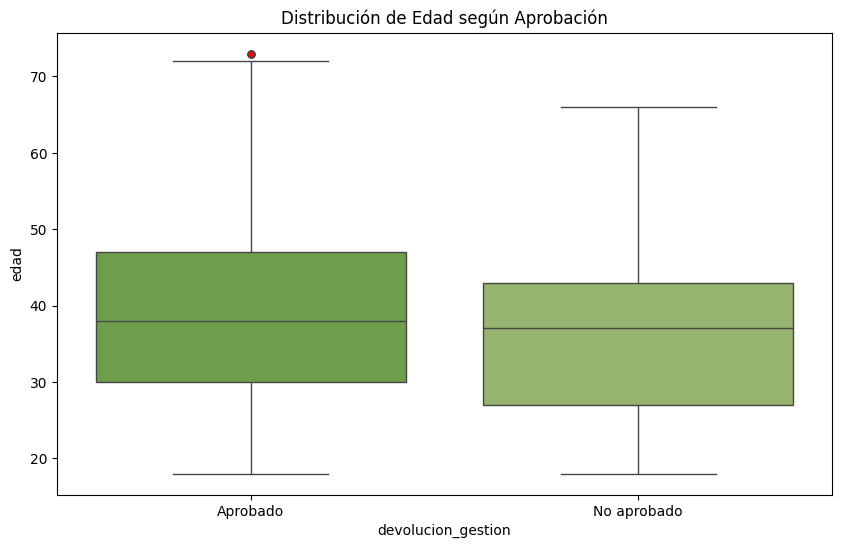

In [269]:
# Edad según aprobación
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_eda,
    x="devolucion_gestion",
    y="edad",
    hue="devolucion_gestion",
    palette=colores_personalizados,
    flierprops=dict(marker="o", markerfacecolor=color_outlier, markersize=5),
)
plt.title("Distribución de Edad según Aprobación")
plt.legend([], [], frameon=False)
plt.show()

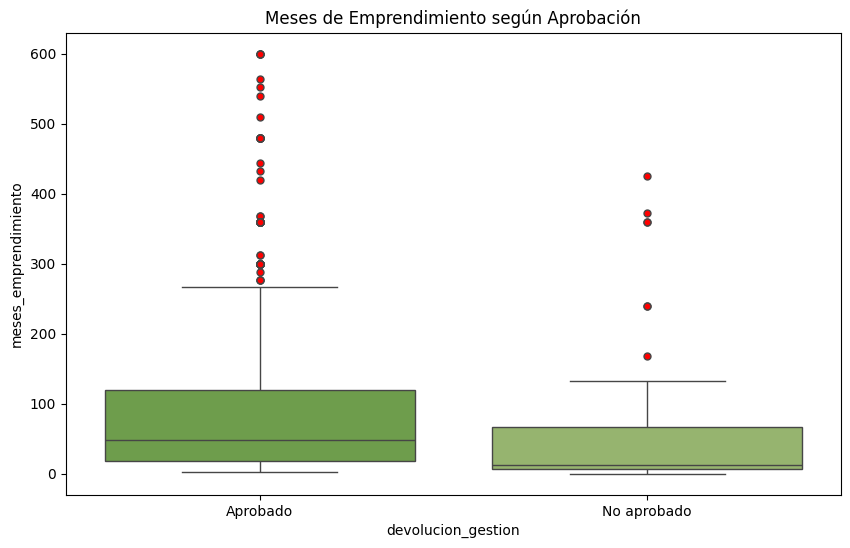

In [270]:
# Meses de emprendimiento
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_eda,
    x="devolucion_gestion",
    y="meses_emprendimiento",
    hue="devolucion_gestion",
    palette=colores_personalizados,
    flierprops=dict(marker="o", markerfacecolor=color_outlier, markersize=5),
)
plt.title("Meses de Emprendimiento según Aprobación")
plt.legend([], [], frameon=False)
plt.show()

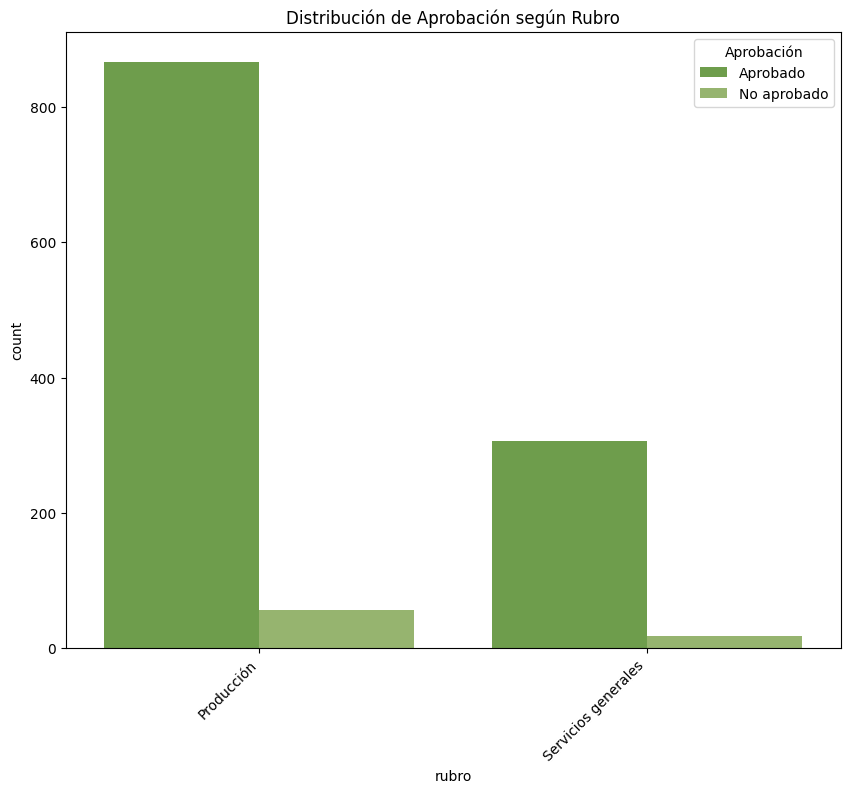

In [271]:
# Distribución de aprobación según rubro
plt.figure(figsize=(10, 8))
sns.countplot(
    data=df_eda, x="rubro", hue="devolucion_gestion", palette=colores_personalizados
)
plt.xticks(rotation=45, ha="right")
plt.title("Distribución de Aprobación según Rubro")
plt.legend(title="Aprobación", loc="upper right")
plt.show()

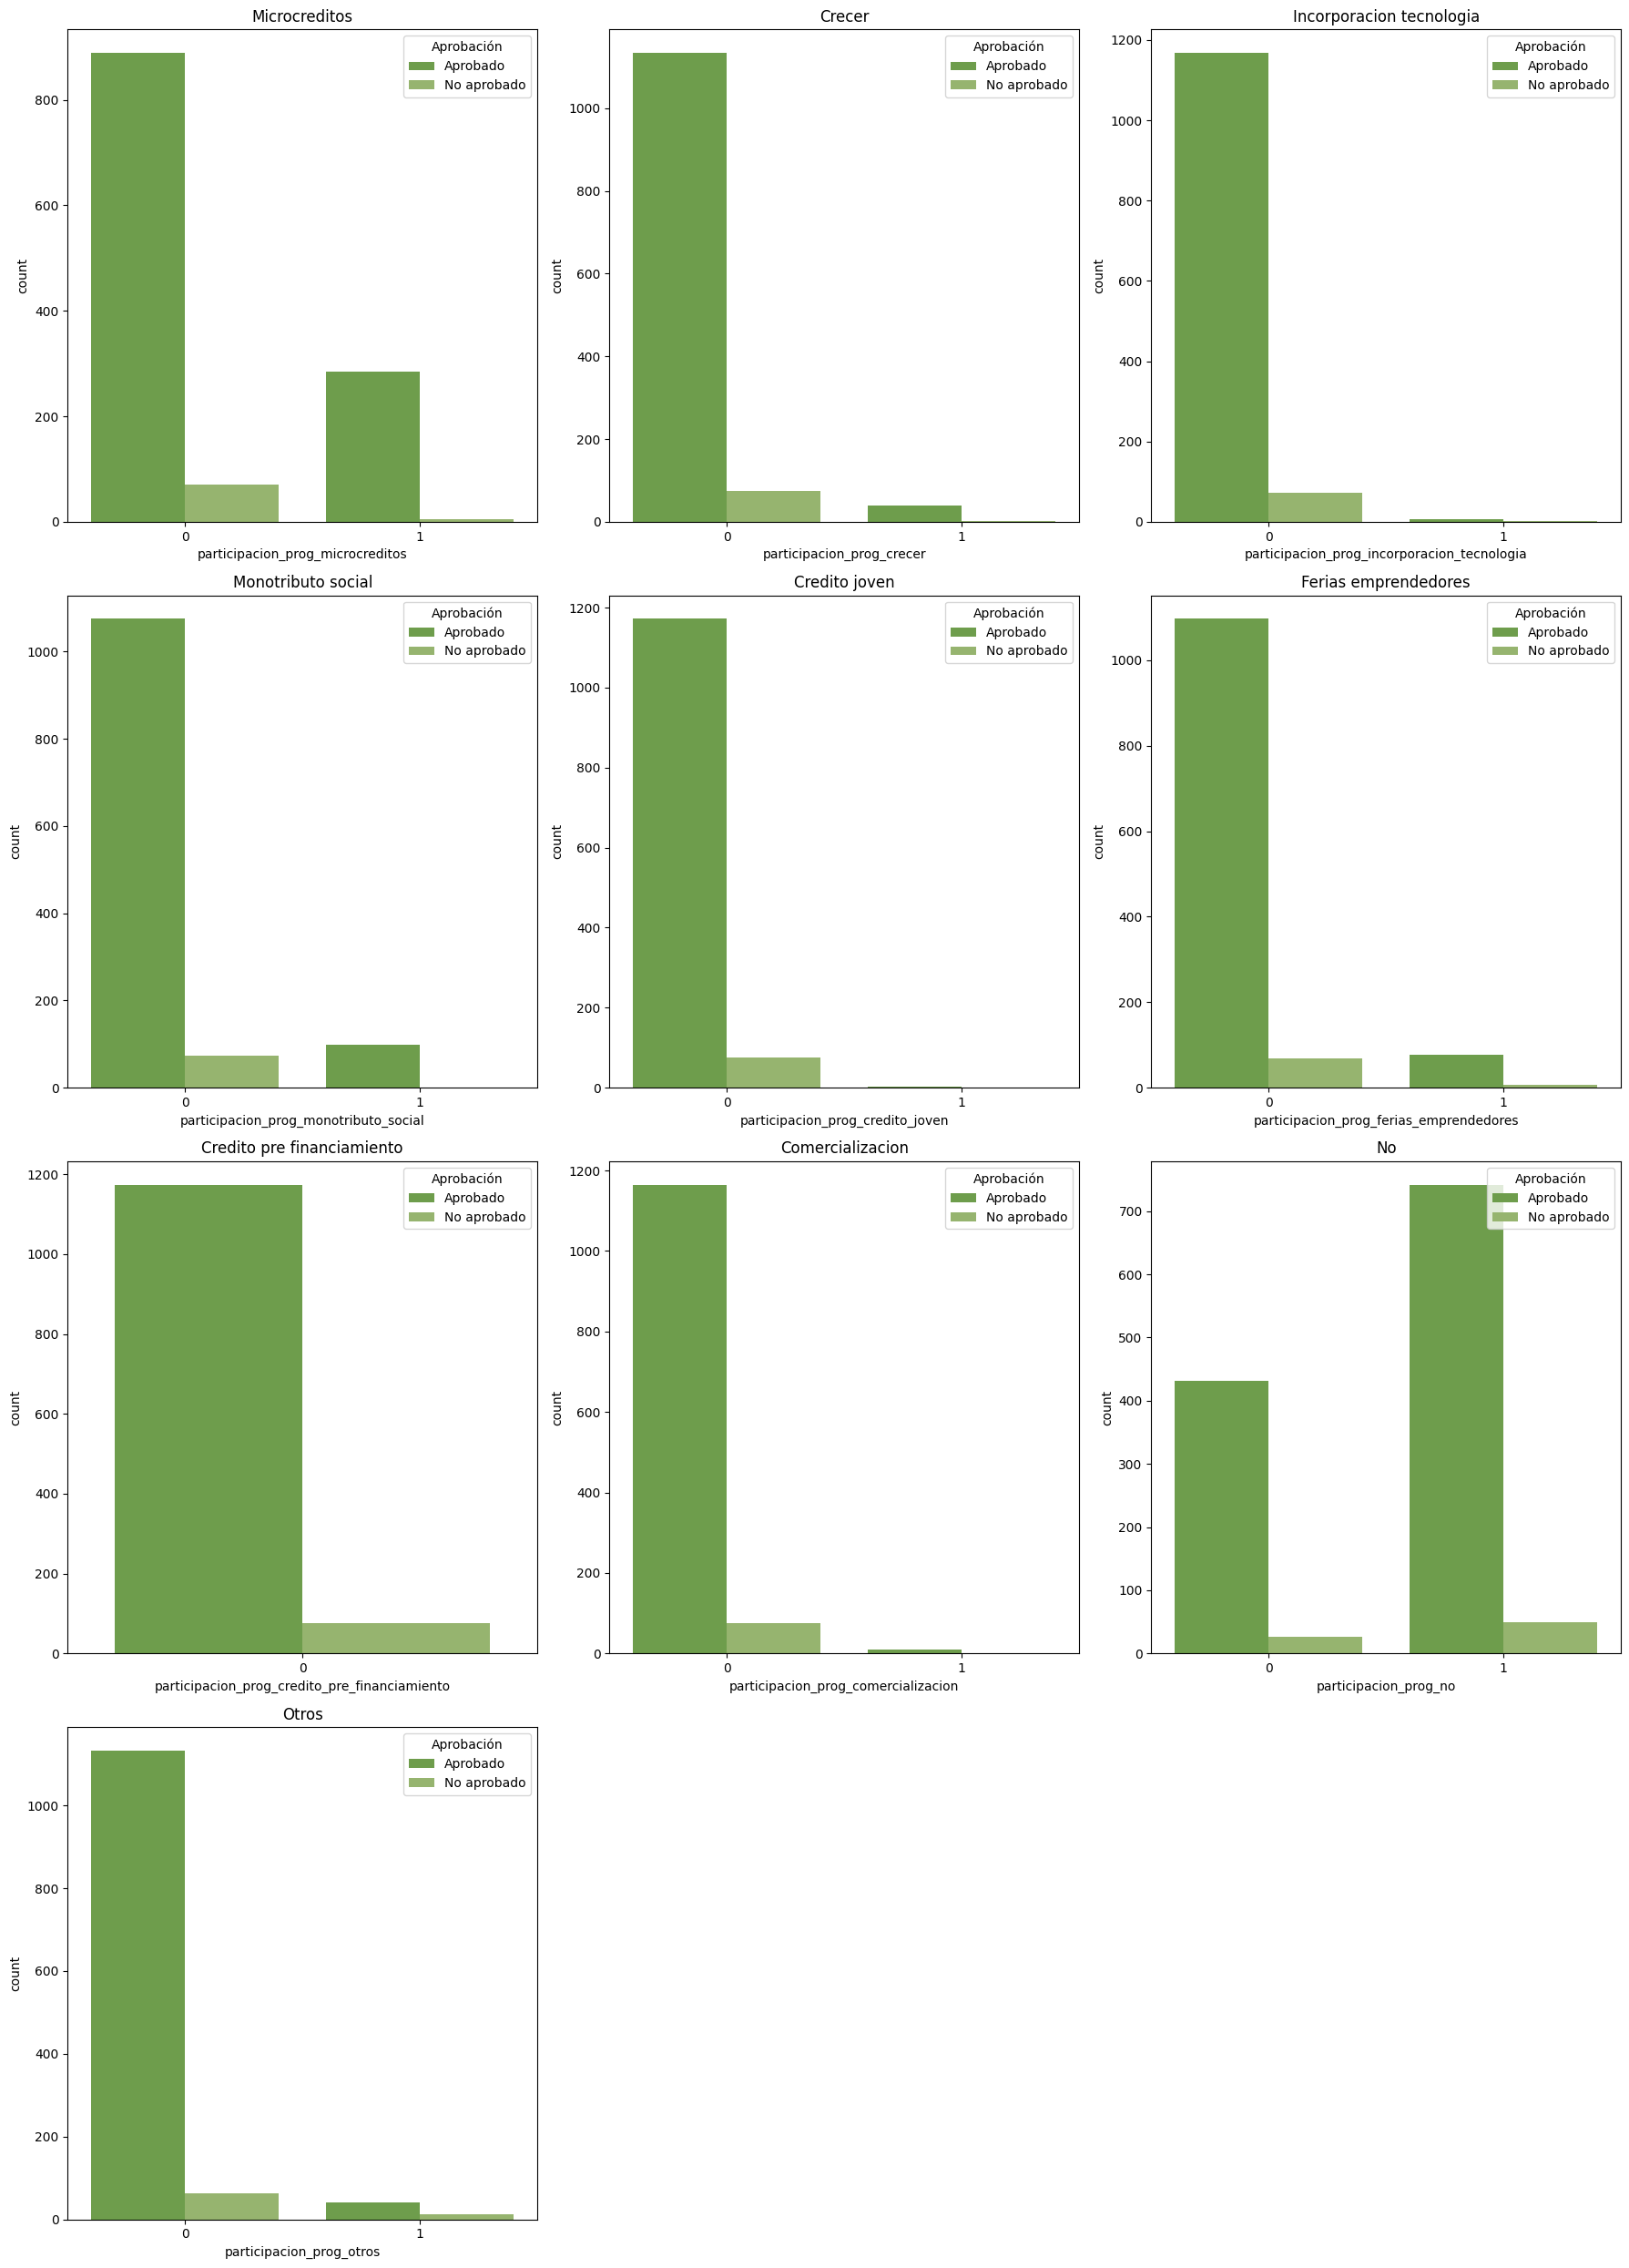

In [272]:
import matplotlib.pyplot as plt
import seaborn as sns

colores_personalizados = ["#6CAA3F", "#98BF64"]

# Columnas de programas
programas_cols = [col for col in df_eda.columns if "participacion_prog_" in col]

fig, axes = plt.subplots(
    nrows=len(programas_cols) // 3 + 1, ncols=3, figsize=(18, len(programas_cols) * 2.5)
)
axes = axes.flatten()

# Graficar cada programa en un subplot
for i, prog in enumerate(programas_cols):
    sns.countplot(
        data=df_eda,
        x=prog,
        hue="devolucion_gestion",
        palette=colores_personalizados,
        ax=axes[i],
    )
    axes[i].set_title(
        f'{prog.replace("participacion_prog_", "").replace("_", " ").capitalize()}'
    )
    axes[i].legend(title="Aprobación", loc="upper right")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Para analizar los factores que influyen en la aprobación de los emprendedores, voy a estructurar el análisis en base a las siguientes categorías y preguntas clave:

### 1. **Análisis de Variables Categóricas:**

#### **a. Sexo**  
   **Pregunta:** ¿Existen diferencias en la tasa de aprobación según el sexo?  
   **Análisis:**  
   - En el gráfico, se puede ver que la mayoría de los emprendedores aprobados son hombres, pero las mujeres también tienen una tasa de aprobación significativa.
   - **Insight:** Si bien la aprobación parece estar sesgada hacia los hombres, es importante examinar si este sesgo está relacionado con otros factores, como el tipo de negocio o la participación en programas de apoyo.

#### **b. Nivel Educativo**  
   **Pregunta:** ¿El nivel educativo influye en la probabilidad de aprobación?  
   **Análisis:**  
   - La aprobación podría estar asociada con un mayor nivel de educación, lo cual puede reflejar que los emprendedores con formación académica más alta tienen más posibilidades de obtener una devolución positiva en la gestión de su emprendimiento. **Esto podría deberse a una mejor planificación o acceso a recursos**.

#### **c. Rubro de Emprendimiento**  
   **Pregunta:** ¿Hay sectores específicos con una mayor tasa de aprobación?  
   **Análisis:**  
   - La mayoría de los aprobados provienen del rubro **Producción**, mientras que sectores como **Servicios Generales** parecen tener una menor tasa de aprobación.
   - **Insight:** Esto podría sugerir que ciertos sectores productivos tienen un mayor acceso a programas de apoyo o un enfoque más estructurado para garantizar su éxito.

#### **d. Ambito del Emprendimiento**  
   **Pregunta:** ¿El ámbito (rural o urbano) influye en la probabilidad de aprobación?  
   **Análisis:**  
   - Sería interesante verificar si los emprendimientos rurales tienen las mismas oportunidades de aprobación que los emprendimientos urbanos, ya que pueden enfrentar desafíos diferentes en cuanto a acceso a mercados o infraestructura.

### 2. **Análisis de Variables Numéricas:**

#### **a. Ganancia Mensual y Aprobación**  
   **Pregunta:** ¿Existe una diferencia significativa en las ganancias entre los emprendimientos aprobados y no aprobados?  
   **Análisis:**  
   - Los gráficos de caja muestran que los emprendimientos aprobados tienden a tener una **ganancia mensual** más alta en comparación con los no aprobados. Además, hay una mayor variabilidad en las ganancias de los emprendimientos aprobados, lo que sugiere que el éxito puede ser muy diverso.
   - **Insight:** Es probable que los negocios con un mayor potencial de ganancia tengan más posibilidades de ser aprobados, ya que demuestran viabilidad económica.

#### **b. Ingreso Familiar Mensual y Aprobación**  
   **Pregunta:** ¿El ingreso familiar mensual tiene una relación con la aprobación?  
   **Análisis:**  
   - Los emprendimientos aprobados parecen estar asociados con familias con **ingresos mensuales más altos**, lo que podría indicar que aquellos con una mayor estabilidad financiera tienen más acceso a recursos y apoyo para iniciar o mejorar sus emprendimientos.

#### **c. Meses de Emprendimiento y Aprobación**  
   **Pregunta:** ¿La antigüedad del emprendimiento está relacionada con la aprobación?  
   **Análisis:**  
   - Los gráficos sugieren que los emprendimientos aprobados tienen, en promedio, más **meses de operación** en comparación con los no aprobados. Esto puede deberse a que los negocios más establecidos tienen más probabilidades de recibir apoyo debido a su experiencia en el mercado.

#### **d. Horas Semanales y Aprobación**  
   **Pregunta:** ¿La cantidad de horas dedicadas al emprendimiento influye en la aprobación?  
   **Análisis:**  
   - Los boxplots muestran una distribución interesante, donde los emprendimientos aprobados tienden a dedicar **más horas semanales**, lo que sugiere que una mayor dedicación puede estar correlacionada con mejores resultados.
    - **Insight:** Los emprendedores que invierten más tiempo en sus negocios pueden tener una mayor probabilidad de éxito, lo que podría ser un factor importante en la decisión de aprobación.

### 3. **Análisis de Participación en Programas y Aprobación:**

Examinaremos la relación entre la **participación en programas de apoyo** y la probabilidad de aprobación:

#### **a. Microcréditos, Programas de Crecimiento y Tecnología**  
   **Pregunta:** ¿La participación en programas específicos aumenta las probabilidades de aprobación?  
   **Análisis:**  
   - Los gráficos de barras muestran una **alta tasa de aprobación** para aquellos que participaron en **microcréditos** o programas como **Crecer** e **Incorporación de Tecnología**.
   - **Insight:** Los emprendedores que acceden a estos programas parecen tener más recursos y apoyo para desarrollar sus negocios, lo que aumenta su probabilidad de éxito.

#### **b. Impacto de la No Participación en Programas**  
   **Pregunta:** ¿Qué ocurre cuando los emprendedores no participan en ningún programa de apoyo?  
   **Análisis:**  
   - El gráfico muestra claramente que aquellos emprendedores que **no participan en ningún programa de apoyo** tienen una **mayor propensión a ser desaprobados** en comparación con aquellos que participan activamente en programas de fomento o capacitación.
   - **Insight:** La falta de participación en programas de apoyo parece estar fuertemente asociada con una mayor probabilidad de desaprobación. Esto sugiere que la capacitación, el financiamiento, o el acompañamiento brindado por estos programas podría ser un factor clave para mejorar las probabilidades de éxito de los emprendedores. Por lo tanto, **recomendar** la participación en estos programas sería fundamental para aquellos que buscan ser aprobados, ya que proporciona herramientas y recursos adicionales para fortalecer el emprendimiento.

### 5️⃣ **Resumen e Insights Finales:**

**Conclusión General y Recomendaciones para el Equipo Técnico** 📊💡

1️⃣ **Dedicación y Ganancia Mensual:** Los emprendedores con **mayores ganancias mensuales** y **más horas semanales** dedicadas a su negocio tienen **más probabilidades de ser aprobados**. Esto indica que la combinación de potencial económico y compromiso son factores clave en la evaluación.

2️⃣ **Participación en Programas de Apoyo:** La participación en **Microcréditos** y **Crecer** está **fuertemente relacionada con la aprobación**. **Recomendar** a los emprendedores acceder a estos recursos es una estrategia importante para aumentar las probabilidades de éxito.

3️⃣ **Sector Productivo:** El sector de **producción** muestra tasas de aprobación más altas que otros rubros como los **servicios**. Esto podría indicar que sectores como los servicios requieren **mayor apoyo financiero o estructural** para mejorar sus resultados.

4️⃣ **Desigualdad de Género:** Se observó que los **hombres tienden a tener una mediana de ganancia mensual más alta** en comparación con las mujeres. Es importante investigar posibles **disparidades de género** y ofrecer apoyo específico para nivelar las oportunidades.

5️⃣ **Regiones Geográficas:** Las diferencias en las ganancias y tasas de aprobación entre **departamentos** sugieren que existen **disparidades económicas locales**. Es crucial considerar **estrategias regionales específicas** para ofrecer apoyo adaptado a las necesidades de cada área.

6️⃣ **Nivel Educativo y Aprobación:** Los emprendedores con un **nivel educativo más alto** tienden a tener **mayores probabilidades de aprobación**. A largo plazo, fomentar **capacitación y educación** en áreas específicas puede ser una clave para aumentar las tasas de éxito.

7️⃣ **Programas de Capacitación:** Los emprendedores que **no participan en programas** como ferias o monotributo social muestran **mayor propensión a ser desaprobados**. Incentivar la **participación en programas de capacitación** y mejora de negocios es esencial.

8️⃣ **Antigüedad del Emprendimiento:** Aunque se aprecia una mayor aprobación en emprendedores con **más meses de antigüedad**, también se identifican **casos recientes** aprobados, lo que indica que el apoyo inicial y la trayectoria del negocio pueden ser relevantes.

9️⃣ **Recomendación Técnica Final:** Es fundamental que el **equipo técnico** fomente la **participación en programas de apoyo** y potencie estrategias diferenciadas según **sectores, género, y regiones**. Así se podrá ofrecer un respaldo más personalizado que incremente las tasas de éxito y reduzca las disparidades detectadas.

In [273]:
df_eda.head(20)

entrevista_estado fecha_entrevista equipo_tecnico     localidad  departamento fecha_nacimiento       sexo  estado_civil             nivel_estudio    situacion_laboral situacion_habitacional tipo_vivienda       situacion_iva  ingreso_mensual                         descripcion_emprendimiento capacitacion_previa tarjeta_credito  ganancia_mensual ambito_emprendimiento condiciones_espacio       servicio_electrico   servicio_gas                                equipamiento_actual                            equipamiento_solicitado                                 aporte_herramienta devolucion_gestion                             herramientas_aprobadas                rubro           subrubro                           actividad produccion_semanal   espacio_productivo       inversion_fortalecimiento  capacitacion_Capacitación en el Oficio  capacitacion_Capacitación en Costos / Administración  capacitacion_Capacitación en Marketing / Comunicación  otros_capacitacion  donde_prod_serv_casa_sin_espacio  donde_prod_serv_casa_con_espacio  donde_prod_serv_local_aparte  donde_prod_serv_en_casa_clientes  donde_prod_serv_otros  como_ofrece_prod_serv_local  como_ofrece_prod_serv_domicilio  como_ofrece_prod_serv_comercios  como_ofrece_prod_serv_conocidos_a_domicilio  como_ofrece_prod_serv_ferias  como_ofrece_prod_serv_puesto_fijo_feria  como_ofrece_prod_serv_venta_ambulante  como_ofrece_prod_serv_conocidos  como_ofrece_prod_serv_catalogos  como_ofrece_prod_serv_redes_sociales  como_ofrece_prod_serv_clasificados  como_ofrece_prod_serv_online  como_ofrece_prod_serv_otros  habilitacion_ninguna  habilitacion_no_requiere  habilitacion_comercial_municipal  habilitacion_espacio_municipal  habilitacion_carnet_icab  habilitacion_rne_nacion  habilitacion_rnpa_nacion  habilitacion_transporte  habilitacion_otras  participacion_prog_microcreditos  participacion_prog_crecer  participacion_prog_incorporacion_tecnologia  participacion_prog_monotributo_social  participacion_prog_credito_joven  participacion_prog_ferias_emprendedores  participacion_prog_credito_pre_financiamiento  participacion_prog_comercializacion  participacion_prog_no  participacion_prog_otros  meses_emprendimiento  horas_semanales  edad
0   La entrevista se realizó correctamente.       2016-03-17         Gisela  Gualeguaychú  Gualeguaychú       1971-02-09   Femenino      Casada/o       Secundario Completo         Autoempleado     Vivienda Alquilada        TIPO B  Monotributo Social           6000.0  Pre pizzas, pasta frolas, cremonas, pan sabori...                  SI              NO       5321.526656                Urbano            Regular.  Instalación Monofásica.  Gas Envasado.  Horno 6 moldes pizzero, Heladera familiar, bat...                      Amasadora y sobadora de mesa   Para agregar otros productos con hojaldre y ag...           Aprobado                               Amasadora y Sobadora           Producción       Panificación                          Pastelería           Variable           Deficiente                    Equipamiento                                       1                                                  0                                                     0                       0                                 1                                 0                             0                                 0                      0                            0                                0                                0                                            0                             0                                        1                                      0                                0                                0                                     1                                   0                             0                            0                     1                         0                                 0                               0                         0                        0                         0      

In [274]:
# Guardar el DataFrame procesado en un archivo XLSX si no existe:

if not os.path.exists("dataset_procesado.xlsx"):
    df_eda.to_excel("dataset_procesado.xlsx", index=False)
    print("El archivo 'dataset_procesado.xlsx' ha sido guardado correctamente.")
else:
    print("El archivo 'dataset_procesado.xlsx' ya existe.")

El archivo 'dataset_procesado.csv' ya existe.
